# - The project :: Income-Person-Prediction-Project
*****************************************************************
<img src="images/project.png" />


* Table of Contetnt ::
************************************************
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#visualize">Data_Visualization_Process</a></li>
<li><a href="#ETl">ETl_Process</a></li>
<li><a href="#Prepration">Data_Prepration</a></li>
<li><a href="#Model">Bulid_ML_Model</a></li>
<li><a href="#Evaluation">Evaluate_Model</a></li>
<li><a href="#Save">Save_Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<img src="images/display.gif" />


* Domain-Knowledge ::
    * In this notebook, I develop a model aimed at predicting flight delays at take-off. The purpose is not to obtain the best possible prediction but rather to emphasize on the various steps needed to build such a model. Along this path, I then put in evidence some basic but important concepts. Among then, I comment on the importance of the separation of the dataset during the traning stage and how cross-validation helps in determing accurate model parameters. I show how to build linear and polynomial models for univariate or multivariate regressions and also, I give some insight on the reason why regularisation helps us in developing models that generalize well.


        
<img src="images/data.png" />

    


# overview about How ML Solve That Problem of classifier :: 
***********************************
        
<img src="images/process.png" />

* Importing requried liberaries and Frameworks  ::

In [1]:
# Importing Liberaries and Framworks ::
import numpy     as np      # Apply Linear_Algebra operations and deal with arrays.
import pandas    as pd      # For Loading diff formats of data and Apply Wrangling and Mainpulating on data
import seaborn   as sns     # For Visualizing data
import warnings  as w       # For Ignoring any Warning
import missingno as mno     # Presnt Precentage of Nan Values
import datasist  as ds      # For Apply EDA and Visualization Using Simple Implementation
import matplotlib.pyplot as plt # For Set Plots , Charts and Maps Labels and Title  
import pandas_profiling  as pp  # To get describtion file of data


* Set some instructions

In [2]:
# To Make Matplotlib apply on any Version
%matplotlib inline      
# To ignore any Warning notification.
w.filterwarnings("ignore") 
# To Set Figsize of Plots , Charts and Maps
sns.set( rc = {"figure.figsize" : [50 , 35]} , font_scale=3.5)

In [3]:
# Loading dataset ::
df = pd.read_csv("flights.csv")
df = df[:1000000]
df

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0       2015      1    1            4      AS             98      N407AS   
1       2015      1    1            4      AA           2336      N3KUAA   
2       2015      1    1            4      US            840      N171US   
3       2015      1    1            4      AA            258      N3HYAA   
4       2015      1    1            4      AS            135      N527AS   
...      ...    ...  ...          ...     ...            ...         ...   
999995  2015      3    7            6      OO           6396      N114SY   
999996  2015      3    7            6      AA            334      N566AA   
999997  2015      3    7            6      MQ           3641      N601MQ   
999998  2015      3    7            6      OO           5244      N710SK   
999999  2015      3    7            6      DL            805      N129DL   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0                 ANC                 SEA                    5  ...   
1                 LAX                 PBI                   10  ...   
2                 SFO                 CLT                   20  ...   
3                 LAX                 MIA                   20  ...   
4                 SEA                 ANC                   25  ...   
...               ...                 ...                  ...  ...   
999995            BOI                 SFO                  915  ...   
999996            DFW                 MFE                  916  ...   
999997            DSM                 DFW                  916  ...   
999998            LAX                 ASE                  916  ...   
999999            MSP                 LAX                  917  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
0              408.0          -22.0         0          0                  NaN   
1              741.0           -9.0         0          0                  NaN   
2              811.0            5.0         0          0                  NaN   
3              756.0           -9.0         0          0                  NaN   
4              259.0          -21.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
999995         957.0          -16.0         0          0                  NaN   
999996        1042.0           -8.0         0          0                  NaN   
999997        1131.0           11.0         0          0                  NaN   
999998        1242.0           26.0         0          0                  NaN   
999999        1052.0          -36.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0                    NaN             NaN            NaN                  NaN   
1                    NaN             NaN            NaN                  NaN   
2                    NaN             NaN            NaN                  NaN   
3                    NaN             NaN            NaN                  NaN   
4                    NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
999995               NaN             NaN            NaN                  NaN   
999996               NaN             NaN            NaN                  NaN   
999997               NaN             NaN            NaN                  NaN   
999998              26.0             0.0            0.0                  0.0   
999999               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
999995            NaN  
999996            NaN  
999997            NaN  
999998            0.0  
999999            NaN  

[1000000 rows x 31 

* from the result above we can see that ::
*********************************************************
* We have 5819079 record of data.
* we have 31  features related Income.
* Our-Target income that we will rename that columns into Income.

*******************************************************
# Features of Income data :
*******************************************************

* Categorical Attributes :::
************************************

* YEAR, MONTH, DAY, DAY_OF_WEEK  :: dates of the flight
* AIRLINE  :: An identification number assigned by US DOT to identify a unique airline
* ORIGIN_AIRPORT and DESTINATION_AIRPORT :: code attributed by IATA to identify the airports
* SCHEDULED_DEPARTURE and SCHEDULED_ARRIVAL : scheduled times of take-off and landing
* Relationship :: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* DEPARTURE_TIME and ARRIVAL_TIME :: real times at which take-off and landing took place
* DEPARTURE_DELAY and ARRIVAL_DELAY :: difference (in minutes) between planned and real times
* DISTANCE :: distance (in miles)
  

* To have a global overview of the geographical area covered in this dataset, we can plot the airports location and indicate the number of flights recorded during year 2015 in each of them:

<p id="Wrangling">Exploratory data analysis</p>

* *EDA Task* ::
*******************************
 *  It one of the most important phase of data scientist life cycle which we apply some statistical oprations toidentify the Behaviour of data  to extract meaningful knowledge , insights and vesion from that data to help steckholders to make more efficient decision which improve and enhance our Buesines.

* Statistical analysis Process ::

In [4]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [5]:
df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1000000 non-null  int64  
 1   MONTH                1000000 non-null  int64  
 2   DAY                  1000000 non-null  int64  
 3   DAY_OF_WEEK          1000000 non-null  int64  
 4   AIRLINE              1000000 non-null  object 
 5   FLIGHT_NUMBER        1000000 non-null  int64  
 6   TAIL_NUMBER          992291 non-null   object 
 7   ORIGIN_AIRPORT       1000000 non-null  object 
 8   DESTINATION_AIRPORT  1000000 non-null  object 
 9   SCHEDULED_DEPARTURE  1000000 non-null  int64  
 10  DEPARTURE_TIME       960842 non-null   float64
 11  DEPARTURE_DELAY      960842 non-null   float64
 12  TAXI_OUT             960145 non-null   float64
 13  WHEELS_OFF           960145 non-null   float64
 14  SCHEDULED_TIME       999998 non-null   float64
 15 

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER              7709
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          39158
DEPARTURE_DELAY         39158
TAXI_OUT                39855
WHEELS_OFF              39855
SCHEDULED_TIME              2
ELAPSED_TIME            42606
AIR_TIME                42606
DISTANCE                    0
WHEELS_ON               40883
TAXI_IN                 40883
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            40883
ARRIVAL_DELAY           42606
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    959868
AIR_SYSTEM_DELAY       778959
SECURITY_DELAY         778959
AIRLINE_DELAY          778959
LATE_AIRCRAFT_DELAY    778959
WEATHER_DELAY          778959
dtype: int64

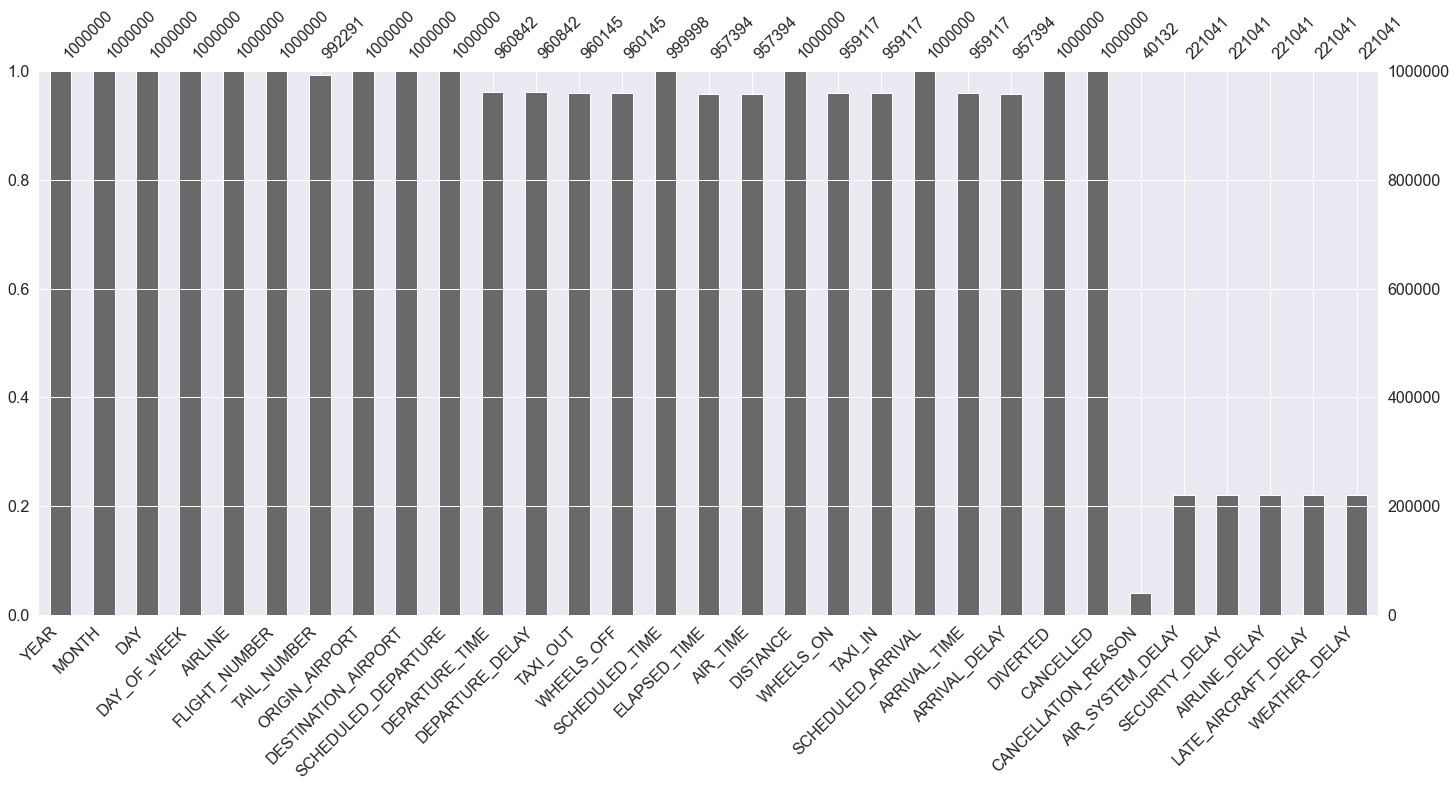

In [7]:
# Investigate Data not include null values ::
# Let's take a look at the presence of missing values, so as not to face unpleasant surprises in the future.


mno.bar(df)
df.isna().sum()

In [8]:
df.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER              7709
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          39158
DEPARTURE_DELAY         39158
TAXI_OUT                39855
WHEELS_OFF              39855
SCHEDULED_TIME              2
ELAPSED_TIME            42606
AIR_TIME                42606
DISTANCE                    0
WHEELS_ON               40883
TAXI_IN                 40883
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            40883
ARRIVAL_DELAY           42606
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    959868
AIR_SYSTEM_DELAY       778959
SECURITY_DELAY         778959
AIRLINE_DELAY          778959
LATE_AIRCRAFT_DELAY    778959
WEATHER_DELAY          778959
dtype: int64

In [9]:
# identify the unique data values and its values count ::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (YEAR)

The Col _ (YEAR) _Unique_values :: [2015]

The Col _ (YEAR)_Value_counts :: 

2015    1000000
Name: YEAR, dtype: int64

-----------
-----------

The Col :: (MONTH)

The Col _ (MONTH) _Unique_values :: [1 2 3]

The Col _ (MONTH)_Value_counts :: 

1    469968
2    429191
3    100841
Name: MONTH, dtype: int64

-----------
-----------

The Col :: (DAY)

The Col _ (DAY) _Unique_values :: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]

The Col _ (DAY)_Value_counts :: 

5     49180
2     49165
4     48089
6     48024
3     46586
1     42527
23    32431
16    32372
26    32331
19    32243
12    32191
9     31899
20    31657
13    31656
27    31615
7     31517
22    31190
25    30879
8     30735
15    30428
11    30295
18    30030
21    28422
28    28407
24    28186
17    28147
14    28131
10    27520
30    16080
29    16030
31    12037
Name: DAY, dtype: int64

-----------
-----------

The Col :: (DAY_OF_WEEK)

The Col _ (DAY_O

The Col :: (DISTANCE)

The Col _ (DISTANCE) _Unique_values :: [1448 2330 2296 ... 2297  494 1997]

The Col _ (DISTANCE)_Value_counts :: 

337     8309
2475    4831
404     4683
447     4595
594     4509
        ... 
1997       1
1369       1
660        1
154        1
107        1
Name: DISTANCE, Length: 1268, dtype: int64

-----------
-----------

The Col :: (WHEELS_ON)

The Col _ (WHEELS_ON) _Unique_values :: [404. 737. 800. ... 318. 324. 322.]

The Col _ (WHEELS_ON)_Value_counts :: 

1636.0    1185
1630.0    1166
1805.0    1143
1641.0    1137
1634.0    1134
          ... 
355.0        4
259.0        4
346.0        4
332.0        4
403.0        2
Name: WHEELS_ON, Length: 1440, dtype: int64

-----------
-----------

The Col :: (TAXI_IN)

The Col _ (TAXI_IN) _Unique_values :: [  4.  11.   8.   5.   6.   3.   7.   2.  40.  10.  nan  12.   9.  13.
  19.  14.  15.  30.  17.  16.  23.  52.  21.  26.  80.  29.  24.  20.
  22.  18.  32.  55.  33.  34.   1.  27.  28.  25.  36.  41.  39.  37.
 

The Col :: (CANCELLED)

The Col _ (CANCELLED) _Unique_values :: [0 1]

The Col _ (CANCELLED)_Value_counts :: 

0    959868
1     40132
Name: CANCELLED, dtype: int64

-----------
-----------

The Col :: (CANCELLATION_REASON)

The Col _ (CANCELLATION_REASON) _Unique_values :: [nan 'A' 'B' 'C' 'D']

The Col _ (CANCELLATION_REASON)_Value_counts :: 

B    28167
A     6705
C     5258
D        2
Name: CANCELLATION_REASON, dtype: int64

-----------
-----------

The Col :: (AIR_SYSTEM_DELAY)

The Col _ (AIR_SYSTEM_DELAY) _Unique_values :: [ nan  25.  43.   0.  20.  17.  13.   7.  22.  14.   4.   6.  16.  27.
  12.   2.  15.  18.  32.  85.   3.   5.  86.  58.  35.  34.  33.  11.
   9.  26.  28.  40.  23.  19.  24.  97.  29.  21.   1.  10.   8.  30.
  67.  48.  65.  31.  41.  42.  39.  36.  51.  81.  46. 164.  52.  88.
  49.  45.  37.  50.  54.  59. 138.  53.  72.  68.  77.  61.  60.  44.
  38.  76.  47.  73.  57.  74.  87.  56.  63. 135. 120. 116. 169.  66.
 152.  96.  55.  98. 283. 137.  82.  8

The Col :: (LATE_AIRCRAFT_DELAY)

The Col _ (LATE_AIRCRAFT_DELAY) _Unique_values :: [      nan 0.000e+00 8.800e+01 3.100e+01 3.060e+02 3.000e+00 8.000e+00
 7.000e+00 5.000e+00 1.200e+01 2.000e+01 1.100e+01 1.900e+01 2.900e+01
 4.800e+01 2.500e+01 1.300e+01 7.500e+01 2.350e+02 1.000e+01 6.000e+00
 6.200e+01 8.000e+01 1.600e+01 1.010e+02 3.700e+01 7.400e+01 1.400e+01
 7.700e+01 6.300e+01 4.000e+01 1.840e+02 5.600e+01 1.400e+02 3.900e+01
 2.600e+01 6.500e+01 4.670e+02 8.900e+01 1.000e+02 3.300e+01 4.000e+00
 1.270e+02 1.160e+02 2.000e+00 9.000e+00 7.800e+01 2.100e+01 7.600e+01
 1.800e+01 7.300e+01 5.900e+01 1.000e+00 1.210e+02 1.220e+02 4.200e+01
 2.200e+01 2.300e+01 2.800e+01 1.740e+02 2.400e+01 1.280e+02 1.020e+02
 6.700e+01 6.100e+01 2.640e+02 1.500e+01 3.500e+01 3.400e+01 4.300e+01
 1.660e+02 4.100e+01 2.700e+01 5.700e+01 1.700e+01 7.100e+01 3.800e+01
 3.600e+01 5.200e+01 3.000e+01 1.250e+02 5.100e+01 4.600e+01 1.230e+02
 4.400e+01 8.200e+01 6.000e+01 1.180e+02 1.440e+02 4.500e+01 2.4

In [10]:
# Present the Statistical Analysis describtion of Numerical_data ::
df.describe(include=["number"])

YEAR           MONTH             DAY     DAY_OF_WEEK  \
count  1000000.0  1000000.000000  1000000.000000  1000000.000000   
mean      2015.0        1.630873       14.087290        3.942253   
std          0.0        0.659208        8.846599        1.957458   
min       2015.0        1.000000        1.000000        1.000000   
25%       2015.0        1.000000        6.000000        2.000000   
50%       2015.0        2.000000       14.000000        4.000000   
75%       2015.0        2.000000       22.000000        6.000000   
max       2015.0        3.000000       31.000000        7.000000   

        FLIGHT_NUMBER  SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
count  1000000.000000       1000000.000000   960842.000000    960842.000000   
mean      2259.305292          1322.605368     1333.892931        11.525092   
std       1799.970834           470.183312      482.295869        39.451588   
min          1.000000             5.000000        1.000000       -61.000000   
25%        756.000000           920.000000      929.000000        -5.000000   
50%       1727.000000          1320.000000     1329.000000        -1.000000   
75%       3488.000000          1720.000000     1731.000000        11.000000   
max       9794.000000          2359.000000     2400.000000      1988.000000   

            TAXI_OUT     WHEELS_OFF  ...  SCHEDULED_ARRIVAL   ARRIVAL_TIME  \
count  960145.000000  960145.000000  ...     1000000.000000  959117.000000   
mean       16.735891    1357.706468  ...        1505.500062    1492.772831   
std        10.204402     482.567175  ...         485.664098     506.662151   
min         1.000000       1.000000  ...           1.000000       1.000000   
25%        11.000000     944.000000  ...        1121.000000    1116.000000   
50%        14.000000    1343.000000  ...        1525.000000    1522.000000   
75%        19.000000    1745.000000  ...        1915.000000    1917.000000   
max       225.000000    2400.000000  ...        2359.000000    2400.000000   

       ARRIVAL_DELAY        DIVERTED       CANCELLED  AIR_SYSTEM_DELAY  \
count  957394.000000  1000000.000000  1000000.000000     221041.000000   
mean        7.904573        0.002474        0.040132         13.879651   
std        42.383991        0.049678        0.196269         25.747212   
min       -82.000000        0.000000        0.000000          0.000000   
25%       -12.000000        0.000000        0.000000          0.000000   
50%        -3.000000        0.000000        0.000000          4.000000   
75%        12.000000        0.000000        0.000000         19.000000   
max      1971.000000        1.000000        1.000000        830.000000   

       SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
count   221041.000000  221041.000000        221041.000000  221041.000000  
mean         0.057921      18.040721            22.955108       3.631589  
std          1.803159      46.037156            41.895492      23.792253  
min          0.000000       0.000000             0.000000       0.000000  
25%          0.000000       0.000000             0.000000       0.000000  
50%          0.000000       2.000000             4.000000       0.000000  
75%          0.000000      18.000000            29.000000       0.000000  
max        241.000000    1971.000000          1313.000000    1152.000000  

[8 rows x 26 columns]

In [11]:
# present the Statistical Analysis description of Categorical_data ::
df.describe(include="object")

AIRLINE TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  \
count   1000000      992291        1000000             1000000   
unique       14        4515            315                 315   
top          WN      N477HA            ATL                 ATL   
freq     210935         777          63413               63585   

       CANCELLATION_REASON  
count                40132  
unique                   4  
top                      B  
freq                 28167

In [12]:
# Present nuniques :: To identifing the duplicaties data
df.nunique()

YEAR                      1
MONTH                     3
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6480
TAIL_NUMBER            4515
ORIGIN_AIRPORT          315
DESTINATION_AIRPORT     315
SCHEDULED_DEPARTURE    1220
DEPARTURE_TIME         1431
DEPARTURE_DELAY         849
TAXI_OUT                179
WHEELS_OFF             1432
SCHEDULED_TIME          456
ELAPSED_TIME            681
AIR_TIME                646
DISTANCE               1268
WHEELS_ON              1440
TAXI_IN                 179
SCHEDULED_ARRIVAL      1332
ARRIVAL_TIME           1440
ARRIVAL_DELAY           870
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        394
SECURITY_DELAY           87
AIRLINE_DELAY           662
LATE_AIRCRAFT_DELAY     504
WEATHER_DELAY           462
dtype: int64

In [13]:
# check data include duplicates record or not
df.duplicated().sum()

0

In [14]:
# Droping All repeat or Redendant data.
df.drop_duplicates(inplace=True)

In [15]:
# check data include duplicates record or not
df.duplicated().sum()

0

In [16]:
# Checking dtypes of dataset.
df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

* Wrangling and Mainplluting data.

In [17]:
# Get The Record Of the Clients who max SCHEDULED_DEPARTURE ::
df[df["SCHEDULED_DEPARTURE"] == df["SCHEDULED_DEPARTURE"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
13928   2015      1    1            4      US           2011      N539UW   
13929   2015      1    1            4      UA            425      N429UA   
13930   2015      1    1            4      UA           1124      N67815   
13931   2015      1    1            4      UA           1129      N73270   
13932   2015      1    1            4      UA           1469      N57870   
...      ...    ...  ...          ...     ...            ...         ...   
996308  2015      3    6            5      US            627      N121UW   
996309  2015      3    6            5      F9            300      N214FR   
996310  2015      3    6            5      F9            682      N933FR   
996311  2015      3    6            5      F9            712      N935FR   
996312  2015      3    6            5      OO           5191      N780SK   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
13928             PHX                 LAX                 2359  ...   
13929             PDX                 IAH                 2359  ...   
13930             IAH                 SJU                 2359  ...   
13931             SEA                 IAH                 2359  ...   
13932             LAX                 ORD                 2359  ...   
...               ...                 ...                  ...  ...   
996308            SLC                 PHL                 2359  ...   
996309            DEN                 TPA                 2359  ...   
996310            DEN                 MCO                 2359  ...   
996311            DEN                 RSW                 2359  ...   
996312            LAX                 AUS                 2359  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
13928           29.0            0.0         0          0                  NaN   
13929          552.0           -1.0         0          0                  NaN   
13930          632.0           18.0         0          0                  NaN   
13931          555.0          -13.0         0          0                  NaN   
13932          546.0           -6.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
996308         553.0           -4.0         0          0                  NaN   
996309         506.0          -11.0         0          0                  NaN   
996310         505.0          -21.0         0          0                  NaN   
996311         518.0          -17.0         0          0                  NaN   
996312         458.0            7.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
13928                NaN             NaN            NaN                  NaN   
13929                NaN             NaN            NaN                  NaN   
13930                0.0             0.0           18.0                  0.0   
13931                NaN             NaN            NaN                  NaN   
13932                NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
996308               NaN             NaN            NaN                  NaN   
996309               NaN             NaN            NaN                  NaN   
996310               NaN             NaN            NaN                  NaN   
996311               NaN             NaN            NaN                  NaN   
996312               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
13928             NaN  
13929             NaN  
13930             0.0  
13931             NaN  
13932             NaN  
...               ...  
996308            NaN  
996309            NaN  
996310            NaN  
996311            NaN  
996312            NaN  

[717 rows x 31 colu

In [18]:
# Get The Record of the Min SCHEDULED_DEPARTURE ::
df[df["SCHEDULED_DEPARTURE"] == df["SCHEDULED_DEPARTURE"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0       2015      1    1            4      AS             98      N407AS   
13950   2015      1    2            5      AA           2400      N5CDAA   
13951   2015      1    2            5      AS             98      N764AS   
30691   2015      1    3            6      AA           2400      N5DKAA   
46125   2015      1    4            7      AA           2400      N630AA   
...      ...    ...  ...          ...     ...            ...         ...   
946767  2015      3    4            3      AA           2400      N5FCAA   
963005  2015      3    5            4      AA           2336      N3FLAA   
963006  2015      3    5            4      AS             98      N457AS   
979627  2015      3    6            5      AA           2336      N3LYAA   
979628  2015      3    6            5      AS             98      N520AS   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0                 ANC                 SEA                    5  ...   
13950             LAX                 DFW                    5  ...   
13951             ANC                 SEA                    5  ...   
30691             LAX                 DFW                    5  ...   
46125             LAX                 DFW                    5  ...   
...               ...                 ...                  ...  ...   
946767            LAX                 DFW                    5  ...   
963005            LAX                 PBI                    5  ...   
963006            ANC                 SEA                    5  ...   
979627            LAX                 PBI                    5  ...   
979628            ANC                 SEA                    5  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
0              408.0          -22.0         0          0                  NaN   
13950          453.0           -2.0         0          0                  NaN   
13951          403.0          -27.0         0          0                  NaN   
30691          459.0            4.0         0          0                  NaN   
46125          453.0           -2.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
946767         442.0          -11.0         0          0                  NaN   
963005         740.0           -5.0         0          0                  NaN   
963006         424.0           -3.0         0          0                  NaN   
979627         749.0            4.0         0          0                  NaN   
979628         426.0           -1.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0                    NaN             NaN            NaN                  NaN   
13950                NaN             NaN            NaN                  NaN   
13951                NaN             NaN            NaN                  NaN   
30691                NaN             NaN            NaN                  NaN   
46125                NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
946767               NaN             NaN            NaN                  NaN   
963005               NaN             NaN            NaN                  NaN   
963006               NaN             NaN            NaN                  NaN   
979627               NaN             NaN            NaN                  NaN   
979628               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
0                 NaN  
13950             NaN  
13951             NaN  
30691             NaN  
46125             NaN  
...               ...  
946767            NaN  
963005            NaN  
963006            NaN  
979627            NaN  
979628            NaN  

[110 rows x 31 colu

In [19]:
# Get The Record Of the Clients who max DEPARTURE_TIME ::
df[df["DEPARTURE_TIME"] == df["DEPARTURE_TIME"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
30657   2015      1    2            5      B6            333      N529JB   
30682   2015      1    2            5      B6            745      N556JB   
42698   2015      1    3            6      EV           4629      N21130   
60538   2015      1    4            7      EV           4513      N14993   
62119   2015      1    4            7      OO           5642      N975SW   
...      ...    ...  ...          ...     ...            ...         ...   
946451  2015      3    3            2      DL           1126      N908DE   
946756  2015      3    3            2      DL           1254      N823DN   
962313  2015      3    4            3      DL           2240      N722TW   
972820  2015      3    5            4      DL           1153      N921DN   
979567  2015      3    5            4      NK            970      N613NK   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
30657             MCO                 SJU                 2355  ...   
30682             JFK                 PSE                 2359  ...   
42698             RIC                 IAH                 1759  ...   
60538             CLE                 ORD                 1950  ...   
62119             DEN                 GJT                 2205  ...   
...               ...                 ...                  ...  ...   
946451            ATL                 CVG                 2156  ...   
946756            LAX                 ATL                 2357  ...   
962313            SFO                 JFK                 2115  ...   
972820            BWI                 ATL                 1500  ...   
979567            DEN                 FLL                 2340  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
30657          341.0            5.0         0          0                  NaN   
30682          439.0           -7.0         0          0                  NaN   
42698          236.0          371.0         0          0                  NaN   
60538           27.0          245.0         0          0                  NaN   
62119           57.0          113.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
946451         117.0          112.0         0          0                  NaN   
946756         652.0          -16.0         0          0                  NaN   
962313         845.0          183.0         0          0                  NaN   
972820         148.0          528.0         0          0                  NaN   
979567         529.0           14.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
30657                NaN             NaN            NaN                  NaN   
30682                NaN             NaN            NaN                  NaN   
42698               10.0             0.0          361.0                  0.0   
60538                0.0             0.0            0.0                  0.0   
62119                0.0             0.0          113.0                  0.0   
...                  ...             ...            ...                  ...   
946451               0.0             0.0            0.0                104.0   
946756               NaN             NaN            NaN                  NaN   
962313              18.0             0.0          165.0                  0.0   
972820               0.0             0.0          528.0                  0.0   
979567               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
30657             NaN  
30682             NaN  
42698             0.0  
60538           245.0  
62119             0.0  
...               ...  
946451            8.0  
946756            NaN  
962313            0.0  
972820            0.0  
979567            NaN  

[67 rows x 31 colum

In [20]:
# Get The Record of the Min DEPARTURE_TIME ::
df[df["DEPARTURE_TIME"] == df["DEPARTURE_TIME"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
13896   2015      1    1            4      UA           1104      N18223   
45791   2015      1    3            6      WN            105      N457WN   
46094   2015      1    3            6      UA           1604      N81449   
46102   2015      1    3            6      UA           1292      N68836   
60788   2015      1    4            7      UA           1143      N37470   
...      ...    ...  ...          ...     ...            ...         ...   
963002  2015      3    4            3      UA           1548      N24702   
979580  2015      3    5            4      UA           1720      N68822   
996175  2015      3    6            5      OO           5611      N969SW   
996217  2015      3    6            5      DL           1406      N138DL   
996270  2015      3    6            5      US            669      N916US   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
13896             ANC                 DEN                 2346  ...   
45791             BWI                 PWM                 2205  ...   
46094             HNL                 SFO                 2356  ...   
46102             IAH                 SJU                 2359  ...   
60788             ORD                 SEA                 2005  ...   
...               ...                 ...                  ...  ...   
963002            DEN                 IAD                 2359  ...   
979580            PHX                 EWR                 2348  ...   
996175            LAX                 SAN                 2255  ...   
996217            LAX                 DTW                 2315  ...   
996270            PHX                 SAN                 2350  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
13896          654.0           -2.0         0          0                  NaN   
45791          120.0          110.0         0          0                  NaN   
46094          716.0            5.0         0          0                  NaN   
46102          612.0           -2.0         0          0                  NaN   
60788          249.0          246.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
963002         501.0          -13.0         0          0                  NaN   
979580         608.0          -20.0         0          0                  NaN   
996175         102.0           73.0         0          0                  NaN   
996217         729.0           48.0         0          0                  NaN   
996270           7.0           10.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
13896                NaN             NaN            NaN                  NaN   
45791                0.0             0.0           26.0                 84.0   
46094                NaN             NaN            NaN                  NaN   
46102                NaN             NaN            NaN                  NaN   
60788               10.0             0.0            0.0                 85.0   
...                  ...             ...            ...                  ...   
963002               NaN             NaN            NaN                  NaN   
979580               NaN             NaN            NaN                  NaN   
996175               7.0             0.0           66.0                  0.0   
996217               2.0             0.0           22.0                 24.0   
996270               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
13896             NaN  
45791             0.0  
46094             NaN  
46102             NaN  
60788           151.0  
...               ...  
963002            NaN  
979580            NaN  
996175            0.0  
996217            0.0  
996270            NaN  

[74 rows x 31 colum

In [21]:
# Get The Record Of the Clients who max DEPARTURE_DELAY ::
df[df["DEPARTURE_DELAY"] == df["DEPARTURE_DELAY"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
337720  2015      1   23            5      AA           1322      N598AA   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
337720            BHM                 DFW                  700  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
337720        1805.0         1971.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
337720               0.0             0.0         1971.0                  0.0   

        WEATHER_DELAY  
337720            0.0  

[1 rows x 31 columns]

In [22]:
# Get The Record of the Min DEPARTURE_DELAY ::
df[df["DEPARTURE_DELAY"] == df["DEPARTURE_DELAY"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
697022  2015      2   16            1      DL           1210      N301DQ   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
697022            HSV                 ATL                  700  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
697022         748.0          -77.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
697022               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
697022            NaN  

[1 rows x 31 columns]

In [23]:
# Get The Record Of the Clients who max TAXI_OUT ::
df[df["TAXI_OUT"] == df["TAXI_OUT"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
878906  2015      2   27            5      AA            125      N4XBAA   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
878906            DFW                 ATL                 1415  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
878906        2250.0          337.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
878906             202.0             0.0            0.0                  0.0   

        WEATHER_DELAY  
878906          135.0  

[1 rows x 31 columns]

In [24]:
# Get The Record of the Min TAXI_OUT ::
df[df["TAXI_OUT"] == df["TAXI_OUT"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
26162   2015      1    2            5      OO           6364      N983SW   
32050   2015      1    3            6      OO           5428      N986SW   
40677   2015      1    3            6      OO           5551      N983SW   
44995   2015      1    3            6      WN           2070      N267WN   
102065  2015      1    7            3      WN            494      N559WN   
149228  2015      1   10            6      MQ           3453      N672MQ   
184441  2015      1   12            1      OO           7403      N459SW   
200113  2015      1   14            3      US           1772      N570UW   
207838  2015      1   14            3      EV           3965      N11551   
257873  2015      1   17            6      EV           6011      N11536   
285769  2015      1   19            1      MQ           3468      N693MQ   
295027  2015      1   20            2      EV           2532      N904EV   
302019  2015      1   20            2      OO           5472      N983CA   
345640  2015      1   23            5      AA            975      N4WLAA   
422220  2015      1   28            3      AA           1347      N4XSAA   
425385  2015      1   28            3      WN           3843      N7743B   
522333  2015      2    4            3      EV           5791      N12957   
536841  2015      2    5            4      AS             55      N537AS   
544007  2015      2    5            4      WN            735      N8607M   
656972  2015      2   13            5      AS             61      N764AS   
671717  2015      2   14            6      NK            446      N529NK   
707779  2015      2   16            1      NK            108      N622NK   
722144  2015      2   17            2      EV           5982      N15572   
755957  2015      2   19            4      EV           4867      N14568   
779641  2015      2   21            6      NK            729      N624NK   
829442  2015      2   24            2      WN           4917      N795SW   
847219  2015      2   25            3      AS             29      N315AS   
867998  2015      2   26            4      WN            871      N8628A   
905492  2015      3    1            7      OO           7399      N460SW   
973179  2015      3    5            4      WN            900      N7734H   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
26162             PSP                 SFO                 1719  ...   
32050             HYS                 DEN                  650  ...   
40677             CID                 ORD                 1550  ...   
44995             STL                 BNA                 2040  ...   
102065            RIC                 ATL                 1315  ...   
149228            DFW                 SJT                 1405  ...   
184441            HIB                 INL                 2126  ...   
200113            LAS                 CLT                   59  ...   
207838            ORD                 CVG                 1315  ...   
257873            ORD                 CLE                 1800  ...   
285769            BMI                 ORD                 1730  ...   
295027            BPT                 DFW                 1104  ...   
302019            SPI                 ORD                 1818  ...   
345640            MSY                 DFW                 1448  ...   
422220            DSM                 DFW                 1731  ...   
425385            LAX                 SJC                 2135  ...   
522333            IAH                 LFT                 1320  ...   
536841            BRW                 FAI                 1209  ...   
544007            MDW                 PHX                 1920  ...   
656972            JNU                 YAK                 1015  ...   
671717            LAS                 ORD                  915  ...   
707779            SAN                 DFW                 1730  ...   
722144            

In [25]:
# Get The Record Of the Clients who max age ::
df[df["WHEELS_OFF"] == df["WHEELS_OFF"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
13849   2015      1    1            4      NK            817      N614NK   
13877   2015      1    1            4      F9           1250      N951FR   
27361   2015      1    2            5      AA           2370      N590AA   
29606   2015      1    2            5      EV           2571      N877AS   
30641   2015      1    2            5      US            414      N656AW   
...      ...    ...  ...          ...     ...            ...         ...   
962985  2015      3    4            3      DL            971      N3757D   
963004  2015      3    4            3      F9            300      N213FR   
979509  2015      3    5            4      US            431      N156UW   
996074  2015      3    6            5      F9           1127      N206FR   
996274  2015      3    6            5      DL            971      N3739P   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
13849             DFW                 LAS                 2310  ...   
13877             DEN                 MIA                 2330  ...   
27361             IAH                 DFW                 1825  ...   
29606             MEI                 PIB                 2055  ...   
30641             PHX                 SEA                 2350  ...   
...               ...                 ...                  ...  ...   
962985            SLC                 MCO                 2354  ...   
963004            DEN                 TPA                 2359  ...   
979509            LAS                 CLT                 2259  ...   
996074            IAD                 LAS                 2230  ...   
996274            SLC                 MCO                 2354  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
13849           24.0           18.0         0          0                  NaN   
13877          532.0           22.0         0          0                  NaN   
27361          106.0          326.0         0          0                  NaN   
29606           25.0          175.0         0          0                  NaN   
30641          150.0           -2.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
962985         541.0          -19.0         0          0                  NaN   
963004         459.0          -18.0         0          0                  NaN   
979509         647.0           48.0         0          0                  NaN   
996074         154.0           69.0         0          0                  NaN   
996274         546.0          -14.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
13849               18.0             0.0            0.0                  0.0   
13877               22.0             0.0            0.0                  0.0   
27361               11.0             0.0            0.0                315.0   
29606                0.0             0.0            0.0                175.0   
30641                NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
962985               NaN             NaN            NaN                  NaN   
963004               NaN             NaN            NaN                  NaN   
979509               6.0             0.0            0.0                 42.0   
996074               0.0             0.0            0.0                 69.0   
996274               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
13849             0.0  
13877             0.0  
27361             0.0  
29606             0.0  
30641             NaN  
...               ...  
962985            NaN  
963004            NaN  
979509            0.0  
996074            0.0  
996274            NaN  

[104 rows x 31 colu

In [26]:
# Get The Record of the Min WHEELS_OFF ::
df[df["WHEELS_OFF"] == df["WHEELS_OFF"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
13007   2015      1    1            4      AA           1566      N472AA   
13882   2015      1    1            4      UA           1609      N37422   
13889   2015      1    1            4      UA           1263      N57862   
13913   2015      1    1            4      AS             20      N594AS   
13946   2015      1    1            4      F9            300      N921FR   
...      ...    ...  ...          ...     ...            ...         ...   
976722  2015      3    5            4      VX             29      N843VA   
995170  2015      3    6            5      OO           4454      N549CA   
995560  2015      3    6            5      UA           1683      N81449   
996137  2015      3    6            5      B6            718      N561JB   
996287  2015      3    6            5      UA           1229      N73860   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
13007             DFW                 DSM                 2045  ...   
13882             LAX                 IAD                 2338  ...   
13889             SFO                 EWR                 2343  ...   
13913             SEA                 MSP                 2355  ...   
13946             DEN                 TPA                 2359  ...   
...               ...                 ...                  ...  ...   
976722            JFK                 SFO                 1850  ...   
995170            LAX                 OAK                 2045  ...   
995560            IAH                 LAS                 2117  ...   
996137            JFK                 BOS                 2250  ...   
996287            HNL                 LAX                 2358  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
13007          117.0          167.0         0          0                  NaN   
13882          717.0           -8.0         0          0                  NaN   
13889          801.0           15.0         0          0                  NaN   
13913          457.0          -13.0         0          0                  NaN   
13946          514.0            3.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
976722         246.0          246.0         0          0                  NaN   
995170          58.0          165.0         0          0                  NaN   
995560          37.0          111.0         0          0                  NaN   
996137          46.0           47.0         0          0                  NaN   
996287         642.0          -42.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
13007                0.0             0.0           16.0                151.0   
13882                NaN             NaN            NaN                  NaN   
13889               15.0             0.0            0.0                  0.0   
13913                NaN             NaN            NaN                  NaN   
13946                NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
976722               0.0             0.0            0.0                215.0   
995170               0.0             0.0            0.0                165.0   
995560               0.0             0.0           15.0                 96.0   
996137               0.0             0.0            4.0                 43.0   
996287               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
13007             0.0  
13882             NaN  
13889             0.0  
13913             NaN  
13946             NaN  
...               ...  
976722           31.0  
995170            0.0  
995560            0.0  
996137            0.0  
996287            NaN  

[153 rows x 31 colu

In [27]:
# Get The Record Of the Clients who max SCHEDULED_TIME ::
df[df["SCHEDULED_TIME"] == df["SCHEDULED_TIME"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
2253    2015      1    1            4      DL            420      N178DN   
17541   2015      1    2            5      DL            420       N1602   
34018   2015      1    3            6      DL            420      N827MH   
49513   2015      1    4            7      DL            420      N841MH   
66059   2015      1    5            1      DL            420      N190DN   
82395   2015      1    6            2      DL            420      N198DN   
97676   2015      1    7            3      DL            420      N197DN   
129324  2015      1    9            5      DL            420      N195DN   
144699  2015      1   10            6      DL            420      N180DN   
156715  2015      1   11            7      DL            420      N197DN   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
2253              JFK                 HNL                  845  ...   
17541             JFK                 HNL                  845  ...   
34018             JFK                 HNL                  845  ...   
49513             JFK                 HNL                  845  ...   
66059             JFK                 HNL                  845  ...   
82395             JFK                 HNL                  845  ...   
97676             JFK                 HNL                  845  ...   
129324            JFK                 HNL                  845  ...   
144699            JFK                 HNL                  845  ...   
156715            JFK                 HNL                  845  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
2253          1537.0           -6.0         0          0                  NaN   
17541         1535.0           -8.0         0          0                  NaN   
34018         1556.0           13.0         0          0                  NaN   
49513         1456.0          -47.0         0          0                  NaN   
66059         1528.0          -15.0         0          0                  NaN   
82395         1555.0           12.0         0          0                  NaN   
97676         1530.0          -13.0         0          0                  NaN   
129324        1607.0           24.0         0          0                  NaN   
144699        1458.0          -45.0         0          0                  NaN   
156715        1431.0          -72.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
2253                 NaN             NaN            NaN                  NaN   
17541                NaN             NaN            NaN                  NaN   
34018                NaN             NaN            NaN                  NaN   
49513                NaN             NaN            NaN                  NaN   
66059                NaN             NaN            NaN                  NaN   
82395                NaN             NaN            NaN                  NaN   
97676                NaN             NaN            NaN                  NaN   
129324               0.0             0.0            0.0                  0.0   
144699               NaN             NaN            NaN                  NaN   
156715               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
2253              NaN  
17541             NaN  
34018             NaN  
49513             NaN  
66059             NaN  
82395             NaN  
97676             NaN  
129324           24.0  
144699            NaN  
156715            NaN  

[10 rows x 31 columns]

In [28]:
# Get The Record of the Min SCHEDULED_TIME ::
df[df["SCHEDULED_TIME"] == df["SCHEDULED_TIME"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
578448  2015      2    8            7      EV           3925      N14542   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
578448            SWF                 LGA                 1040  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
578448           NaN            NaN         1          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
578448               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
578448            NaN  

[1 rows x 31 columns]

In [29]:
# Get The Record Of the Clients who max ELAPSED_TIME ::
df[df["ELAPSED_TIME"] == df["ELAPSED_TIME"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
533841  2015      2    5            4      UA             15      N69063   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
533841            EWR                 HNL                  910  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
533841        1703.0           94.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
533841              87.0             0.0            7.0                  0.0   

        WEATHER_DELAY  
533841            0.0  

[1 rows x 31 columns]

In [30]:
# Get The Record of the Min ELAPSED_TIME ::
df[df["ELAPSED_TIME"] == df["ELAPSED_TIME"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
717451  2015      2   17            2      AS             65      N706AS   
940745  2015      3    3            2      AS             64      N762AS   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
717451            WRG                 PSG                 1100  ...   
940745            PSG                 WRG                 1524  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
717451        1058.0          -27.0         0          0                  NaN   
940745        1530.0          -18.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
717451               NaN             NaN            NaN                  NaN   
940745               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
717451            NaN  
940745            NaN  

[2 rows x 31 columns]

In [31]:
# Get The Record Of the Clients who max AIR_TIME ::
df[df["AIR_TIME"] == df["AIR_TIME"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
593256  2015      2    9            1      HA             51      N374HA   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
593256            JFK                 HNL                  935  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
593256        1617.0         1467.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
593256               0.0             0.0         1467.0                  0.0   

        WEATHER_DELAY  
593256            0.0  

[1 rows x 31 columns]

In [32]:
# Get The Record of the Min AIR_TIME ::
df[df["AIR_TIME"] == df["AIR_TIME"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
717451  2015      2   17            2      AS             65      N706AS   
940745  2015      3    3            2      AS             64      N762AS   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
717451            WRG                 PSG                 1100  ...   
940745            PSG                 WRG                 1524  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
717451        1058.0          -27.0         0          0                  NaN   
940745        1530.0          -18.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
717451               NaN             NaN            NaN                  NaN   
940745               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
717451            NaN  
940745            NaN  

[2 rows x 31 columns]

In [33]:
# Get The Record Of the Clients who max DISTANCE ::
df[df["DISTANCE"] == df["DISTANCE"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
2253    2015      1    1            4      DL            420      N178DN   
2960    2015      1    1            4      HA             51      N381HA   
9394    2015      1    1            4      HA             50      N390HA   
10134   2015      1    1            4      DL           1059      N178DN   
17541   2015      1    2            5      DL            420       N1602   
...      ...    ...  ...          ...     ...            ...         ...   
958062  2015      3    4            3      HA             50      N380HA   
967386  2015      3    5            4      HA             51      N380HA   
974468  2015      3    5            4      HA             50      N388HA   
984023  2015      3    6            5      HA             51      N388HA   
991105  2015      3    6            5      HA             50      N396HA   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
2253              JFK                 HNL                  845  ...   
2960              JFK                 HNL                  935  ...   
9394              HNL                 JFK                 1625  ...   
10134             HNL                 JFK                 1715  ...   
17541             JFK                 HNL                  845  ...   
...               ...                 ...                  ...  ...   
958062            HNL                 JFK                 1635  ...   
967386            JFK                 HNL                  935  ...   
974468            HNL                 JFK                 1635  ...   
984023            JFK                 HNL                  935  ...   
991105            HNL                 JFK                 1635  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
2253          1537.0           -6.0         0          0                  NaN   
2960          1533.0          -17.0         0          0                  NaN   
9394           658.0            3.0         0          0                  NaN   
10134          740.0          -20.0         0          0                  NaN   
17541         1535.0           -8.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
958062         646.0           -9.0         0          0                  NaN   
967386        1708.0           73.0         0          0                  NaN   
974468         730.0           35.0         0          0                  NaN   
984023        1546.0           -9.0         0          0                  NaN   
991105         635.0          -20.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
2253                 NaN             NaN            NaN                  NaN   
2960                 NaN             NaN            NaN                  NaN   
9394                 NaN             NaN            NaN                  NaN   
10134                NaN             NaN            NaN                  NaN   
17541                NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
958062               NaN             NaN            NaN                  NaN   
967386               0.0             0.0           22.0                  0.0   
974468               0.0             0.0           35.0                  0.0   
984023               NaN             NaN            NaN                  NaN   
991105               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
2253              NaN  
2960              NaN  
9394              NaN  
10134             NaN  
17541             NaN  
...               ...  
958062            NaN  
967386           51.0  
974468            0.0  
984023            NaN  
991105            NaN  

[126 rows x 31 colu

In [34]:
# Get The Record of the Min DISTANCE ::
df[df["DISTANCE"] == df["DISTANCE"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
4231    2015      1    1            4      AS             65      N713AS   
8374    2015      1    1            4      AS             64      N799AS   
19813   2015      1    2            5      AS             65      N764AS   
24253   2015      1    2            5      AS             64      N762AS   
36138   2015      1    3            6      AS             65      N788AS   
...      ...    ...  ...          ...     ...            ...         ...   
956824  2015      3    4            3      AS             64      N768AS   
968811  2015      3    5            4      AS             65      N765AS   
973212  2015      3    5            4      AS             64      N762AS   
985444  2015      3    6            5      AS             65      N756AS   
989842  2015      3    6            5      AS             64      N762AS   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
4231              WRG                 PSG                 1100  ...   
8374              PSG                 WRG                 1524  ...   
19813             WRG                 PSG                 1100  ...   
24253             PSG                 WRG                 1524  ...   
36138             WRG                 PSG                 1100  ...   
...               ...                 ...                  ...  ...   
956824            PSG                 WRG                 1524  ...   
968811            WRG                 PSG                 1100  ...   
973212            PSG                 WRG                 1524  ...   
985444            WRG                 PSG                 1100  ...   
989842            PSG                 WRG                 1524  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
4231          1112.0          -14.0         0          0                  NaN   
8374          1535.0          -12.0         0          0                  NaN   
19813         1100.0          -26.0         0          0                  NaN   
24253         1605.0           18.0         0          0                  NaN   
36138         1109.0          -17.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
956824        1532.0          -16.0         0          0                  NaN   
968811        1119.0           -6.0         0          0                  NaN   
973212        1732.0          104.0         0          0                  NaN   
985444        1441.0          196.0         0          0                  NaN   
989842        1600.0           12.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
4231                 NaN             NaN            NaN                  NaN   
8374                 NaN             NaN            NaN                  NaN   
19813                NaN             NaN            NaN                  NaN   
24253                4.0             0.0            0.0                 14.0   
36138                NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
956824               NaN             NaN            NaN                  NaN   
968811               NaN             NaN            NaN                  NaN   
973212               4.0             0.0            0.0                100.0   
985444               6.0             0.0            0.0                190.0   
989842               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
4231              NaN  
8374              NaN  
19813             NaN  
24253             0.0  
36138             NaN  
...               ...  
956824            NaN  
968811            NaN  
973212            0.0  
985444            0.0  
989842            NaN  

[130 rows x 31 colu

In [35]:
# Get The Record Of the Clients who max WHEELS_ON ::
df[df["WHEELS_ON"] == df["WHEELS_ON"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
11030   2015      1    1            4      F9            682      N933FR   
12374   2015      1    1            4      US            484      N764US   
13304   2015      1    1            4      AA           2374      N482AA   
13811   2015      1    1            4      OO           5156      N705SK   
24893   2015      1    2            5      DL           2362      N624AG   
...      ...    ...  ...          ...     ...            ...         ...   
994964  2015      3    6            5      WN           1814      N7736A   
995739  2015      3    6            5      DL           2344      N315US   
995749  2015      3    6            5      WN            552      N415WN   
995795  2015      3    6            5      DL           1290      N960DL   
995960  2015      3    6            5      WN            700      N637SW   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
11030             DEN                 MCO                 1810  ...   
12374             PHX                 STL                 1950  ...   
13304             ORD                 DFW                 2115  ...   
13811             IAH                 SAT                 2255  ...   
24893             LAX                 JFK                 1600  ...   
...               ...                 ...                  ...  ...   
994964            LGA                 DAL                 2030  ...   
995739            MSP                 PHX                 2145  ...   
995749            SAN                 TUS                 2145  ...   
995795            ATL                 DTW                 2150  ...   
995960            BWI                 PWM                 2205  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
11030           11.0           42.0         0          0                  NaN   
12374            3.0           22.0         0          0                  NaN   
13304            4.0           24.0         0          0                  NaN   
13811            3.0           14.0         0          0                  NaN   
24893           10.0           -3.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
994964           4.0           24.0         0          0                  NaN   
995739           2.0           -2.0         0          0                  NaN   
995749           4.0           -1.0         0          0                  NaN   
995795           9.0           21.0         0          0                  NaN   
995960           4.0           39.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
11030               42.0             0.0            0.0                  0.0   
12374                0.0             0.0           21.0                  1.0   
13304                0.0             0.0            1.0                 23.0   
13811                NaN             NaN            NaN                  NaN   
24893                NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
994964               0.0             0.0            0.0                 24.0   
995739               NaN             NaN            NaN                  NaN   
995749               NaN             NaN            NaN                  NaN   
995795               0.0             0.0           21.0                  0.0   
995960               3.0             0.0           25.0                 11.0   

        WEATHER_DELAY  
11030             0.0  
12374             0.0  
13304             0.0  
13811             NaN  
24893             NaN  
...               ...  
994964            0.0  
995739            NaN  
995749            NaN  
995795            0.0  
995960            0.0  

[318 rows x 31 colu

In [36]:
# Get The Record of the Min WHEELS_ON ::
df[df["WHEELS_ON"] == df["WHEELS_ON"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
11004   2015      1    1            4      WN            537      N799SW   
11438   2015      1    1            4      UA            488      N811UA   
12500   2015      1    1            4      F9            794      N204FR   
13334   2015      1    1            4      WN           2052      N8317M   
13353   2015      1    1            4      OO           5351      N927SW   
...      ...    ...  ...          ...     ...            ...         ...   
994477  2015      3    6            5      AA            163      N796AA   
994865  2015      3    6            5      MQ           3400      N699MQ   
995095  2015      3    6            5      MQ           3070      N5PBMQ   
995579  2015      3    6            5      UA           1692      N18243   
995913  2015      3    6            5      MQ           3315      N520MQ   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
11004             LAX                 MDW                 1810  ...   
11438             LAX                 IAH                 1842  ...   
12500             PDX                 DEN                 1959  ...   
13334             MDW                 RDU                 2120  ...   
13353             ORD                 CMX                 2120  ...   
...               ...                 ...                  ...  ...   
994477            JFK                 SFO                 1955  ...   
994865            DFW                 MLI                 2020  ...   
995095            ORD                 CMH                 2040  ...   
995579            EWR                 MCO                 2120  ...   
995913            ORD                 MEM                 2200  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
11004            6.0           11.0         0          0                  NaN   
11438            6.0           12.0         0          0                  NaN   
12500           12.0           55.0         0          0                  NaN   
13334            7.0           -3.0         0          0                  NaN   
13353            5.0           22.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
994477           9.0           34.0         0          0                  NaN   
994865           5.0          108.0         0          0                  NaN   
995095          10.0           78.0         0          0                  NaN   
995579           5.0           -5.0         0          0                  NaN   
995913           7.0           26.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
11004                NaN             NaN            NaN                  NaN   
11438                NaN             NaN            NaN                  NaN   
12500               42.0             0.0            2.0                 11.0   
13334                NaN             NaN            NaN                  NaN   
13353                1.0             0.0           15.0                  6.0   
...                  ...             ...            ...                  ...   
994477               0.0             0.0           34.0                  0.0   
994865               0.0             0.0          108.0                  0.0   
995095               0.0             0.0            0.0                 70.0   
995579               NaN             NaN            NaN                  NaN   
995913               9.0             0.0            0.0                 12.0   

        WEATHER_DELAY  
11004             NaN  
11438             NaN  
12500             0.0  
13334             NaN  
13353             0.0  
...               ...  
994477            0.0  
994865            0.0  
995095            8.0  
995579            NaN  
995913            5.0  

[373 rows x 31 colu

In [37]:
# Get The Record Of the Clients who max DISTANCE ::
df[df["DISTANCE"] == df["DISTANCE"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
2253    2015      1    1            4      DL            420      N178DN   
2960    2015      1    1            4      HA             51      N381HA   
9394    2015      1    1            4      HA             50      N390HA   
10134   2015      1    1            4      DL           1059      N178DN   
17541   2015      1    2            5      DL            420       N1602   
...      ...    ...  ...          ...     ...            ...         ...   
958062  2015      3    4            3      HA             50      N380HA   
967386  2015      3    5            4      HA             51      N380HA   
974468  2015      3    5            4      HA             50      N388HA   
984023  2015      3    6            5      HA             51      N388HA   
991105  2015      3    6            5      HA             50      N396HA   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
2253              JFK                 HNL                  845  ...   
2960              JFK                 HNL                  935  ...   
9394              HNL                 JFK                 1625  ...   
10134             HNL                 JFK                 1715  ...   
17541             JFK                 HNL                  845  ...   
...               ...                 ...                  ...  ...   
958062            HNL                 JFK                 1635  ...   
967386            JFK                 HNL                  935  ...   
974468            HNL                 JFK                 1635  ...   
984023            JFK                 HNL                  935  ...   
991105            HNL                 JFK                 1635  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
2253          1537.0           -6.0         0          0                  NaN   
2960          1533.0          -17.0         0          0                  NaN   
9394           658.0            3.0         0          0                  NaN   
10134          740.0          -20.0         0          0                  NaN   
17541         1535.0           -8.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
958062         646.0           -9.0         0          0                  NaN   
967386        1708.0           73.0         0          0                  NaN   
974468         730.0           35.0         0          0                  NaN   
984023        1546.0           -9.0         0          0                  NaN   
991105         635.0          -20.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
2253                 NaN             NaN            NaN                  NaN   
2960                 NaN             NaN            NaN                  NaN   
9394                 NaN             NaN            NaN                  NaN   
10134                NaN             NaN            NaN                  NaN   
17541                NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
958062               NaN             NaN            NaN                  NaN   
967386               0.0             0.0           22.0                  0.0   
974468               0.0             0.0           35.0                  0.0   
984023               NaN             NaN            NaN                  NaN   
991105               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
2253              NaN  
2960              NaN  
9394              NaN  
10134             NaN  
17541             NaN  
...               ...  
958062            NaN  
967386           51.0  
974468            0.0  
984023            NaN  
991105            NaN  

[126 rows x 31 colu

In [38]:
# Get The Record of the Min DISTANCE ::
df[df["DISTANCE"] == df["DISTANCE"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
4231    2015      1    1            4      AS             65      N713AS   
8374    2015      1    1            4      AS             64      N799AS   
19813   2015      1    2            5      AS             65      N764AS   
24253   2015      1    2            5      AS             64      N762AS   
36138   2015      1    3            6      AS             65      N788AS   
...      ...    ...  ...          ...     ...            ...         ...   
956824  2015      3    4            3      AS             64      N768AS   
968811  2015      3    5            4      AS             65      N765AS   
973212  2015      3    5            4      AS             64      N762AS   
985444  2015      3    6            5      AS             65      N756AS   
989842  2015      3    6            5      AS             64      N762AS   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
4231              WRG                 PSG                 1100  ...   
8374              PSG                 WRG                 1524  ...   
19813             WRG                 PSG                 1100  ...   
24253             PSG                 WRG                 1524  ...   
36138             WRG                 PSG                 1100  ...   
...               ...                 ...                  ...  ...   
956824            PSG                 WRG                 1524  ...   
968811            WRG                 PSG                 1100  ...   
973212            PSG                 WRG                 1524  ...   
985444            WRG                 PSG                 1100  ...   
989842            PSG                 WRG                 1524  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
4231          1112.0          -14.0         0          0                  NaN   
8374          1535.0          -12.0         0          0                  NaN   
19813         1100.0          -26.0         0          0                  NaN   
24253         1605.0           18.0         0          0                  NaN   
36138         1109.0          -17.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
956824        1532.0          -16.0         0          0                  NaN   
968811        1119.0           -6.0         0          0                  NaN   
973212        1732.0          104.0         0          0                  NaN   
985444        1441.0          196.0         0          0                  NaN   
989842        1600.0           12.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
4231                 NaN             NaN            NaN                  NaN   
8374                 NaN             NaN            NaN                  NaN   
19813                NaN             NaN            NaN                  NaN   
24253                4.0             0.0            0.0                 14.0   
36138                NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
956824               NaN             NaN            NaN                  NaN   
968811               NaN             NaN            NaN                  NaN   
973212               4.0             0.0            0.0                100.0   
985444               6.0             0.0            0.0                190.0   
989842               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
4231              NaN  
8374              NaN  
19813             NaN  
24253             0.0  
36138             NaN  
...               ...  
956824            NaN  
968811            NaN  
973212            0.0  
985444            0.0  
989842            NaN  

[130 rows x 31 colu

In [39]:
# Get The Record Of the Clients who max WHEELS_ON ::
df[df["WHEELS_ON"] == df["WHEELS_ON"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
11030   2015      1    1            4      F9            682      N933FR   
12374   2015      1    1            4      US            484      N764US   
13304   2015      1    1            4      AA           2374      N482AA   
13811   2015      1    1            4      OO           5156      N705SK   
24893   2015      1    2            5      DL           2362      N624AG   
...      ...    ...  ...          ...     ...            ...         ...   
994964  2015      3    6            5      WN           1814      N7736A   
995739  2015      3    6            5      DL           2344      N315US   
995749  2015      3    6            5      WN            552      N415WN   
995795  2015      3    6            5      DL           1290      N960DL   
995960  2015      3    6            5      WN            700      N637SW   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
11030             DEN                 MCO                 1810  ...   
12374             PHX                 STL                 1950  ...   
13304             ORD                 DFW                 2115  ...   
13811             IAH                 SAT                 2255  ...   
24893             LAX                 JFK                 1600  ...   
...               ...                 ...                  ...  ...   
994964            LGA                 DAL                 2030  ...   
995739            MSP                 PHX                 2145  ...   
995749            SAN                 TUS                 2145  ...   
995795            ATL                 DTW                 2150  ...   
995960            BWI                 PWM                 2205  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
11030           11.0           42.0         0          0                  NaN   
12374            3.0           22.0         0          0                  NaN   
13304            4.0           24.0         0          0                  NaN   
13811            3.0           14.0         0          0                  NaN   
24893           10.0           -3.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
994964           4.0           24.0         0          0                  NaN   
995739           2.0           -2.0         0          0                  NaN   
995749           4.0           -1.0         0          0                  NaN   
995795           9.0           21.0         0          0                  NaN   
995960           4.0           39.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
11030               42.0             0.0            0.0                  0.0   
12374                0.0             0.0           21.0                  1.0   
13304                0.0             0.0            1.0                 23.0   
13811                NaN             NaN            NaN                  NaN   
24893                NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
994964               0.0             0.0            0.0                 24.0   
995739               NaN             NaN            NaN                  NaN   
995749               NaN             NaN            NaN                  NaN   
995795               0.0             0.0           21.0                  0.0   
995960               3.0             0.0           25.0                 11.0   

        WEATHER_DELAY  
11030             0.0  
12374             0.0  
13304             0.0  
13811             NaN  
24893             NaN  
...               ...  
994964            0.0  
995739            NaN  
995749            NaN  
995795            0.0  
995960            0.0  

[318 rows x 31 colu

In [40]:
# Get The Record of the Min WHEELS_ON ::
df[df["WHEELS_ON"] == df["WHEELS_ON"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
11004   2015      1    1            4      WN            537      N799SW   
11438   2015      1    1            4      UA            488      N811UA   
12500   2015      1    1            4      F9            794      N204FR   
13334   2015      1    1            4      WN           2052      N8317M   
13353   2015      1    1            4      OO           5351      N927SW   
...      ...    ...  ...          ...     ...            ...         ...   
994477  2015      3    6            5      AA            163      N796AA   
994865  2015      3    6            5      MQ           3400      N699MQ   
995095  2015      3    6            5      MQ           3070      N5PBMQ   
995579  2015      3    6            5      UA           1692      N18243   
995913  2015      3    6            5      MQ           3315      N520MQ   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
11004             LAX                 MDW                 1810  ...   
11438             LAX                 IAH                 1842  ...   
12500             PDX                 DEN                 1959  ...   
13334             MDW                 RDU                 2120  ...   
13353             ORD                 CMX                 2120  ...   
...               ...                 ...                  ...  ...   
994477            JFK                 SFO                 1955  ...   
994865            DFW                 MLI                 2020  ...   
995095            ORD                 CMH                 2040  ...   
995579            EWR                 MCO                 2120  ...   
995913            ORD                 MEM                 2200  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
11004            6.0           11.0         0          0                  NaN   
11438            6.0           12.0         0          0                  NaN   
12500           12.0           55.0         0          0                  NaN   
13334            7.0           -3.0         0          0                  NaN   
13353            5.0           22.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
994477           9.0           34.0         0          0                  NaN   
994865           5.0          108.0         0          0                  NaN   
995095          10.0           78.0         0          0                  NaN   
995579           5.0           -5.0         0          0                  NaN   
995913           7.0           26.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
11004                NaN             NaN            NaN                  NaN   
11438                NaN             NaN            NaN                  NaN   
12500               42.0             0.0            2.0                 11.0   
13334                NaN             NaN            NaN                  NaN   
13353                1.0             0.0           15.0                  6.0   
...                  ...             ...            ...                  ...   
994477               0.0             0.0           34.0                  0.0   
994865               0.0             0.0          108.0                  0.0   
995095               0.0             0.0            0.0                 70.0   
995579               NaN             NaN            NaN                  NaN   
995913               9.0             0.0            0.0                 12.0   

        WEATHER_DELAY  
11004             NaN  
11438             NaN  
12500             0.0  
13334             NaN  
13353             0.0  
...               ...  
994477            0.0  
994865            0.0  
995095            8.0  
995579            NaN  
995913            5.0  

[373 rows x 31 colu

In [41]:
# Get The Record Of the Clients who max TAXI_IN ::
df[df["TAXI_IN"] == df["TAXI_IN"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
789294  2015      2   21            6      AA           1406      N3GMAA   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
789294            MIA                 JFK                 2105  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
789294         416.0          260.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
789294             192.0             0.0            0.0                  0.0   

        WEATHER_DELAY  
789294           68.0  

[1 rows x 31 columns]

In [42]:
# Get The Record of the Min TAXI_IN ::
df[df["TAXI_IN"] == df["TAXI_IN"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
911     2015      1    1            4      B6           1031      N339JB   
2075    2015      1    1            4      OO           5636      N237SW   
2342    2015      1    1            4      OO           5459      N291SW   
3093    2015      1    1            4      DL           1355      N308DE   
6028    2015      1    1            4      WN            826      N797MX   
...      ...    ...  ...          ...     ...            ...         ...   
991882  2015      3    6            5      WN            254      N7741C   
993321  2015      3    6            5      OO           5399      N586SW   
995586  2015      3    6            5      EV           5052      N131EV   
998647  2015      3    7            6      WN           1081      N422WN   
999929  2015      3    7            6      MQ           3624      N933MQ   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
911               BOS                 HOU                  700  ...   
2075              SFO                 MFR                  830  ...   
2342              SBP                 SFO                  850  ...   
3093              ATL                 EYW                  945  ...   
6028              SMF                 BUR                 1255  ...   
...               ...                 ...                  ...  ...   
991882            OAK                 BUR                 1720  ...   
993321            LAX                 SBP                 1845  ...   
995586            ATL                 OAJ                 2120  ...   
998647            MDW                 MCI                  755  ...   
999929            DFW                 AEX                  910  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
911           1026.0          -10.0         0          0                  NaN   
2075           953.0          -24.0         0          0                  NaN   
2342           939.0          -26.0         0          0                  NaN   
3093          1120.0          -21.0         0          0                  NaN   
6028          1356.0           -4.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
991882        1843.0           18.0         0          0                  NaN   
993321        1947.0            0.0         0          0                  NaN   
995586        2235.0           -2.0         0          0                  NaN   
998647         909.0          -11.0         0          0                  NaN   
999929        1010.0           -3.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
911                  NaN             NaN            NaN                  NaN   
2075                 NaN             NaN            NaN                  NaN   
2342                 NaN             NaN            NaN                  NaN   
3093                 NaN             NaN            NaN                  NaN   
6028                 NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
991882               0.0             0.0            8.0                 10.0   
993321               NaN             NaN            NaN                  NaN   
995586               NaN             NaN            NaN                  NaN   
998647               NaN             NaN            NaN                  NaN   
999929               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
911               NaN  
2075              NaN  
2342              NaN  
3093              NaN  
6028              NaN  
...               ...  
991882            0.0  
993321            NaN  
995586            NaN  
998647            NaN  
999929            NaN  

[1021 rows x 31 col

In [43]:
# Get The Record Of the Clients who max SCHEDULED_DEPARTURE ::
df[df["SCHEDULED_DEPARTURE"] == df["SCHEDULED_DEPARTURE"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
13928   2015      1    1            4      US           2011      N539UW   
13929   2015      1    1            4      UA            425      N429UA   
13930   2015      1    1            4      UA           1124      N67815   
13931   2015      1    1            4      UA           1129      N73270   
13932   2015      1    1            4      UA           1469      N57870   
...      ...    ...  ...          ...     ...            ...         ...   
996308  2015      3    6            5      US            627      N121UW   
996309  2015      3    6            5      F9            300      N214FR   
996310  2015      3    6            5      F9            682      N933FR   
996311  2015      3    6            5      F9            712      N935FR   
996312  2015      3    6            5      OO           5191      N780SK   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
13928             PHX                 LAX                 2359  ...   
13929             PDX                 IAH                 2359  ...   
13930             IAH                 SJU                 2359  ...   
13931             SEA                 IAH                 2359  ...   
13932             LAX                 ORD                 2359  ...   
...               ...                 ...                  ...  ...   
996308            SLC                 PHL                 2359  ...   
996309            DEN                 TPA                 2359  ...   
996310            DEN                 MCO                 2359  ...   
996311            DEN                 RSW                 2359  ...   
996312            LAX                 AUS                 2359  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
13928           29.0            0.0         0          0                  NaN   
13929          552.0           -1.0         0          0                  NaN   
13930          632.0           18.0         0          0                  NaN   
13931          555.0          -13.0         0          0                  NaN   
13932          546.0           -6.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
996308         553.0           -4.0         0          0                  NaN   
996309         506.0          -11.0         0          0                  NaN   
996310         505.0          -21.0         0          0                  NaN   
996311         518.0          -17.0         0          0                  NaN   
996312         458.0            7.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
13928                NaN             NaN            NaN                  NaN   
13929                NaN             NaN            NaN                  NaN   
13930                0.0             0.0           18.0                  0.0   
13931                NaN             NaN            NaN                  NaN   
13932                NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
996308               NaN             NaN            NaN                  NaN   
996309               NaN             NaN            NaN                  NaN   
996310               NaN             NaN            NaN                  NaN   
996311               NaN             NaN            NaN                  NaN   
996312               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
13928             NaN  
13929             NaN  
13930             0.0  
13931             NaN  
13932             NaN  
...               ...  
996308            NaN  
996309            NaN  
996310            NaN  
996311            NaN  
996312            NaN  

[717 rows x 31 colu

In [44]:
# Get The Record of the Min SCHEDULED_DEPARTURE ::
df[df["SCHEDULED_DEPARTURE"] == df["SCHEDULED_DEPARTURE"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0       2015      1    1            4      AS             98      N407AS   
13950   2015      1    2            5      AA           2400      N5CDAA   
13951   2015      1    2            5      AS             98      N764AS   
30691   2015      1    3            6      AA           2400      N5DKAA   
46125   2015      1    4            7      AA           2400      N630AA   
...      ...    ...  ...          ...     ...            ...         ...   
946767  2015      3    4            3      AA           2400      N5FCAA   
963005  2015      3    5            4      AA           2336      N3FLAA   
963006  2015      3    5            4      AS             98      N457AS   
979627  2015      3    6            5      AA           2336      N3LYAA   
979628  2015      3    6            5      AS             98      N520AS   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0                 ANC                 SEA                    5  ...   
13950             LAX                 DFW                    5  ...   
13951             ANC                 SEA                    5  ...   
30691             LAX                 DFW                    5  ...   
46125             LAX                 DFW                    5  ...   
...               ...                 ...                  ...  ...   
946767            LAX                 DFW                    5  ...   
963005            LAX                 PBI                    5  ...   
963006            ANC                 SEA                    5  ...   
979627            LAX                 PBI                    5  ...   
979628            ANC                 SEA                    5  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
0              408.0          -22.0         0          0                  NaN   
13950          453.0           -2.0         0          0                  NaN   
13951          403.0          -27.0         0          0                  NaN   
30691          459.0            4.0         0          0                  NaN   
46125          453.0           -2.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
946767         442.0          -11.0         0          0                  NaN   
963005         740.0           -5.0         0          0                  NaN   
963006         424.0           -3.0         0          0                  NaN   
979627         749.0            4.0         0          0                  NaN   
979628         426.0           -1.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0                    NaN             NaN            NaN                  NaN   
13950                NaN             NaN            NaN                  NaN   
13951                NaN             NaN            NaN                  NaN   
30691                NaN             NaN            NaN                  NaN   
46125                NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
946767               NaN             NaN            NaN                  NaN   
963005               NaN             NaN            NaN                  NaN   
963006               NaN             NaN            NaN                  NaN   
979627               NaN             NaN            NaN                  NaN   
979628               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
0                 NaN  
13950             NaN  
13951             NaN  
30691             NaN  
46125             NaN  
...               ...  
946767            NaN  
963005            NaN  
963006            NaN  
979627            NaN  
979628            NaN  

[110 rows x 31 colu

In [45]:
# Get The Record Of the Clients who max SCHEDULED_ARRIVAL ::
df[df["SCHEDULED_ARRIVAL"] == df["SCHEDULED_ARRIVAL"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
8783    2015      1    1            4      VX            416      N638VA   
8982    2015      1    1            4      UA           1211      N38458   
11092   2015      1    1            4      AS             26      N320AS   
12316   2015      1    1            4      F9            608      N952FR   
12820   2015      1    1            4      AS            654      N767AS   
...      ...    ...  ...          ...     ...            ...         ...   
996000  2015      3    6            5      DL           1229      N533US   
996050  2015      3    6            5      OO           6412      N923SW   
996103  2015      3    6            5      OO           5422      N956SW   
996137  2015      3    6            5      B6            718      N561JB   
996181  2015      3    6            5      OO           5375      N563SW   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
8783              LAX                 JFK                 1550  ...   
8982              SFO                 RDU                 1600  ...   
11092             SEA                 ORD                 1815  ...   
12316             DEN                 IND                 1945  ...   
12820             SEA                 PHX                 2025  ...   
...               ...                 ...                  ...  ...   
996000            ATL                 PBI                 2211  ...   
996050            SFO                 EUG                 2223  ...   
996103            SFO                 ONT                 2239  ...   
996137            JFK                 BOS                 2250  ...   
996181            LAX                 SBP                 2257  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
8783          2344.0          -15.0         0          0                  NaN   
8982            10.0           11.0         0          0                  NaN   
11092         2351.0           -8.0         0          0                  NaN   
12316           25.0           26.0         0          0                  NaN   
12820         2351.0           -8.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
996000        2357.0           -2.0         0          0                  NaN   
996050        2346.0          -13.0         0          0                  NaN   
996103          14.0           15.0         0          0                  NaN   
996137          46.0           47.0         0          0                  NaN   
996181        2359.0            0.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
8783                 NaN             NaN            NaN                  NaN   
8982                 NaN             NaN            NaN                  NaN   
11092                NaN             NaN            NaN                  NaN   
12316               25.0             0.0            1.0                  0.0   
12820                NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
996000               NaN             NaN            NaN                  NaN   
996050               NaN             NaN            NaN                  NaN   
996103              15.0             0.0            0.0                  0.0   
996137               0.0             0.0            4.0                 43.0   
996181               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
8783              NaN  
8982              NaN  
11092             NaN  
12316             0.0  
12820             NaN  
...               ...  
996000            NaN  
996050            NaN  
996103            0.0  
996137            0.0  
996181            NaN  

[1314 rows x 31 col

In [46]:
# Get The Record of the Min SCHEDULED_ARRIVAL ::
df[df["SCHEDULED_ARRIVAL"] == df["SCHEDULED_ARRIVAL"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
45805   2015      1    3            6      UA           1046      N38458   
62030   2015      1    4            7      EV           3261      N14204   
77950   2015      1    5            1      UA            279      N426UA   
78488   2015      1    5            1      DL           1835      N618DL   
109215  2015      1    7            3      OO           5515      N795SK   
...      ...    ...  ...          ...     ...            ...         ...   
962865  2015      3    4            3      B6            108      N274JB   
978990  2015      3    5            4      OO           4659      N689CA   
979456  2015      3    5            4      B6            108      N354JB   
995656  2015      3    6            5      F9           2092      N922FR   
995661  2015      3    6            5      OO           4659      N805SK   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
45805             DEN                 SFO                 2207  ...   
62030             EWR                 GSP                 2159  ...   
77950             IAH                 MCO                 2049  ...   
78488             ATL                 SLC                 2145  ...   
109215            ORD                 ORF                 2100  ...   
...               ...                 ...                  ...  ...   
962865            JFK                 PWM                 2249  ...   
978990            LAX                 PHX                 2130  ...   
979456            JFK                 PWM                 2249  ...   
995656            IAD                 RSW                 2130  ...   
995661            LAX                 PHX                 2130  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
45805           42.0           41.0         0          0                  NaN   
62030            NaN            NaN         0          1                    C   
77950         2354.0           -7.0         0          0                  NaN   
78488         2334.0          -27.0         0          0                  NaN   
109215          11.0           10.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
962865        2347.0          -14.0         0          0                  NaN   
978990        2348.0          -13.0         0          0                  NaN   
979456           NaN            NaN         0          1                    B   
995656          33.0           32.0         0          0                  NaN   
995661          59.0           58.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
45805                0.0             0.0           41.0                  0.0   
62030                NaN             NaN            NaN                  NaN   
77950                NaN             NaN            NaN                  NaN   
78488                NaN             NaN            NaN                  NaN   
109215               NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
962865               NaN             NaN            NaN                  NaN   
978990               NaN             NaN            NaN                  NaN   
979456               NaN             NaN            NaN                  NaN   
995656              15.0             0.0           17.0                  0.0   
995661              14.0             0.0            1.0                 43.0   

        WEATHER_DELAY  
45805             0.0  
62030             NaN  
77950             NaN  
78488             NaN  
109215            NaN  
...               ...  
962865            NaN  
978990            NaN  
979456            NaN  
995656            0.0  
995661            0.0  

[108 rows x 31 colu

In [47]:
# Get The Record Of the Clients who max ARRIVAL_TIME ::
df[df["ARRIVAL_TIME"] == df["ARRIVAL_TIME"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
8944    2015      1    1            4      AA            152      N3DHAA   
12723   2015      1    1            4      AA           1386      N583AA   
13542   2015      1    1            4      AS            478      N703AS   
27914   2015      1    2            5      WN           2955      N754SW   
29256   2015      1    2            5      WN            196      N743SW   
...      ...    ...  ...          ...     ...            ...         ...   
995665  2015      3    6            5      AA           1264      N3BUAA   
995670  2015      3    6            5      DL           2209      N956DN   
995713  2015      3    6            5      NK            464      N530NK   
995865  2015      3    6            5      MQ           3242      N605MQ   
996125  2015      3    6            5      US            558      N965UW   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
8944              PHX                 MIA                 1559  ...   
12723             DFW                 MCO                 2015  ...   
13542             SEA                 LAX                 2155  ...   
27914             LAS                 TUL                 1900  ...   
29256             MKE                 MCO                 2025  ...   
...               ...                 ...                  ...  ...   
995665            MIA                 MCO                 2135  ...   
995670            MSP                 SFO                 2135  ...   
995713            FLL                 ORD                 2140  ...   
995865            DFW                 TXK                 2155  ...   
996125            PHL                 BOS                 2245  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
8944          2400.0          117.0         0          0                  NaN   
12723         2400.0           25.0         0          0                  NaN   
13542         2400.0          -23.0         0          0                  NaN   
27914         2400.0           30.0         0          0                  NaN   
29256         2400.0          -15.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
995665        2400.0           80.0         0          0                  NaN   
995670        2400.0           12.0         0          0                  NaN   
995713        2400.0            5.0         0          0                  NaN   
995865        2400.0           77.0         0          0                  NaN   
996125        2400.0            3.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
8944                 2.0             0.0          115.0                  0.0   
12723                1.0             0.0            0.0                 24.0   
13542                NaN             NaN            NaN                  NaN   
27914                0.0             0.0           15.0                 15.0   
29256                NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
995665               0.0             0.0            7.0                 73.0   
995670               NaN             NaN            NaN                  NaN   
995713               NaN             NaN            NaN                  NaN   
995865               0.0             0.0           77.0                  0.0   
996125               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
8944              0.0  
12723             0.0  
13542             NaN  
27914             0.0  
29256             NaN  
...               ...  
995665            0.0  
995670            NaN  
995713            NaN  
995865            0.0  
996125            NaN  

[348 rows x 31 colu

In [48]:
# Get The Record of the Min ARRIVAL_TIME ::
df[df["ARRIVAL_TIME"] == df["ARRIVAL_TIME"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
9562    2015      1    1            4      UA           1123      N23721   
11075   2015      1    1            4      WN            512      N741SA   
12767   2015      1    1            4      WN            359      N901WN   
13176   2015      1    1            4      UA           1555      N39728   
13272   2015      1    1            4      UA            212      N474UA   
...      ...    ...  ...          ...     ...            ...         ...   
995315  2015      3    6            5      UA           1690      N32404   
995830  2015      3    6            5      AA           1093      N3JAAA   
995875  2015      3    6            5      US           2072      N510UW   
995990  2015      3    6            5      US           1820      N173US   
996079  2015      3    6            5      AA           2300      N492AA   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
9562              SNA                 EWR                 1637  ...   
11075             LAS                 MKE                 1815  ...   
12767             MDW                 TPA                 2020  ...   
13176             ORD                 CLE                 2102  ...   
13272             IAH                 PDX                 2112  ...   
...               ...                 ...                  ...  ...   
995315            FLL                 EWR                 2058  ...   
995830            DFW                 SEA                 2155  ...   
995875            ONT                 PHX                 2156  ...   
995990            CLT                 RSW                 2210  ...   
996079            DFW                 ICT                 2234  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
9562             1.0          -45.0         0          0                  NaN   
11075            1.0           21.0         0          0                  NaN   
12767            1.0           11.0         0          0                  NaN   
13176            1.0           41.0         0          0                  NaN   
13272            1.0            8.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
995315           1.0            2.0         0          0                  NaN   
995830           1.0          -17.0         0          0                  NaN   
995875           1.0           -6.0         0          0                  NaN   
995990           1.0            2.0         0          0                  NaN   
996079           1.0           14.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
9562                 NaN             NaN            NaN                  NaN   
11075                0.0             0.0            0.0                 21.0   
12767                NaN             NaN            NaN                  NaN   
13176                0.0             0.0            3.0                 38.0   
13272                NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
995315               NaN             NaN            NaN                  NaN   
995830               NaN             NaN            NaN                  NaN   
995875               NaN             NaN            NaN                  NaN   
995990               NaN             NaN            NaN                  NaN   
996079               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
9562              NaN  
11075             0.0  
12767             NaN  
13176             0.0  
13272             NaN  
...               ...  
995315            NaN  
995830            NaN  
995875            NaN  
995990            NaN  
996079            NaN  

[419 rows x 31 colu

In [49]:
# Get The Record Of the Clients who max ARRIVAL_DELAY ::
df[df["ARRIVAL_DELAY"] == df["ARRIVAL_DELAY"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
337720  2015      1   23            5      AA           1322      N598AA   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
337720            BHM                 DFW                  700  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
337720        1805.0         1971.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
337720               0.0             0.0         1971.0                  0.0   

        WEATHER_DELAY  
337720            0.0  

[1 rows x 31 columns]

In [50]:
# Get The Record of the Min ARRIVAL_DELAY ::
df[df["ARRIVAL_DELAY"] == df["ARRIVAL_DELAY"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
316347  2015      1   21            3      AS             11      N467AS   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
316347            EWR                 SEA                 1720  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
316347        1927.0          -82.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
316347               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
316347            NaN  

[1 rows x 31 columns]

In [51]:
# Get The Record Of the Clients who max DIVERTED ::
df[df["DIVERTED"] == df["DIVERTED"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
724     2015      1    1            4      DL            716      N944DL   
1455    2015      1    1            4      OO           5237      N712SK   
2218    2015      1    1            4      WN           1966      N685SW   
2526    2015      1    1            4      EV           4555      N12552   
2866    2015      1    1            4      WN           1081      N214WN   
...      ...    ...  ...          ...     ...            ...         ...   
994387  2015      3    6            5      AA           1102      N3HFAA   
996989  2015      3    7            6      WN           1555      N7706A   
997074  2015      3    7            6      OO           6497      N679SA   
997371  2015      3    7            6      WN           1304      N486WN   
998301  2015      3    7            6      DL            104      N951DN   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
724               OMA                 ATL                  645  ...   
1455              MKE                 IAH                  745  ...   
2218              ATL                 JAX                  845  ...   
2526              IAH                 HRL                  902  ...   
2866              MDW                 OKC                  930  ...   
...               ...                 ...                  ...  ...   
994387            MIA                 LGA                 1950  ...   
996989            MDW                 PHX                  605  ...   
997074            FAT                 DEN                  612  ...   
997371            STL                 PHX                  630  ...   
998301            ATL                 BOS                  730  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
724           1451.0            NaN         1          0                  NaN   
1455          1505.0            NaN         1          0                  NaN   
2218          1219.0            NaN         1          0                  NaN   
2526          1319.0            NaN         1          0                  NaN   
2866          1343.0            NaN         1          0                  NaN   
...              ...            ...       ...        ...                  ...   
994387           NaN            NaN         1          0                  NaN   
996989        1111.0            NaN         1          0                  NaN   
997074        1130.0            NaN         1          0                  NaN   
997371        1017.0            NaN         1          0                  NaN   
998301        1231.0            NaN         1          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
724                  NaN             NaN            NaN                  NaN   
1455                 NaN             NaN            NaN                  NaN   
2218                 NaN             NaN            NaN                  NaN   
2526                 NaN             NaN            NaN                  NaN   
2866                 NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
994387               NaN             NaN            NaN                  NaN   
996989               NaN             NaN            NaN                  NaN   
997074               NaN             NaN            NaN                  NaN   
997371               NaN             NaN            NaN                  NaN   
998301               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
724               NaN  
1455              NaN  
2218              NaN  
2526              NaN  
2866              NaN  
...               ...  
994387            NaN  
996989            NaN  
997074            NaN  
997371            NaN  
998301            NaN  

[2474 rows x 31 col

In [52]:
# Get The Record of the Min DIVERTED ::
df[df["DIVERTED"] == df["DIVERTED"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0       2015      1    1            4      AS             98      N407AS   
1       2015      1    1            4      AA           2336      N3KUAA   
2       2015      1    1            4      US            840      N171US   
3       2015      1    1            4      AA            258      N3HYAA   
4       2015      1    1            4      AS            135      N527AS   
...      ...    ...  ...          ...     ...            ...         ...   
999995  2015      3    7            6      OO           6396      N114SY   
999996  2015      3    7            6      AA            334      N566AA   
999997  2015      3    7            6      MQ           3641      N601MQ   
999998  2015      3    7            6      OO           5244      N710SK   
999999  2015      3    7            6      DL            805      N129DL   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0                 ANC                 SEA                    5  ...   
1                 LAX                 PBI                   10  ...   
2                 SFO                 CLT                   20  ...   
3                 LAX                 MIA                   20  ...   
4                 SEA                 ANC                   25  ...   
...               ...                 ...                  ...  ...   
999995            BOI                 SFO                  915  ...   
999996            DFW                 MFE                  916  ...   
999997            DSM                 DFW                  916  ...   
999998            LAX                 ASE                  916  ...   
999999            MSP                 LAX                  917  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
0              408.0          -22.0         0          0                  NaN   
1              741.0           -9.0         0          0                  NaN   
2              811.0            5.0         0          0                  NaN   
3              756.0           -9.0         0          0                  NaN   
4              259.0          -21.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
999995         957.0          -16.0         0          0                  NaN   
999996        1042.0           -8.0         0          0                  NaN   
999997        1131.0           11.0         0          0                  NaN   
999998        1242.0           26.0         0          0                  NaN   
999999        1052.0          -36.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0                    NaN             NaN            NaN                  NaN   
1                    NaN             NaN            NaN                  NaN   
2                    NaN             NaN            NaN                  NaN   
3                    NaN             NaN            NaN                  NaN   
4                    NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
999995               NaN             NaN            NaN                  NaN   
999996               NaN             NaN            NaN                  NaN   
999997               NaN             NaN            NaN                  NaN   
999998              26.0             0.0            0.0                  0.0   
999999               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
999995            NaN  
999996            NaN  
999997            NaN  
999998            0.0  
999999            NaN  

[997526 rows x 31 c

In [53]:
# Get The Record Of the Clients who max CANCELLED ::
df[df["CANCELLED"] == df["CANCELLED"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
32      2015      1    1            4      AS            136      N431AS   
42      2015      1    1            4      AA           2459      N3BDAA   
68      2015      1    1            4      OO           5254      N746SK   
82      2015      1    1            4      MQ           2859      N660MQ   
90      2015      1    1            4      OO           5460      N583SW   
...      ...    ...  ...          ...     ...            ...         ...   
999444  2015      3    7            6      AA           1218      N454AA   
999628  2015      3    7            6      UA            297         NaN   
999725  2015      3    7            6      EV           4143      N14562   
999777  2015      3    7            6      MQ           3531      N855MQ   
999787  2015      3    7            6      AA            323      N469AA   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
32                ANC                 SEA                  135  ...   
42                PHX                 DFW                  200  ...   
68                MAF                 IAH                  510  ...   
82                SGF                 DFW                  525  ...   
90                RDD                 SFO                  530  ...   
...               ...                 ...                  ...  ...   
999444            DFW                 MSP                  845  ...   
999628            LAX                 LIH                  855  ...   
999725            BOS                 EWR                  900  ...   
999777            RDU                 LGA                  900  ...   
999787            STL                 DFW                  901  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
32               NaN            NaN         0          1                    A   
42               NaN            NaN         0          1                    B   
68               NaN            NaN         0          1                    B   
82               NaN            NaN         0          1                    B   
90               NaN            NaN         0          1                    A   
...              ...            ...       ...        ...                  ...   
999444           NaN            NaN         0          1                    A   
999628           NaN            NaN         0          1                    A   
999725           NaN            NaN         0          1                    A   
999777           NaN            NaN         0          1                    B   
999787           NaN            NaN         0          1                    A   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
32                   NaN             NaN            NaN                  NaN   
42                   NaN             NaN            NaN                  NaN   
68                   NaN             NaN            NaN                  NaN   
82                   NaN             NaN            NaN                  NaN   
90                   NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
999444               NaN             NaN            NaN                  NaN   
999628               NaN             NaN            NaN                  NaN   
999725               NaN             NaN            NaN                  NaN   
999777               NaN             NaN            NaN                  NaN   
999787               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
32                NaN  
42                NaN  
68                NaN  
82                NaN  
90                NaN  
...               ...  
999444            NaN  
999628            NaN  
999725            NaN  
999777            NaN  
999787            NaN  

[40132 rows x 31 co

In [54]:
# Get The Record of the Min CANCELLED ::
df[df["CANCELLED"] == df["CANCELLED"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0       2015      1    1            4      AS             98      N407AS   
1       2015      1    1            4      AA           2336      N3KUAA   
2       2015      1    1            4      US            840      N171US   
3       2015      1    1            4      AA            258      N3HYAA   
4       2015      1    1            4      AS            135      N527AS   
...      ...    ...  ...          ...     ...            ...         ...   
999995  2015      3    7            6      OO           6396      N114SY   
999996  2015      3    7            6      AA            334      N566AA   
999997  2015      3    7            6      MQ           3641      N601MQ   
999998  2015      3    7            6      OO           5244      N710SK   
999999  2015      3    7            6      DL            805      N129DL   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0                 ANC                 SEA                    5  ...   
1                 LAX                 PBI                   10  ...   
2                 SFO                 CLT                   20  ...   
3                 LAX                 MIA                   20  ...   
4                 SEA                 ANC                   25  ...   
...               ...                 ...                  ...  ...   
999995            BOI                 SFO                  915  ...   
999996            DFW                 MFE                  916  ...   
999997            DSM                 DFW                  916  ...   
999998            LAX                 ASE                  916  ...   
999999            MSP                 LAX                  917  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
0              408.0          -22.0         0          0                  NaN   
1              741.0           -9.0         0          0                  NaN   
2              811.0            5.0         0          0                  NaN   
3              756.0           -9.0         0          0                  NaN   
4              259.0          -21.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
999995         957.0          -16.0         0          0                  NaN   
999996        1042.0           -8.0         0          0                  NaN   
999997        1131.0           11.0         0          0                  NaN   
999998        1242.0           26.0         0          0                  NaN   
999999        1052.0          -36.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0                    NaN             NaN            NaN                  NaN   
1                    NaN             NaN            NaN                  NaN   
2                    NaN             NaN            NaN                  NaN   
3                    NaN             NaN            NaN                  NaN   
4                    NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
999995               NaN             NaN            NaN                  NaN   
999996               NaN             NaN            NaN                  NaN   
999997               NaN             NaN            NaN                  NaN   
999998              26.0             0.0            0.0                  0.0   
999999               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
999995            NaN  
999996            NaN  
999997            NaN  
999998            0.0  
999999            NaN  

[959868 rows x 31 c

In [55]:
# Get The Record Of the Clients who max AIR_SYSTEM_DELAY ::
df[df["AIR_SYSTEM_DELAY"] == df["AIR_SYSTEM_DELAY"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
301029  2015      1   20            2      AA            357      N3HSAA   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
301029            BWI                 MIA                 1720  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
301029        1000.0          830.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
301029             830.0             0.0            0.0                  0.0   

        WEATHER_DELAY  
301029            0.0  

[1 rows x 31 columns]

In [56]:
# Get The Record of the Min AIR_SYSTEM_DELAY ::
df[df["AIR_SYSTEM_DELAY"] == df["AIR_SYSTEM_DELAY"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
35      2015      1    1            4      HA             17      N389HA   
52      2015      1    1            4      B6           2134      N307JB   
70      2015      1    1            4      AA           1057      N3ASAA   
73      2015      1    1            4      US            425      N174US   
74      2015      1    1            4      AA             89      N3KVAA   
...      ...    ...  ...          ...     ...            ...         ...   
999950  2015      3    7            6      AA           1057      N857AA   
999960  2015      3    7            6      DL           2600      N686DA   
999971  2015      3    7            6      VX            204      N641VA   
999988  2015      3    7            6      MQ           3099      N699MQ   
999989  2015      3    7            6      MQ           2983      N500MQ   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
35                LAS                 HNL                  145  ...   
52                SJU                 MCO                  400  ...   
70                DFW                 MIA                  515  ...   
73                PDX                 PHX                  520  ...   
74                IAH                 MIA                  520  ...   
...               ...                 ...                  ...  ...   
999950            DFW                 MIA                  915  ...   
999960            JFK                 FLL                  915  ...   
999971            SFO                 ORD                  915  ...   
999988            DFW                 ACT                  915  ...   
999989            DFW                 AMA                  915  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
35             610.0           15.0         0          0                  NaN   
52             730.0           85.0         0          0                  NaN   
70            1038.0          102.0         0          0                  NaN   
73             950.0           60.0         0          0                  NaN   
74             935.0           54.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
999950        1419.0           85.0         0          0                  NaN   
999960        1407.0           98.0         0          0                  NaN   
999971        1730.0          125.0         0          0                  NaN   
999988        1015.0           22.0         0          0                  NaN   
999989        1054.0           28.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
35                   0.0             0.0           15.0                  0.0   
52                   0.0             0.0           85.0                  0.0   
70                   0.0             0.0            0.0                  0.0   
73                   0.0             0.0           60.0                  0.0   
74                   0.0             0.0           54.0                  0.0   
...                  ...             ...            ...                  ...   
999950               0.0             0.0           85.0                  0.0   
999960               0.0             0.0           98.0                  0.0   
999971               0.0             0.0          117.0                  0.0   
999988               0.0             0.0            2.0                 20.0   
999989               0.0             0.0           28.0                  0.0   

        WEATHER_DELAY  
35                0.0  
52                0.0  
70              102.0  
73                0.0  
74                0.0  
...               ...  
999950            0.0  
999960            0.0  
999971            8.0  
999988            0.0  
999989            0.0  

[93354 rows x 31 co

In [57]:
# Get The Record Of the Clients who max SECURITY_DELAY ::
df[df["SECURITY_DELAY"] == df["SECURITY_DELAY"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
377044  2015      1   25            7      DL           1061      N807DN   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
377044            MCO                 LAX                 1909  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
377044         152.0          241.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
377044               0.0           241.0            0.0                  0.0   

        WEATHER_DELAY  
377044            0.0  

[1 rows x 31 columns]

In [58]:
# Get The Record of the Min SECURITY_DELAY ::
df[df["SECURITY_DELAY"] == df["SECURITY_DELAY"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
27      2015      1    1            4      NK            597      N528NK   
30      2015      1    1            4      NK            168      N629NK   
35      2015      1    1            4      HA             17      N389HA   
50      2015      1    1            4      B6           1030      N239JB   
52      2015      1    1            4      B6           2134      N307JB   
...      ...    ...  ...          ...     ...            ...         ...   
999983  2015      3    7            6      EV           5047      N883AS   
999988  2015      3    7            6      MQ           3099      N699MQ   
999989  2015      3    7            6      MQ           2983      N500MQ   
999991  2015      3    7            6      NK            446      N527NK   
999998  2015      3    7            6      OO           5244      N710SK   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
27                MSP                 FLL                  115  ...   
30                PHX                 ORD                  125  ...   
35                LAS                 HNL                  145  ...   
50                BQN                 MCO                  307  ...   
52                SJU                 MCO                  400  ...   
...               ...                 ...                  ...  ...   
999983            SCE                 ATL                  915  ...   
999988            DFW                 ACT                  915  ...   
999989            DFW                 AMA                  915  ...   
999991            LAS                 ORD                  915  ...   
999998            LAX                 ASE                  916  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
27             607.0           25.0         0          0                  NaN   
30             632.0           43.0         0          0                  NaN   
35             610.0           15.0         0          0                  NaN   
50             520.0           20.0         0          0                  NaN   
52             730.0           85.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
999983        1132.0           15.0         0          0                  NaN   
999988        1015.0           22.0         0          0                  NaN   
999989        1054.0           28.0         0          0                  NaN   
999991        1609.0           81.0         0          0                  NaN   
999998        1242.0           26.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
27                  25.0             0.0            0.0                  0.0   
30                  43.0             0.0            0.0                  0.0   
35                   0.0             0.0           15.0                  0.0   
50                  20.0             0.0            0.0                  0.0   
52                   0.0             0.0           85.0                  0.0   
...                  ...             ...            ...                  ...   
999983              15.0             0.0            0.0                  0.0   
999988               0.0             0.0            2.0                 20.0   
999989               0.0             0.0           28.0                  0.0   
999991               1.0             0.0            0.0                 80.0   
999998              26.0             0.0            0.0                  0.0   

        WEATHER_DELAY  
27                0.0  
30                0.0  
35                0.0  
50                0.0  
52                0.0  
...               ...  
999983            0.0  
999988            0.0  
999989            0.0  
999991            0.0  
999998            0.0  

[220463 rows x 31 c

In [59]:
# Get The Record Of the Clients who max AIRLINE_DELAY ::
df[df["AIRLINE_DELAY"] == df["AIRLINE_DELAY"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
337720  2015      1   23            5      AA           1322      N598AA   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
337720            BHM                 DFW                  700  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
337720        1805.0         1971.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
337720               0.0             0.0         1971.0                  0.0   

        WEATHER_DELAY  
337720            0.0  

[1 rows x 31 columns]

In [60]:
# Get The Record of the Min AIRLINE_DELAY ::
df[df["AIRLINE_DELAY"] == df["AIRLINE_DELAY"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
27      2015      1    1            4      NK            597      N528NK   
30      2015      1    1            4      NK            168      N629NK   
50      2015      1    1            4      B6           1030      N239JB   
70      2015      1    1            4      AA           1057      N3ASAA   
106     2015      1    1            4      DL            824      N3736C   
...      ...    ...  ...          ...     ...            ...         ...   
999949  2015      3    7            6      AA            253      N5DHAA   
999954  2015      3    7            6      AS            837      N589AS   
999983  2015      3    7            6      EV           5047      N883AS   
999991  2015      3    7            6      NK            446      N527NK   
999998  2015      3    7            6      OO           5244      N710SK   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
27                MSP                 FLL                  115  ...   
30                PHX                 ORD                  125  ...   
50                BQN                 MCO                  307  ...   
70                DFW                 MIA                  515  ...   
106               PHX                 DTW                  540  ...   
...               ...                 ...                  ...  ...   
999949            LAX                 OGG                  915  ...   
999954            SJC                 HNL                  915  ...   
999983            SCE                 ATL                  915  ...   
999991            LAS                 ORD                  915  ...   
999998            LAX                 ASE                  916  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
27             607.0           25.0         0          0                  NaN   
30             632.0           43.0         0          0                  NaN   
50             520.0           20.0         0          0                  NaN   
70            1038.0          102.0         0          0                  NaN   
106           1331.0          128.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
999949        1354.0           43.0         0          0                  NaN   
999954        1316.0           36.0         0          0                  NaN   
999983        1132.0           15.0         0          0                  NaN   
999991        1609.0           81.0         0          0                  NaN   
999998        1242.0           26.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
27                  25.0             0.0            0.0                  0.0   
30                  43.0             0.0            0.0                  0.0   
50                  20.0             0.0            0.0                  0.0   
70                   0.0             0.0            0.0                  0.0   
106                  0.0             0.0            0.0                  0.0   
...                  ...             ...            ...                  ...   
999949              43.0             0.0            0.0                  0.0   
999954              36.0             0.0            0.0                  0.0   
999983              15.0             0.0            0.0                  0.0   
999991               1.0             0.0            0.0                 80.0   
999998              26.0             0.0            0.0                  0.0   

        WEATHER_DELAY  
27                0.0  
30                0.0  
50                0.0  
70              102.0  
106             128.0  
...               ...  
999949            0.0  
999954            0.0  
999983            0.0  
999991            0.0  
999998            0.0  

[103391 rows x 31 c

In [61]:
# Get The Record Of the Clients who max LATE_AIRCRAFT_DELAY ::
df[df["LATE_AIRCRAFT_DELAY"] == df["LATE_AIRCRAFT_DELAY"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
797646  2015      2   22            7      AA           1080      N007AA   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
797646            EGE                 ORD                 1415  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
797646        1813.0         1460.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
797646               3.0             0.0            0.0               1313.0   

        WEATHER_DELAY  
797646          144.0  

[1 rows x 31 columns]

In [62]:
# Get The Record of the Min LATE_AIRCRAFT_DELAY ::
df[df["LATE_AIRCRAFT_DELAY"] == df["LATE_AIRCRAFT_DELAY"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
27      2015      1    1            4      NK            597      N528NK   
30      2015      1    1            4      NK            168      N629NK   
35      2015      1    1            4      HA             17      N389HA   
50      2015      1    1            4      B6           1030      N239JB   
52      2015      1    1            4      B6           2134      N307JB   
...      ...    ...  ...          ...     ...            ...         ...   
999965  2015      3    7            6      UA            219      N772UA   
999971  2015      3    7            6      VX            204      N641VA   
999983  2015      3    7            6      EV           5047      N883AS   
999989  2015      3    7            6      MQ           2983      N500MQ   
999998  2015      3    7            6      OO           5244      N710SK   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
27                MSP                 FLL                  115  ...   
30                PHX                 ORD                  125  ...   
35                LAS                 HNL                  145  ...   
50                BQN                 MCO                  307  ...   
52                SJU                 MCO                  400  ...   
...               ...                 ...                  ...  ...   
999965            ORD                 HNL                  915  ...   
999971            SFO                 ORD                  915  ...   
999983            SCE                 ATL                  915  ...   
999989            DFW                 AMA                  915  ...   
999998            LAX                 ASE                  916  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
27             607.0           25.0         0          0                  NaN   
30             632.0           43.0         0          0                  NaN   
35             610.0           15.0         0          0                  NaN   
50             520.0           20.0         0          0                  NaN   
52             730.0           85.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
999965        1456.0           25.0         0          0                  NaN   
999971        1730.0          125.0         0          0                  NaN   
999983        1132.0           15.0         0          0                  NaN   
999989        1054.0           28.0         0          0                  NaN   
999998        1242.0           26.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
27                  25.0             0.0            0.0                  0.0   
30                  43.0             0.0            0.0                  0.0   
35                   0.0             0.0           15.0                  0.0   
50                  20.0             0.0            0.0                  0.0   
52                   0.0             0.0           85.0                  0.0   
...                  ...             ...            ...                  ...   
999965              17.0             0.0            8.0                  0.0   
999971               0.0             0.0          117.0                  0.0   
999983              15.0             0.0            0.0                  0.0   
999989               0.0             0.0           28.0                  0.0   
999998              26.0             0.0            0.0                  0.0   

        WEATHER_DELAY  
27                0.0  
30                0.0  
35                0.0  
50                0.0  
52                0.0  
...               ...  
999965            0.0  
999971            8.0  
999983            0.0  
999989            0.0  
999998            0.0  

[104099 rows x 31 c

In [63]:
# Get The Record Of the Clients who max WEATHER_DELAY ::
df[df["WEATHER_DELAY"] == df["WEATHER_DELAY"].max()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
787707  2015      2   21            6      MQ           3035      N600MQ   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
787707            BWI                 ORD                 1811  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
787707        1452.0         1152.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
787707               0.0             0.0            0.0                  0.0   

        WEATHER_DELAY  
787707         1152.0  

[1 rows x 31 columns]

In [64]:
# Get The Record of the Min WEATHER_DELAY ::
df[df["WEATHER_DELAY"] == df["WEATHER_DELAY"].min()]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
27      2015      1    1            4      NK            597      N528NK   
30      2015      1    1            4      NK            168      N629NK   
35      2015      1    1            4      HA             17      N389HA   
50      2015      1    1            4      B6           1030      N239JB   
52      2015      1    1            4      B6           2134      N307JB   
...      ...    ...  ...          ...     ...            ...         ...   
999983  2015      3    7            6      EV           5047      N883AS   
999988  2015      3    7            6      MQ           3099      N699MQ   
999989  2015      3    7            6      MQ           2983      N500MQ   
999991  2015      3    7            6      NK            446      N527NK   
999998  2015      3    7            6      OO           5244      N710SK   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
27                MSP                 FLL                  115  ...   
30                PHX                 ORD                  125  ...   
35                LAS                 HNL                  145  ...   
50                BQN                 MCO                  307  ...   
52                SJU                 MCO                  400  ...   
...               ...                 ...                  ...  ...   
999983            SCE                 ATL                  915  ...   
999988            DFW                 ACT                  915  ...   
999989            DFW                 AMA                  915  ...   
999991            LAS                 ORD                  915  ...   
999998            LAX                 ASE                  916  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
27             607.0           25.0         0          0                  NaN   
30             632.0           43.0         0          0                  NaN   
35             610.0           15.0         0          0                  NaN   
50             520.0           20.0         0          0                  NaN   
52             730.0           85.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
999983        1132.0           15.0         0          0                  NaN   
999988        1015.0           22.0         0          0                  NaN   
999989        1054.0           28.0         0          0                  NaN   
999991        1609.0           81.0         0          0                  NaN   
999998        1242.0           26.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
27                  25.0             0.0            0.0                  0.0   
30                  43.0             0.0            0.0                  0.0   
35                   0.0             0.0           15.0                  0.0   
50                  20.0             0.0            0.0                  0.0   
52                   0.0             0.0           85.0                  0.0   
...                  ...             ...            ...                  ...   
999983              15.0             0.0            0.0                  0.0   
999988               0.0             0.0            2.0                 20.0   
999989               0.0             0.0           28.0                  0.0   
999991               1.0             0.0            0.0                 80.0   
999998              26.0             0.0            0.0                  0.0   

        WEATHER_DELAY  
27                0.0  
30                0.0  
35                0.0  
50                0.0  
52                0.0  
...               ...  
999983            0.0  
999988            0.0  
999989            0.0  
999991            0.0  
999998            0.0  

[203154 rows x 31 c

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1000000 non-null  int64  
 1   MONTH                1000000 non-null  int64  
 2   DAY                  1000000 non-null  int64  
 3   DAY_OF_WEEK          1000000 non-null  int64  
 4   AIRLINE              1000000 non-null  object 
 5   FLIGHT_NUMBER        1000000 non-null  int64  
 6   TAIL_NUMBER          992291 non-null   object 
 7   ORIGIN_AIRPORT       1000000 non-null  object 
 8   DESTINATION_AIRPORT  1000000 non-null  object 
 9   SCHEDULED_DEPARTURE  1000000 non-null  int64  
 10  DEPARTURE_TIME       960842 non-null   float64
 11  DEPARTURE_DELAY      960842 non-null   float64
 12  TAXI_OUT             960145 non-null   float64
 13  WHEELS_OFF           960145 non-null   float64
 14  SCHEDULED_TIME       999998 non-null   float64
 15 

In [66]:
Pivot_T1 = pd.pivot_table(df , index = "DIVERTED" , columns = "AIRLINE" , values = "AIR_TIME")
Pivot_T1

AIRLINE           AA          AS          B6          DL         EV  \
DIVERTED                                                              
0         145.415903  157.082134  145.864393  117.155214  73.710988   

AIRLINE           F9         HA         MQ          NK         OO          UA  \
DIVERTED                                                                        
0         129.949815  83.470143  69.068967  134.767089  74.664912  164.674035   

AIRLINE           US          VX          WN  
DIVERTED                                      
0         124.371535  184.824505  102.448954

In [67]:
Pivot_T1 = pd.pivot_table(df , index = "CANCELLED" , columns = "AIRLINE" , values = "AIR_TIME")
Pivot_T1

AIRLINE            AA          AS          B6          DL         EV  \
CANCELLED                                                              
0          145.415903  157.082134  145.864393  117.155214  73.710988   

AIRLINE            F9         HA         MQ          NK         OO  \
CANCELLED                                                            
0          129.949815  83.470143  69.068967  134.767089  74.664912   

AIRLINE            UA          US          VX          WN  
CANCELLED                                                  
0          164.674035  124.371535  184.824505  102.448954

In [68]:
Pivot_T1 = pd.pivot_table(df , index = "DAY" , columns = "AIRLINE" , values = "AIR_TIME")
Pivot_T1

AIRLINE          AA          AS          B6          DL         EV  \
DAY                                                                  
1        147.752529  158.397535  147.075836  121.739316  76.271433   
2        145.760029  157.120000  149.362561  120.672911  75.144414   
3        146.914272  157.209119  144.652130  120.484637  76.144921   
4        149.241706  158.053681  146.999048  120.655759  75.588903   
5        147.744960  158.013616  150.884318  115.981112  74.775933   
6        143.464177  157.090208  145.036913  114.897477  73.019273   
7        144.832621  158.760684  141.066486  117.082844  72.977427   
8        142.670827  157.160550  143.061608  115.721093  73.097608   
9        141.569292  155.554795  147.692240  115.440283  72.844334   
10       144.374388  154.307039  141.019778  116.222951  71.765522   
11       143.775561  154.924439  143.523155  115.555294  73.728954   
12       145.054685  157.000000  148.772003  115.798684  73.632340   
13       144.118798  155.419767  144.185265  114.624944  72.454309   
14       144.633876  157.142857  141.243825  117.265251  73.064220   
15       143.602582  156.801843  150.116915  116.932469  73.132546   
16       145.780290  156.684389  149.077904  117.664475  73.319525   
17       145.807084  155.300487  146.978091  118.561214  72.066193   
18       144.679601  157.724178  147.387844  117.043804  73.794637   
19       144.725017  158.171038  145.984669  116.335187  73.346869   
20       145.709723  156.408019  144.636040  114.673816  73.635828   
21       146.108349  157.771394  144.035933  116.599527  73.918449   
22       145.544186  157.528736  147.381019  117.183114  74.393730   
23       149.472362  156.831066  147.785566  116.811321  75.250827   
24       146.578768  156.792430  144.999206  119.500132  72.505108   
25       146.352046  157.643365  144.729479  118.582988  74.415676   
26       142.624085  157.134104  143.425170  115.537727  72.177466   
27       143.080674  153.316785  145.532680  112.332929  71.383063   
28       148.716191  158.691067  145.871728  117.009174  73.047654   
29       144.191771  157.763889  144.760563  114.818932  73.640981   
30       143.410541  159.514943  145.327731  115.249674  73.258741   
31       146.012678  160.793017  141.297254  121.045828  70.998060   

AIRLINE          F9         HA         MQ          NK         OO          UA  \
DAY                                                                            
1        127.806452  84.138436  71.324025  134.163522  75.970399  172.246025   
2        128.241774  84.551887  71.112917  135.861520  75.363389  169.133610   
3        129.788756  82.546512  71.657971  136.361244  76.361007  170.193954   
4        128.692078  84.955954  71.492142  136.139835  75.287961  169.559096   
5        128.286550  83.038523  68.758188  135.734620  74.511720  168.137729   
6        126.484195  83.104037  68.182927  134.816609  74.021716  162.383317   
7        132.482014  87.870824  68.197060  133.666667  73.900552  166.180718   
8        128.515695  83.429612  69.693662  133.038869  75.180451  162.790804   
9        129.292683  83.361305  68.683353  134.198925  74.094448  159.724546   
10       131.728767  80.830000  67.582371  134.124777  73.954010  165.287907   
11       129.535797  85.238443  69.691640  134.472028  74.644636  164.137889   
12       129.817582  83.616867  69.446114  134.461268  73.959024  160.943153   
13       129.611111  84.623501  68.422441  133.560847  73.785965  160.587319   
14       131.994475  86.783042  69.125874  135.380435  75.182368  165.730544   
15       129.773050  84.155340  68.882483  134.129964  75.159567  163.479691   
16       130.478652  82.242424  69.085870  134.369151  74.576134  161.773020   
17       134.187328  80.258145  67.522442  135.121429  74.257586  166.139866   
18       129.952941  83.963054  67.705570  135.349823  74.292530  163.392729   
19       129.536424  83.437500  68.510204  134.183566  74.489815  161.831116   
20       

In [69]:
Pivot_T1 = pd.pivot_table(df , index = "MONTH" , columns = "AIRLINE" , values = "AIR_TIME")
Pivot_T1

AIRLINE          AA          AS          B6          DL         EV  \
MONTH                                                                
1        144.820147  158.089195  145.391905  117.365428  74.124220   
2        145.542765  156.283256  146.634118  116.922787  73.199286   
3        148.065140  155.760814  144.821637  117.178812  73.883679   

AIRLINE          F9         HA         MQ          NK         OO          UA  \
MONTH                                                                          
1        129.301856  83.636392  69.029817  134.926205  74.619912  165.928673   
2        130.775611  83.363243  69.019572  134.394087  74.694198  163.520215   
3        129.703595  83.120811  69.563267  135.638575  74.751853  163.927936   

AIRLINE          US          VX          WN  
MONTH                                        
1        124.041813  185.194964  102.558954  
2        124.579361  184.075234  102.260064  
3        125.122058  186.215645  102.737197

In [70]:
Pivot_T1 = pd.pivot_table(df , index = "DAY_OF_WEEK" , columns = "AIRLINE" , values = "AIR_TIME")
Pivot_T1

AIRLINE              AA          AS          B6          DL         EV  \
DAY_OF_WEEK                                                              
1            145.157754  155.370997  147.370404  116.149382  73.467025   
2            143.575554  151.887564  142.849745  114.012229  72.974319   
3            144.504413  155.290933  142.729902  114.436851  73.606302   
4            145.562729  158.707786  148.010692  116.741032  74.197331   
5            145.617577  158.903471  147.393229  117.307920  74.010575   
6            148.126559  160.979774  144.031686  123.274745  73.296956   
7            145.456642  157.702259  147.713124  119.661125  74.244713   

AIRLINE              F9         HA         MQ          NK         OO  \
DAY_OF_WEEK                                                            
1            129.445419  83.132511  68.915911  135.008110  74.416241   
2            129.626290  80.261865  68.487689  135.792837  74.123868   
3            130.310997  83.877241  69.331898  135.268293  73.451636   
4            128.671117  81.835419  69.226845  134.525605  74.383329   
5            129.041066  84.155996  69.308289  134.260734  74.592945   
6            134.926309  85.224157  67.983260  134.446291  76.059026   
7            129.259601  85.802617  70.042194  134.191057  75.953970   

AIRLINE              UA          US          VX          WN  
DAY_OF_WEEK                                                  
1            162.925926  124.717493  180.984525  102.025869  
2            161.342374  118.247377  184.308603  101.862043  
3            161.556254  120.120272  187.521450  101.953829  
4            162.958951  123.988491  186.407960  102.217676  
5            163.779609  123.300529  186.783914  101.716134  
6            174.361532  133.038995  188.803030  105.273981  
7            168.737816  128.313947  179.012677  102.708850

In [71]:
Con_Matrix = df.corr()
Con_Matrix

YEAR     MONTH       DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
YEAR                  NaN       NaN       NaN          NaN            NaN   
MONTH                 NaN  1.000000 -0.322440    -0.047518      -0.006326   
DAY                   NaN -0.322440  1.000000     0.025999       0.008646   
DAY_OF_WEEK           NaN -0.047518  0.025999     1.000000       0.014555   
FLIGHT_NUMBER         NaN -0.006326  0.008646     0.014555       1.000000   
SCHEDULED_DEPARTURE   NaN -0.004434 -0.006282     0.009160      -0.001951   
DEPARTURE_TIME        NaN  0.000144 -0.012401     0.002688       0.004219   
DEPARTURE_DELAY       NaN  0.059183 -0.078175    -0.001926       0.010967   
TAXI_OUT              NaN  0.028244 -0.014061    -0.019745       0.042077   
WHEELS_OFF            NaN -0.000149 -0.011476     0.000990       0.010520   
SCHEDULED_TIME        NaN -0.000688 -0.004211     0.018428      -0.332536   
ELAPSED_TIME          NaN  0.008009 -0.015642     0.017107      -0.318379   
AIR_TIME              NaN  0.003171 -0.011315     0.020332      -0.333415   
DISTANCE              NaN -0.000492 -0.005918     0.020883      -0.349240   
WHEELS_ON             NaN -0.005147  0.001716    -0.002101      -0.014308   
TAXI_IN               NaN  0.013312 -0.032480     0.001734      -0.003244   
SCHEDULED_ARRIVAL     NaN -0.006319 -0.001142     0.006923      -0.025127   
ARRIVAL_TIME          NaN -0.006050  0.002883    -0.002629      -0.010593   
ARRIVAL_DELAY         NaN  0.065499 -0.086199    -0.007294       0.036094   
DIVERTED              NaN  0.013137 -0.011331     0.004729       0.004976   
CANCELLED             NaN  0.080883 -0.018477    -0.034625       0.036548   
AIR_SYSTEM_DELAY      NaN  0.020109 -0.015019     0.000405      -0.020370   
SECURITY_DELAY        NaN -0.004895 -0.001333     0.008781      -0.006807   
AIRLINE_DELAY         NaN  0.007116 -0.005089     0.012839       0.001711   
LATE_AIRCRAFT_DELAY   NaN  0.010025 -0.039801     0.001874       0.052630   
WEATHER_DELAY         NaN  0.028847 -0.012976    -0.007789      -0.009007   

                     SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
YEAR                                 NaN             NaN              NaN   
MONTH                          -0.004434        0.000144         0.059183   
DAY                            -0.006282       -0.012401        -0.078175   
DAY_OF_WEEK                     0.009160        0.002688        -0.001926   
FLIGHT_NUMBER                  -0.001951        0.004219         0.010967   
SCHEDULED_DEPARTURE             1.000000        0.968471         0.098154   
DEPARTURE_TIME                  0.968471        1.000000         0.176621   
DEPARTURE_DELAY                 0.098154        0.176621         1.000000   
TAXI_OUT                       -0.072451       -0.060384         0.093130   
WHEELS_OFF                      0.944531        0.973646         0.169267   
SCHEDULED_TIME                 -0.033060       -0.036210         0.025447   
ELAPSED_TIME                   -0.035855       -0.038198         0.034720   
AIR_TIME                       -0.022389       -0.027022         0.019670   
DISTANCE                       -0.014687       -0.021866         0.019542   
WHEELS_ON                       0.699719        0.715601         0.074165   
TAXI_IN                        -0.047399       -0.041554         0.032492   
SCHEDULED_ARRIVAL               0.769116        0.768780         0.093976   
ARRIVAL_TIME                    0.674797        0.689790         0.065515   
ARRIVAL_DELAY                   0.085663        0.160838         0.941303   
DIVERTED                       -0.006649       -0.004760         0.023457   
CANCELLED                       0.001928        0.008727         0.042203   
AIR_SYSTEM_DELAY               -0.105228       -0.091482         0.067294   
SECURITY_DELAY                  0.000564        0.003888         0.010841   
AIRLINE_DELAY                  -0.070884       -0.003299         0.611590   
LATE_AIRCRAFT_DE

<p id="visualize"> Visualization-Process</p>

* Apply Data-Visualization Process ::
*******************************************
* visualization data one of the most important process on data scientist life cycle which we use some viualize element such (charts , plots ,maps) to identify the pattern , Trends and outliers on data.

Text(0.5, 1.0, 'Confusion_Matrix of data')

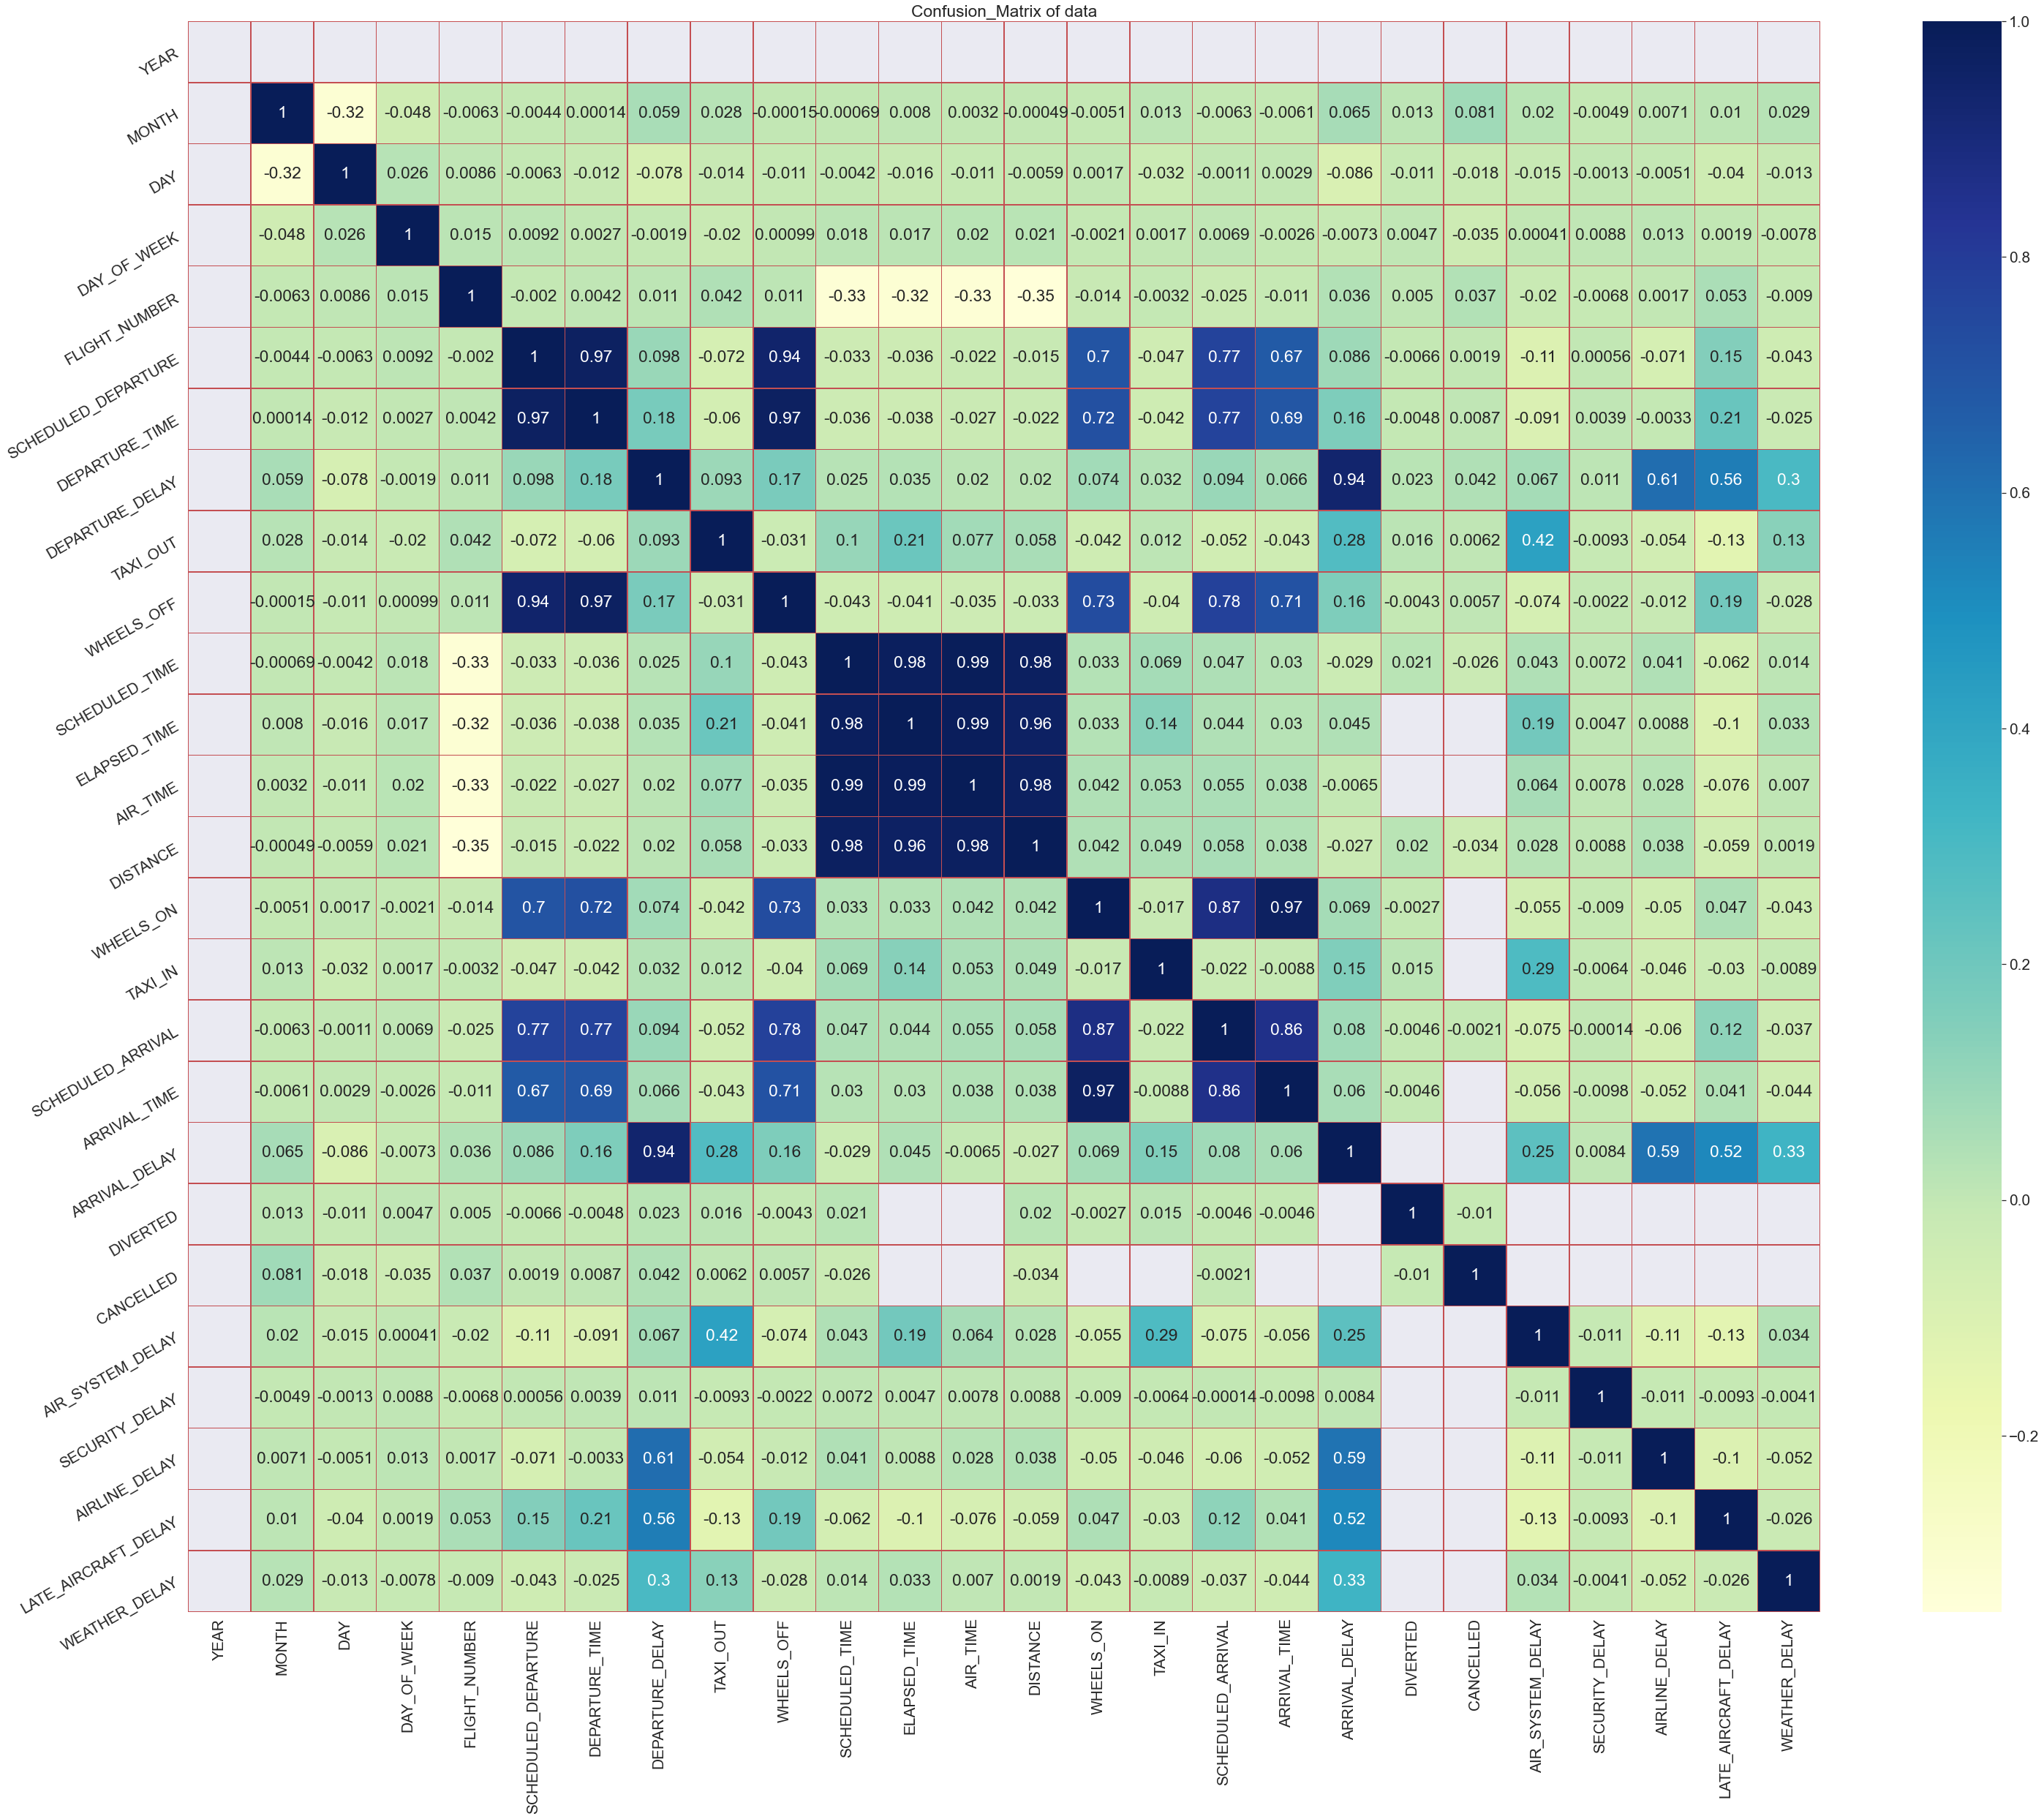

In [72]:
# Visualize The Feathure Correlations ::
sns.set( rc = {"figure.figsize" : [50 , 40]} , font_scale=1.9)
sns.heatmap(Con_Matrix , annot=True , cmap="YlGnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 90)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

In [73]:
df.head(2)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                  NaN               NaN   
1           -9.0         0          0                  NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             NaN            NaN                  NaN            NaN  
1             NaN            NaN                  NaN            NaN  

[2 rows x 31 columns]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1000000 non-null  int64  
 1   MONTH                1000000 non-null  int64  
 2   DAY                  1000000 non-null  int64  
 3   DAY_OF_WEEK          1000000 non-null  int64  
 4   AIRLINE              1000000 non-null  object 
 5   FLIGHT_NUMBER        1000000 non-null  int64  
 6   TAIL_NUMBER          992291 non-null   object 
 7   ORIGIN_AIRPORT       1000000 non-null  object 
 8   DESTINATION_AIRPORT  1000000 non-null  object 
 9   SCHEDULED_DEPARTURE  1000000 non-null  int64  
 10  DEPARTURE_TIME       960842 non-null   float64
 11  DEPARTURE_DELAY      960842 non-null   float64
 12  TAXI_OUT             960145 non-null   float64
 13  WHEELS_OFF           960145 non-null   float64
 14  SCHEDULED_TIME       999998 non-null   float64
 15 

In [75]:
# To Present species of AIRLINEs ::
AIRLINEs = df["AIRLINE"].value_counts()
AIRLINEs

WN    210935
DL    140424
EV    105989
OO    102258
AA     93013
UA     83515
US     70657
MQ     62828
B6     45965
AS     28220
NK     18699
F9     14035
HA     13506
VX      9956
Name: AIRLINE, dtype: int64

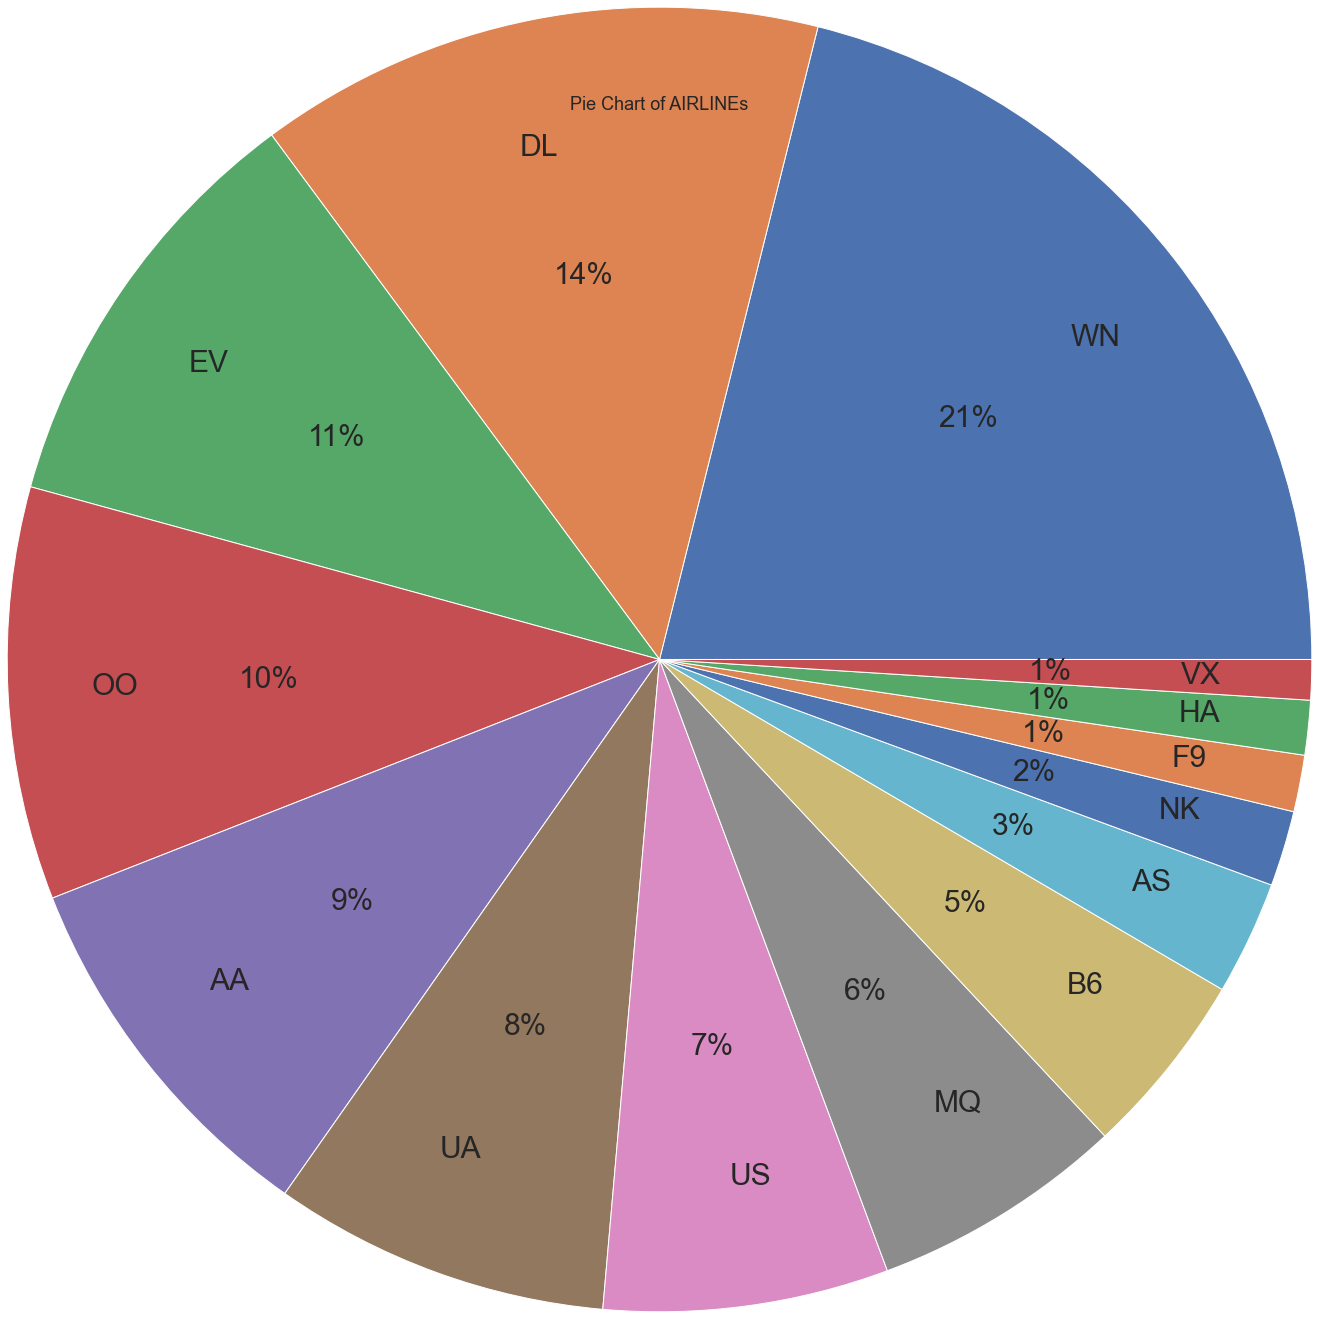

In [76]:
# Visualize Comparing workclass ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
AIRLINEs.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 0.8 , fontsize = 30)
plt.title("Pie Chart of AIRLINEs")
plt.show()

In [77]:
# To Present species of ORIGIN_AIRPORTs ::
ORIGIN_AIRPORTs = df["ORIGIN_AIRPORT"].value_counts()[:20]
ORIGIN_AIRPORTs

ATL    63413
ORD    50494
DFW    48665
LAX    36744
DEN    36459
IAH    28447
PHX    27799
SFO    27157
LAS    24600
MCO    21434
LGA    20584
DTW    20376
CLT    19533
BOS    19282
MSP    19124
EWR    18718
SLC    18404
JFK    18012
SEA    17954
FLL    15413
Name: ORIGIN_AIRPORT, dtype: int64

Text(0.5, 1.0, 'Pie Chart of ORIGIN_AIRPORTs')

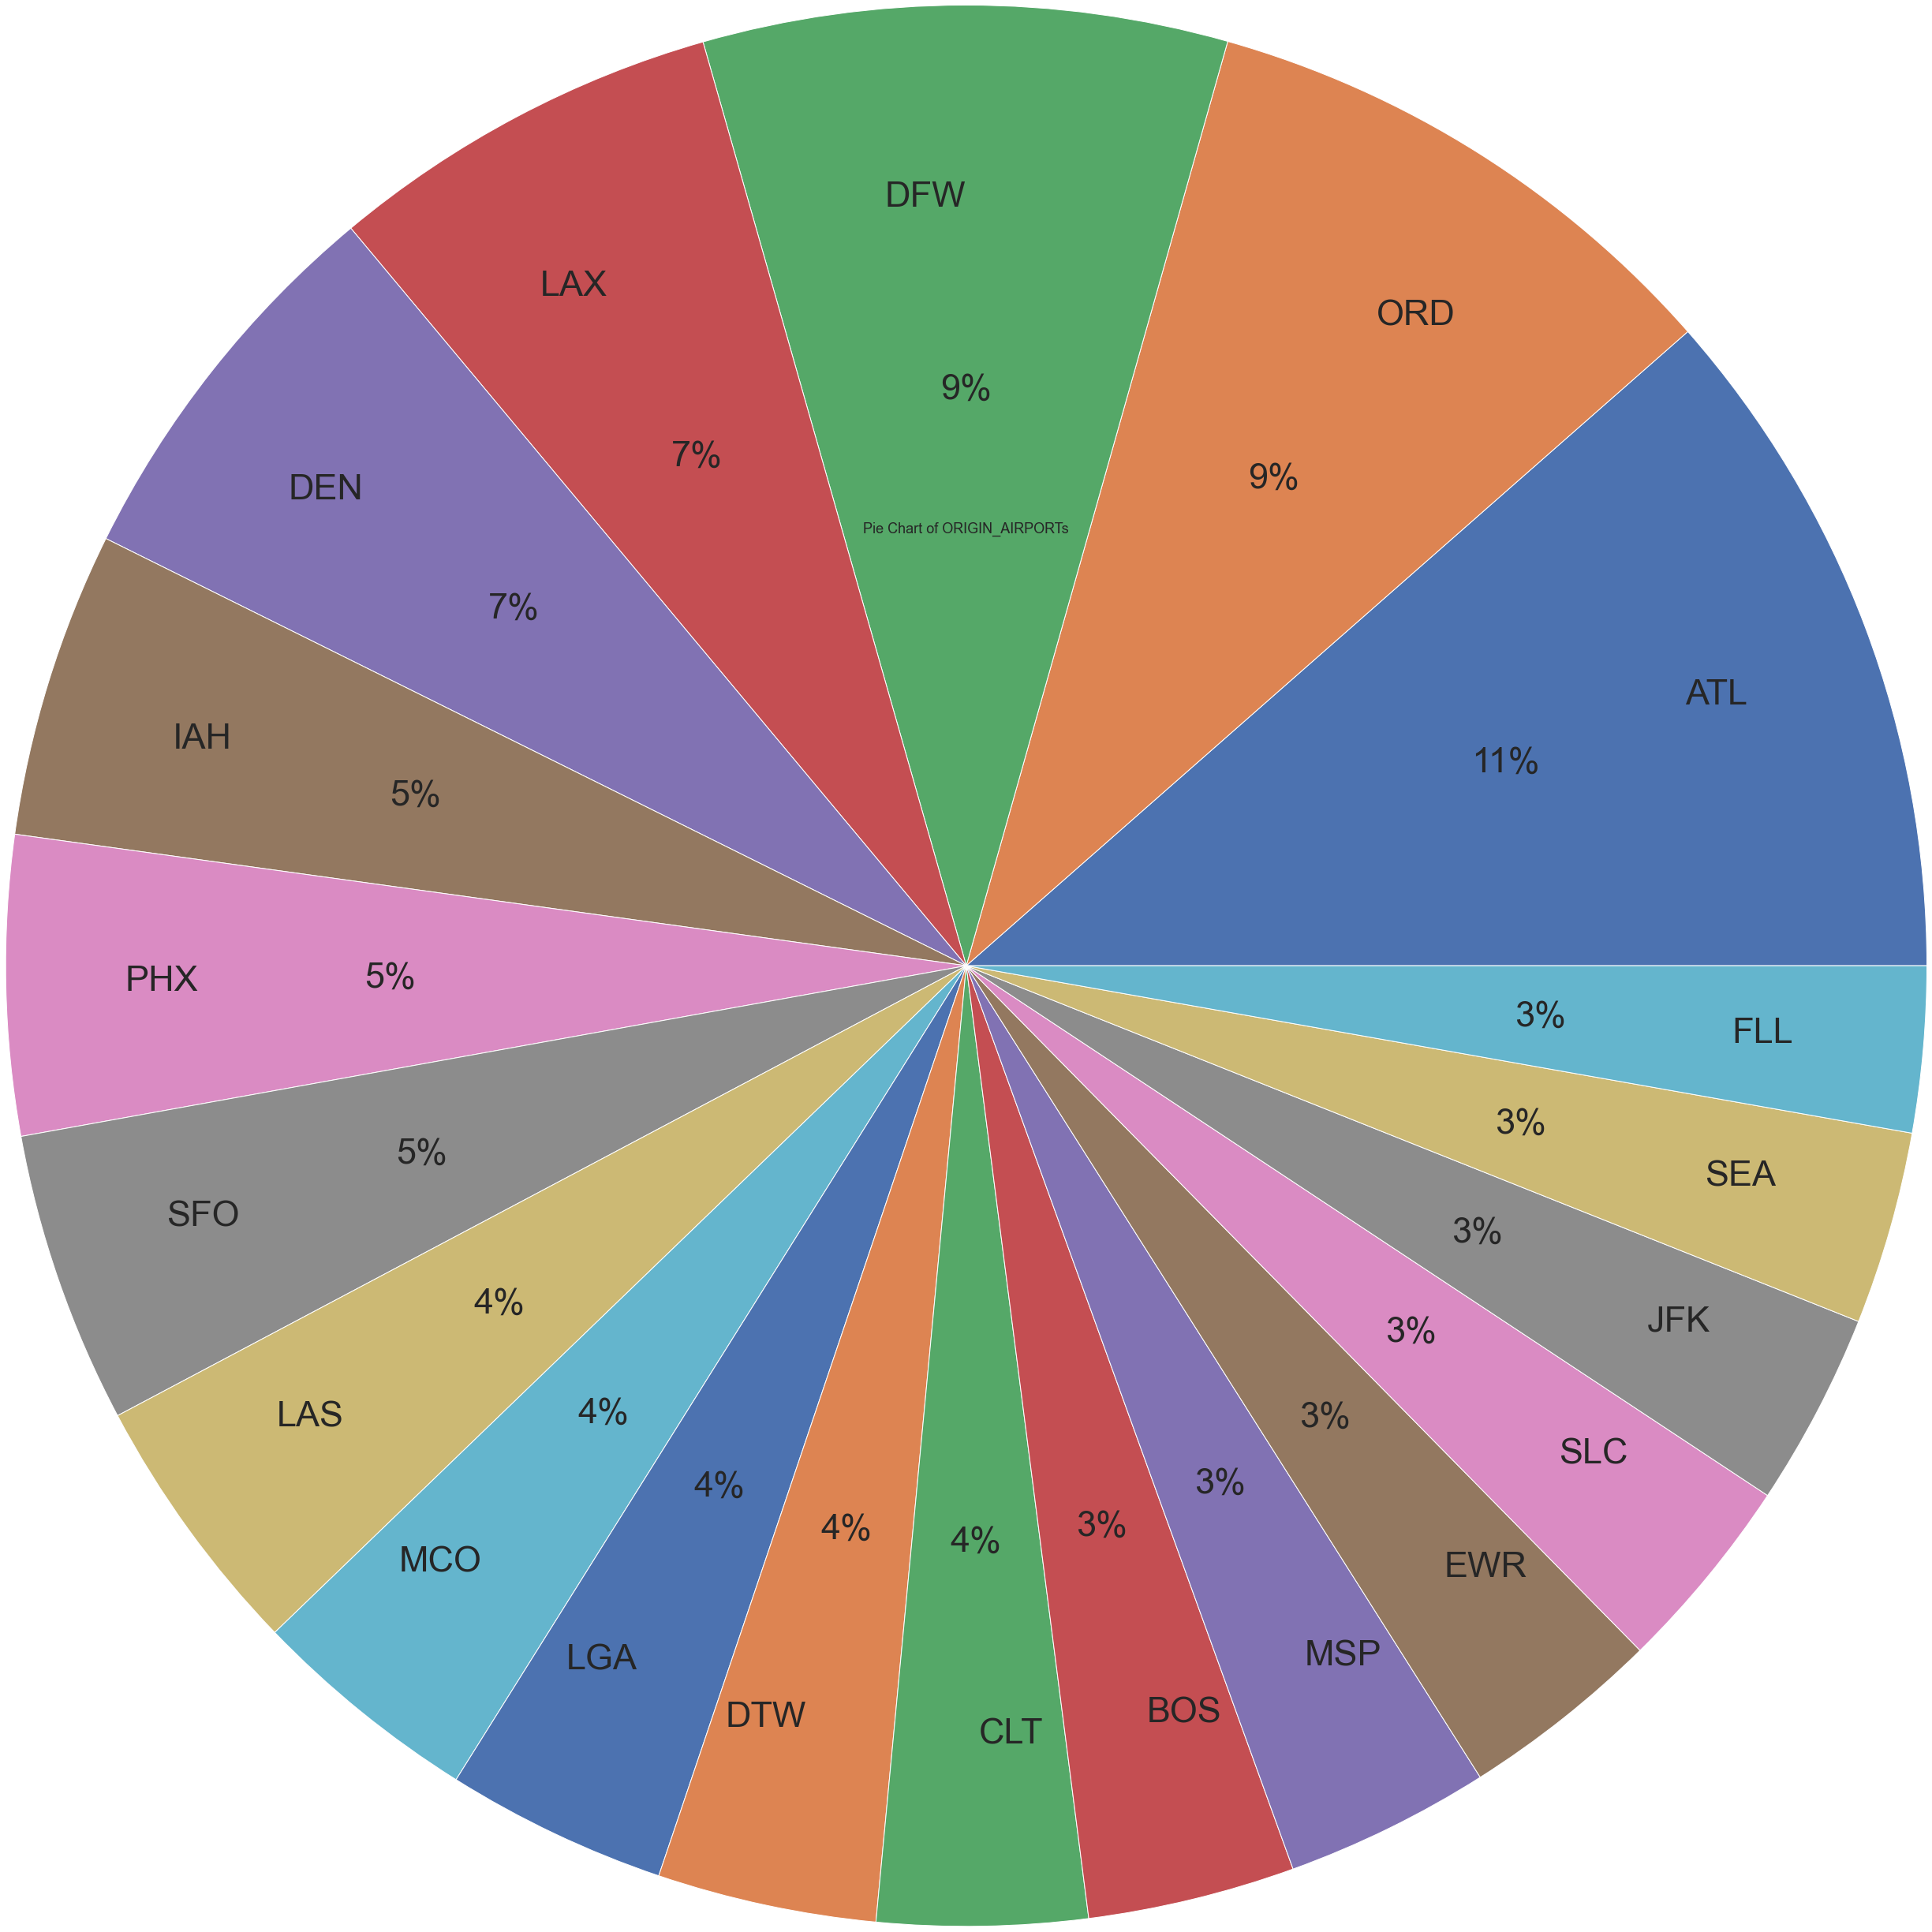

In [78]:
ORIGIN_AIRPORTs.plot.pie(autopct = "%1.0f%%" , radius = 2.8 , labeldistance = 0.8 , fontsize = 45)
plt.title("Pie Chart of ORIGIN_AIRPORTs")

In [79]:
# To Present species of MONTH ::
MONTHs = df["MONTH"].value_counts()
MONTHs

1    469968
2    429191
3    100841
Name: MONTH, dtype: int64

Text(0.5, 1.0, 'Pie Chart of MONTH')

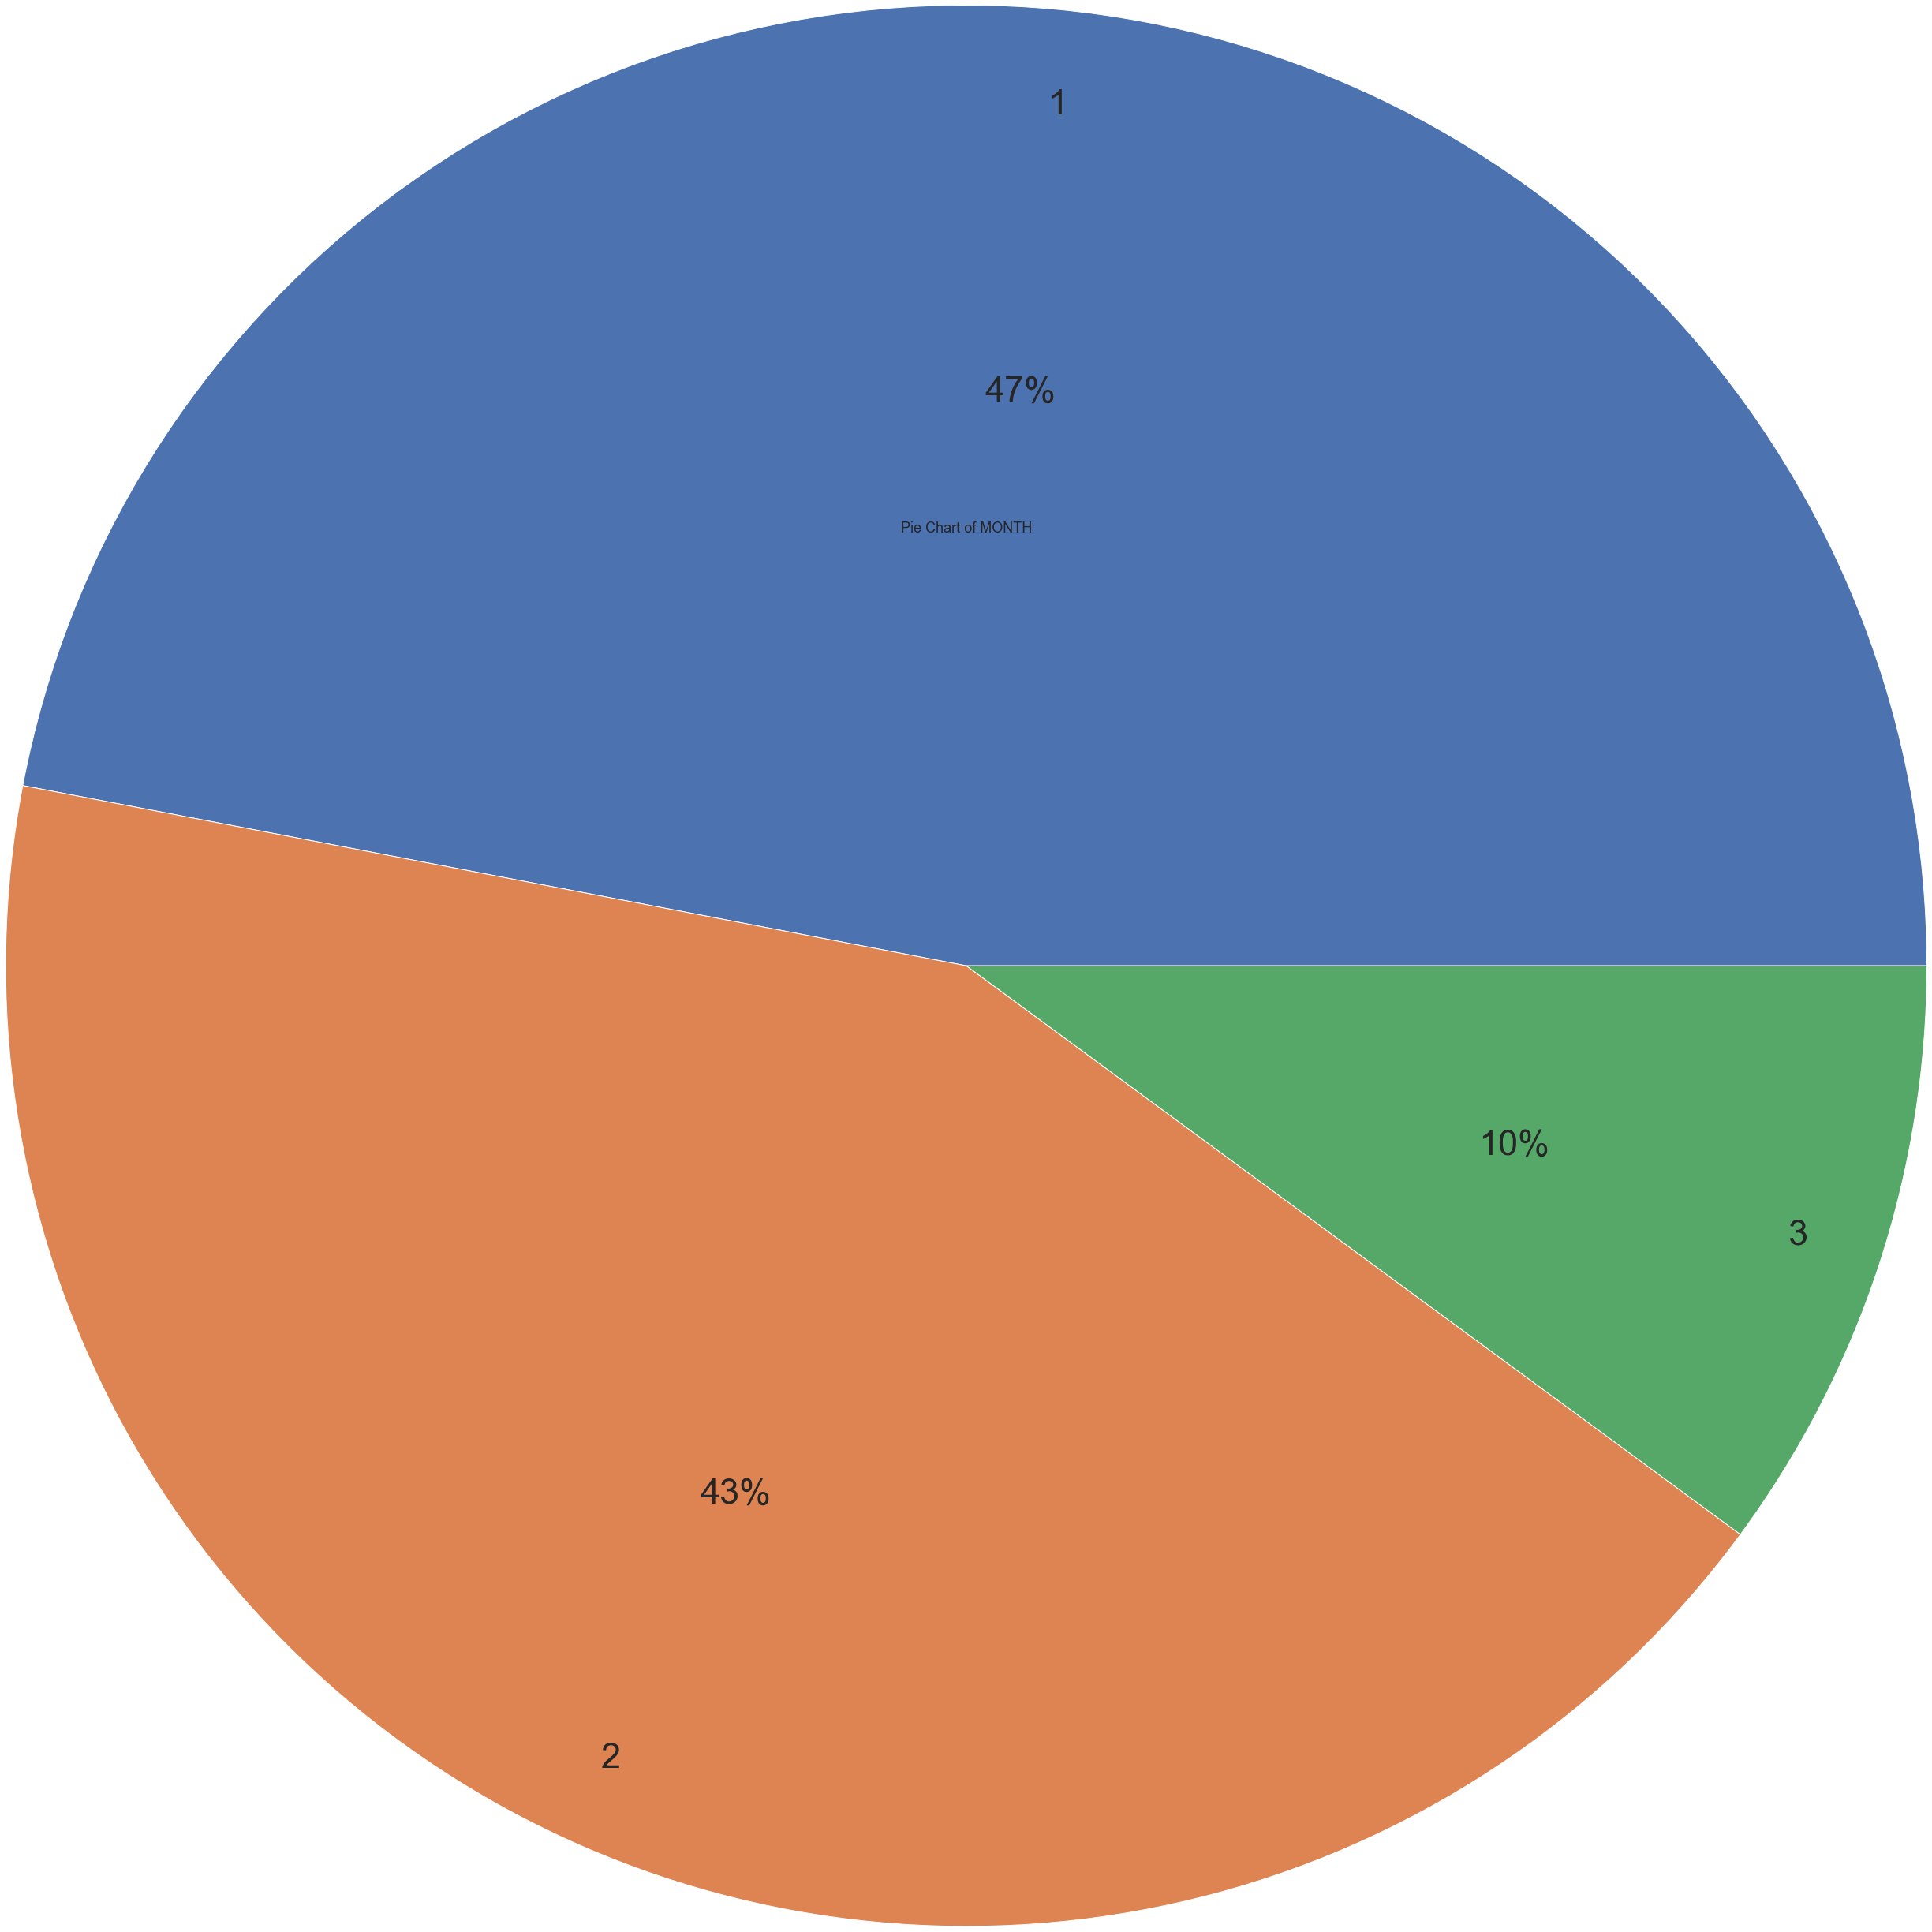

In [80]:
MONTHs.plot.pie(autopct = "%1.0f%%" , radius = 2.8 , labeldistance = 0.9 , fontsize = 45)
plt.title("Pie Chart of MONTH")

In [81]:
# To Present species of DAY_OF_WEEK ::
DAY_OF_WEEKs = df["DAY_OF_WEEK"].value_counts()
DAY_OF_WEEKs

5    163070
4    159800
1    145159
3    141753
2    139148
7    132569
6    118501
Name: DAY_OF_WEEK, dtype: int64

Text(0.5, 1.0, 'Pie Chart of DAY_OF_WEEKs')

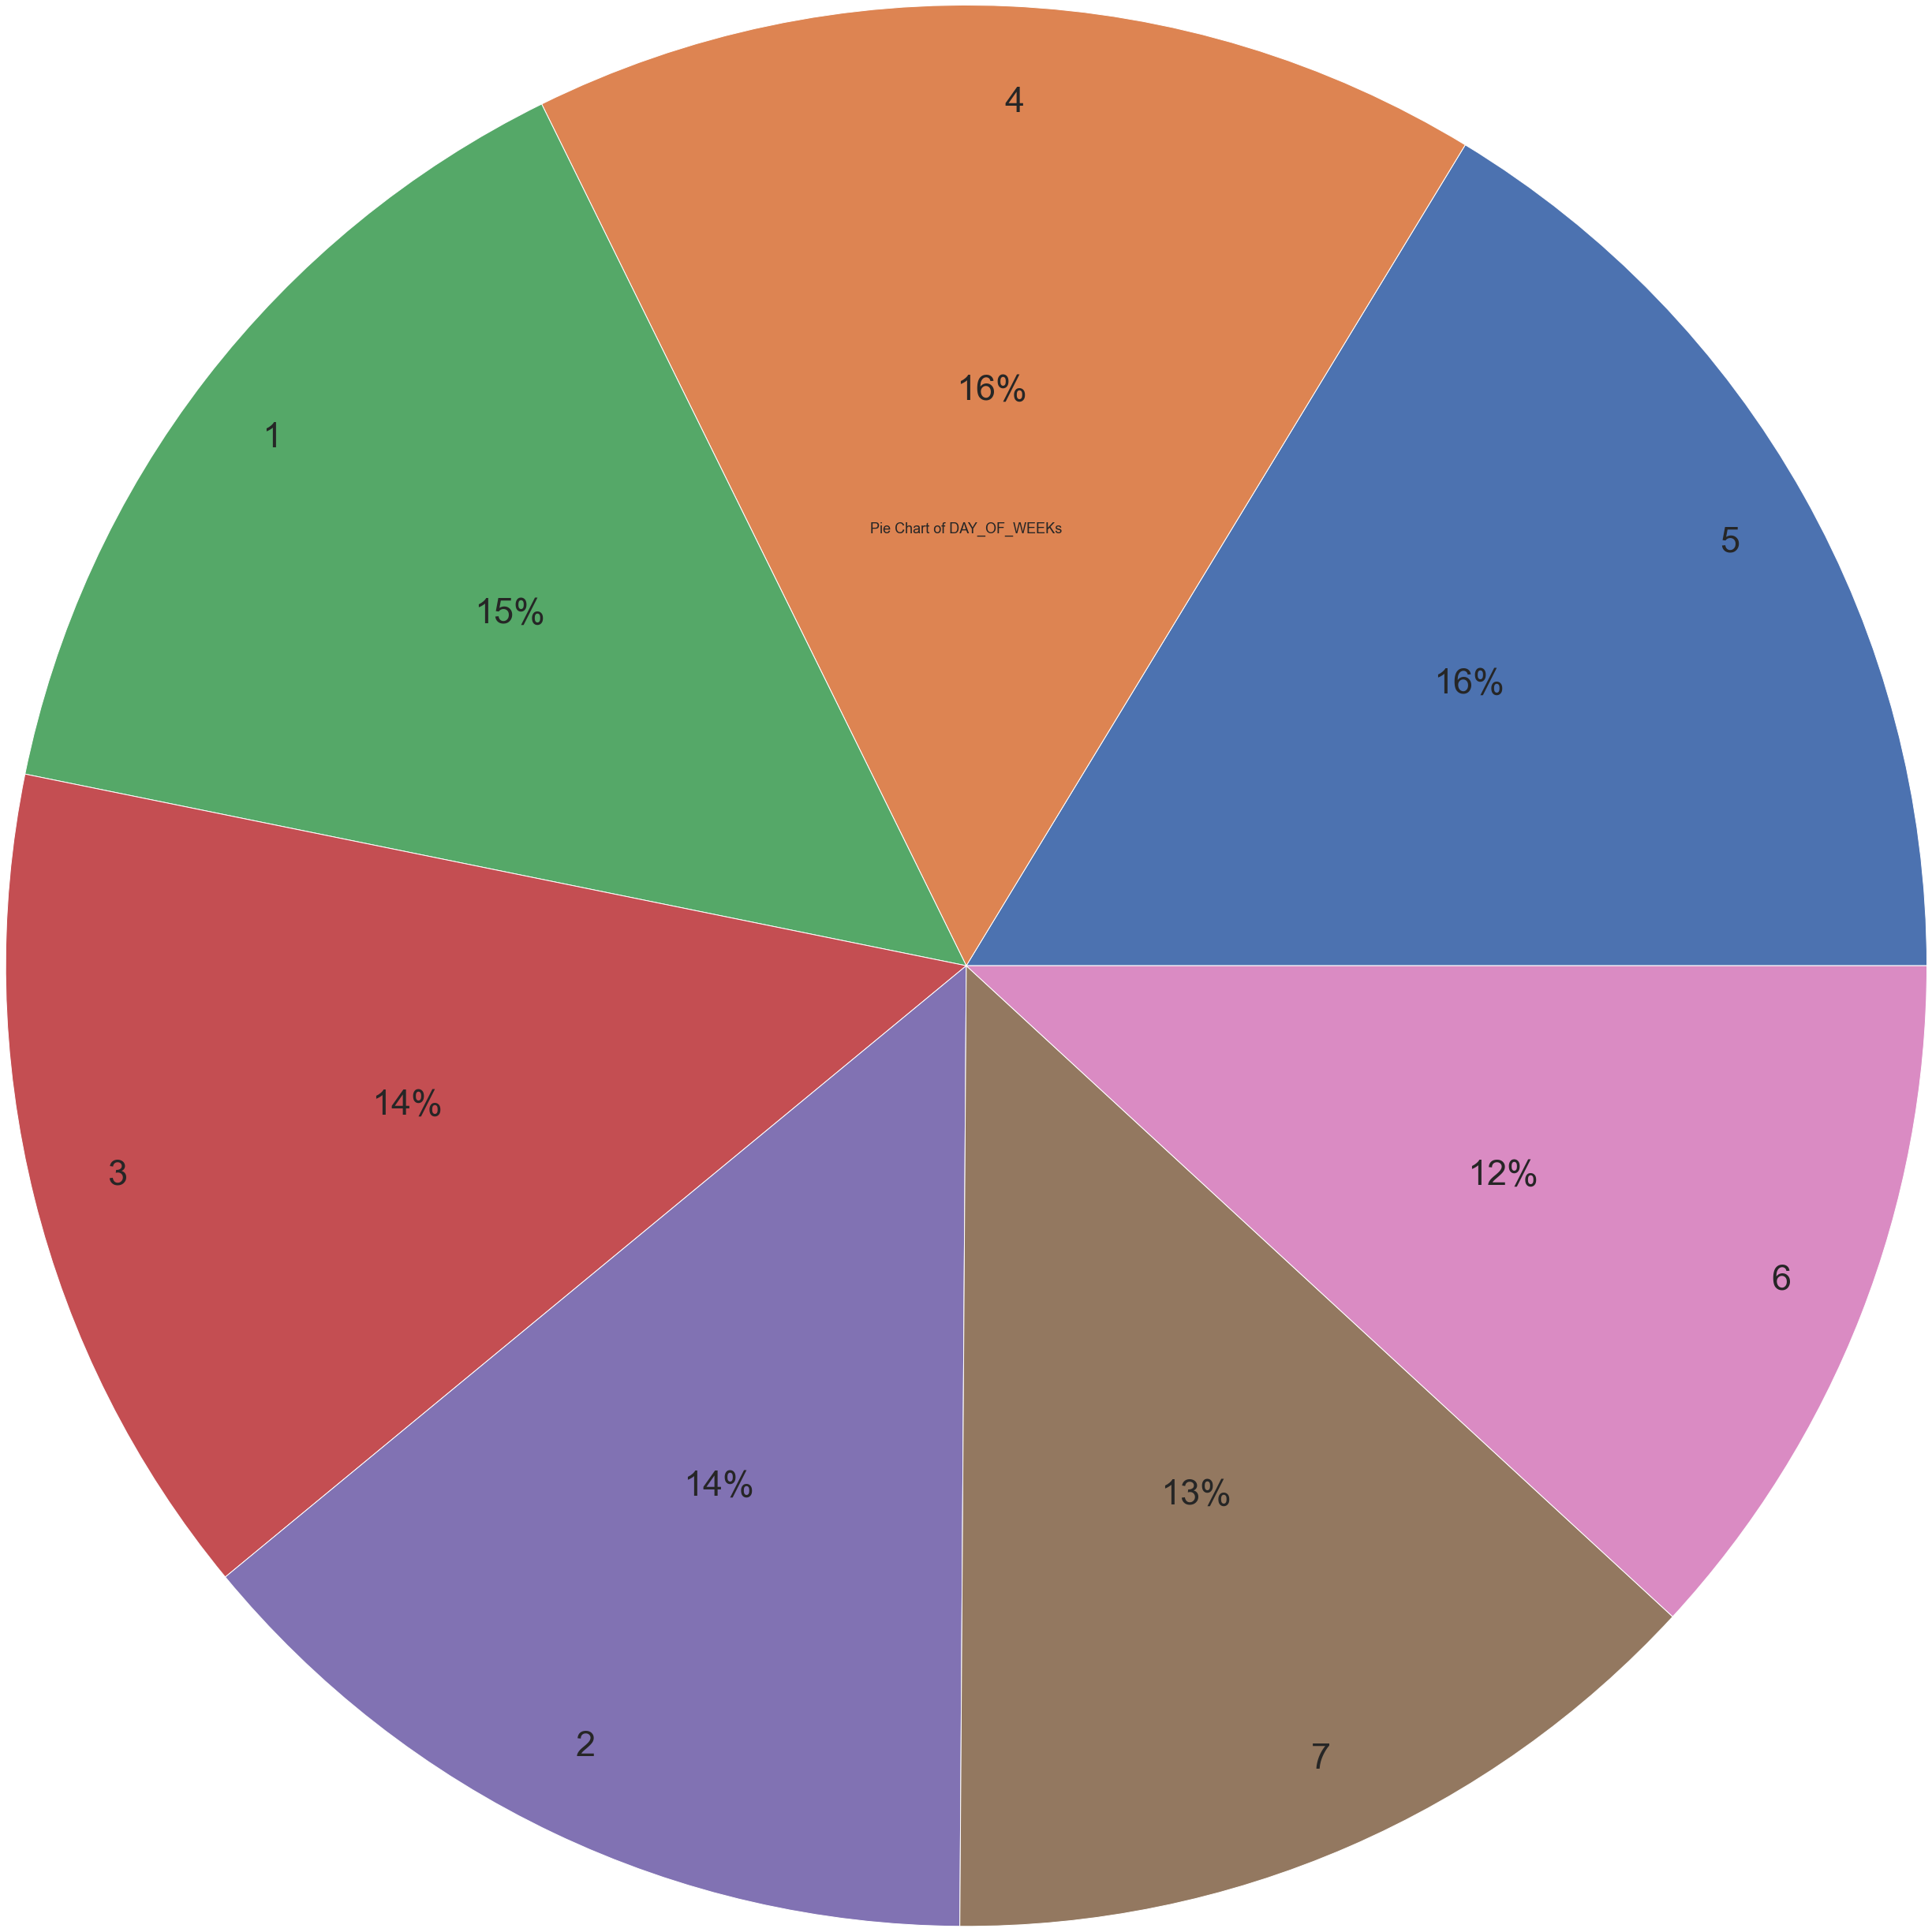

In [82]:
DAY_OF_WEEKs.plot.pie(autopct = "%1.0f%%" , radius = 2.8 , labeldistance = 0.9 , fontsize = 45)
plt.title("Pie Chart of DAY_OF_WEEKs")

In [83]:
# To Present species of DAY ::
DAYs = df["DAY"].value_counts()
DAYs

5     49180
2     49165
4     48089
6     48024
3     46586
1     42527
23    32431
16    32372
26    32331
19    32243
12    32191
9     31899
20    31657
13    31656
27    31615
7     31517
22    31190
25    30879
8     30735
15    30428
11    30295
18    30030
21    28422
28    28407
24    28186
17    28147
14    28131
10    27520
30    16080
29    16030
31    12037
Name: DAY, dtype: int64

Text(0.5, 1.0, 'Pie Chart of DAY')

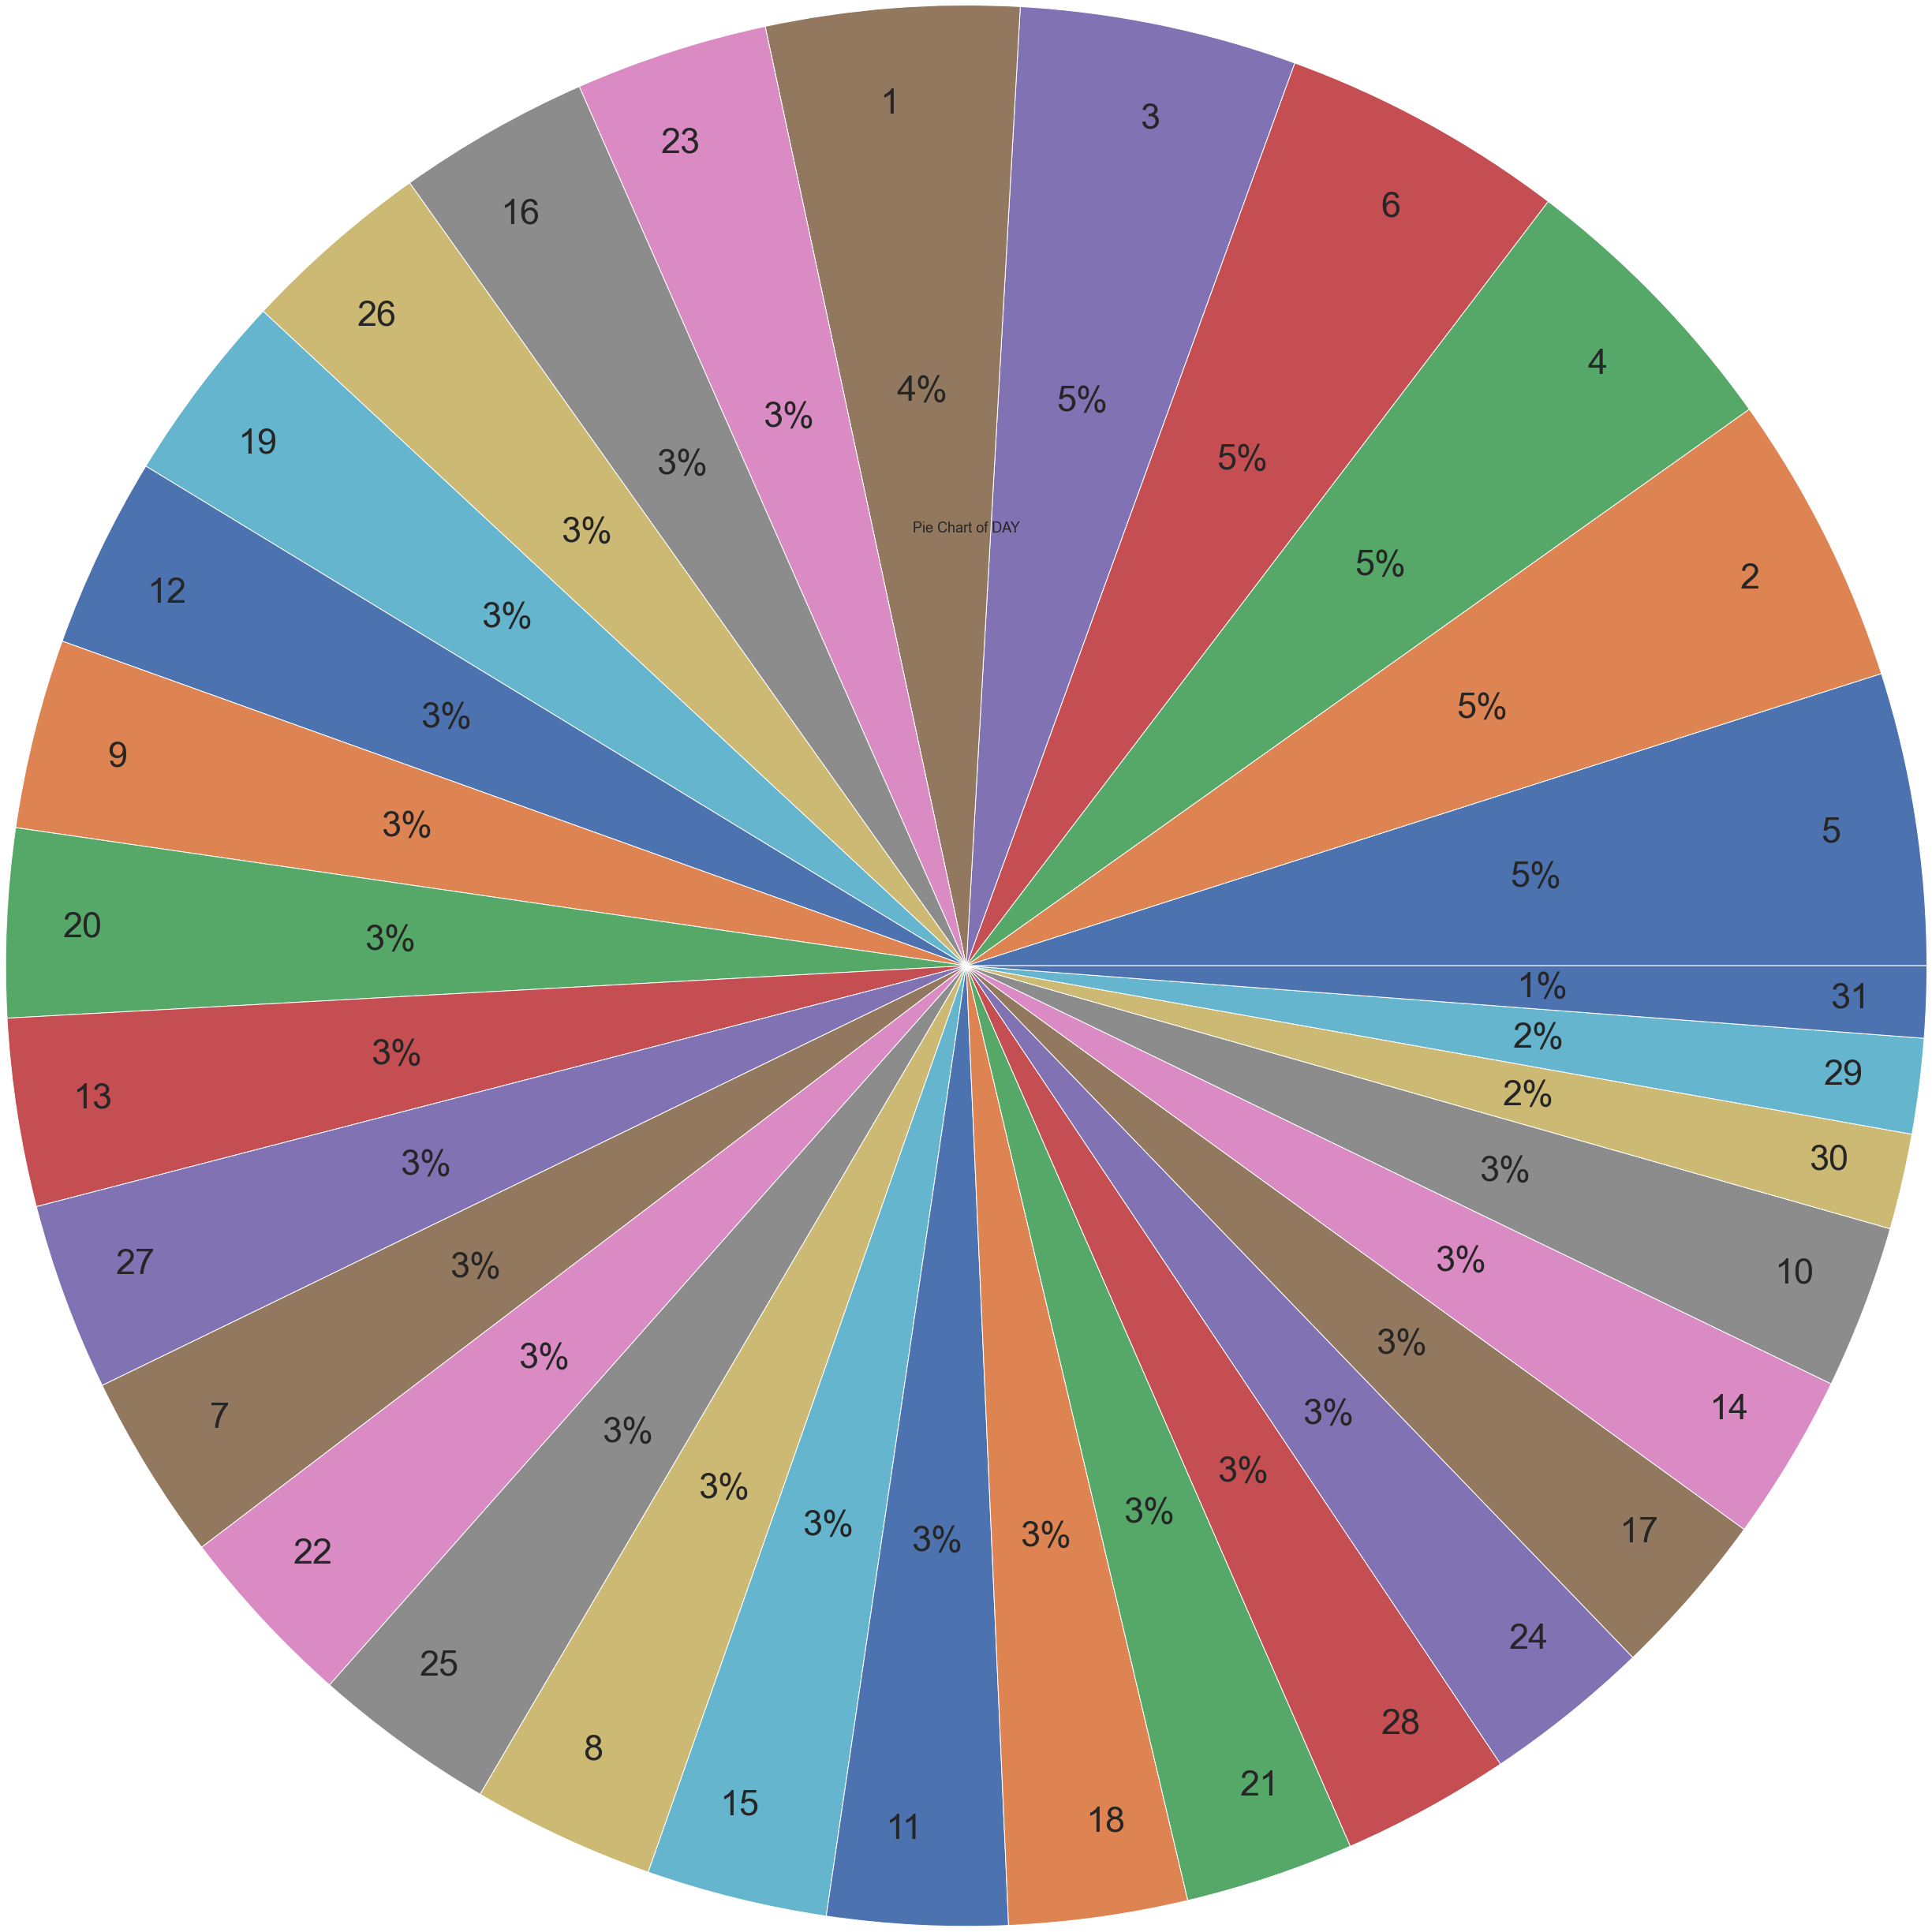

In [84]:
DAYs.plot.pie(autopct = "%1.0f%%" , radius = 2.8 , labeldistance = 0.9 , fontsize = 45)
plt.title("Pie Chart of DAY")

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1000000 non-null  int64  
 1   MONTH                1000000 non-null  int64  
 2   DAY                  1000000 non-null  int64  
 3   DAY_OF_WEEK          1000000 non-null  int64  
 4   AIRLINE              1000000 non-null  object 
 5   FLIGHT_NUMBER        1000000 non-null  int64  
 6   TAIL_NUMBER          992291 non-null   object 
 7   ORIGIN_AIRPORT       1000000 non-null  object 
 8   DESTINATION_AIRPORT  1000000 non-null  object 
 9   SCHEDULED_DEPARTURE  1000000 non-null  int64  
 10  DEPARTURE_TIME       960842 non-null   float64
 11  DEPARTURE_DELAY      960842 non-null   float64
 12  TAXI_OUT             960145 non-null   float64
 13  WHEELS_OFF           960145 non-null   float64
 14  SCHEDULED_TIME       999998 non-null   float64
 15 

Text(0.5, 1.0, 'Distribution Plot of DEPARTURE_TIME')

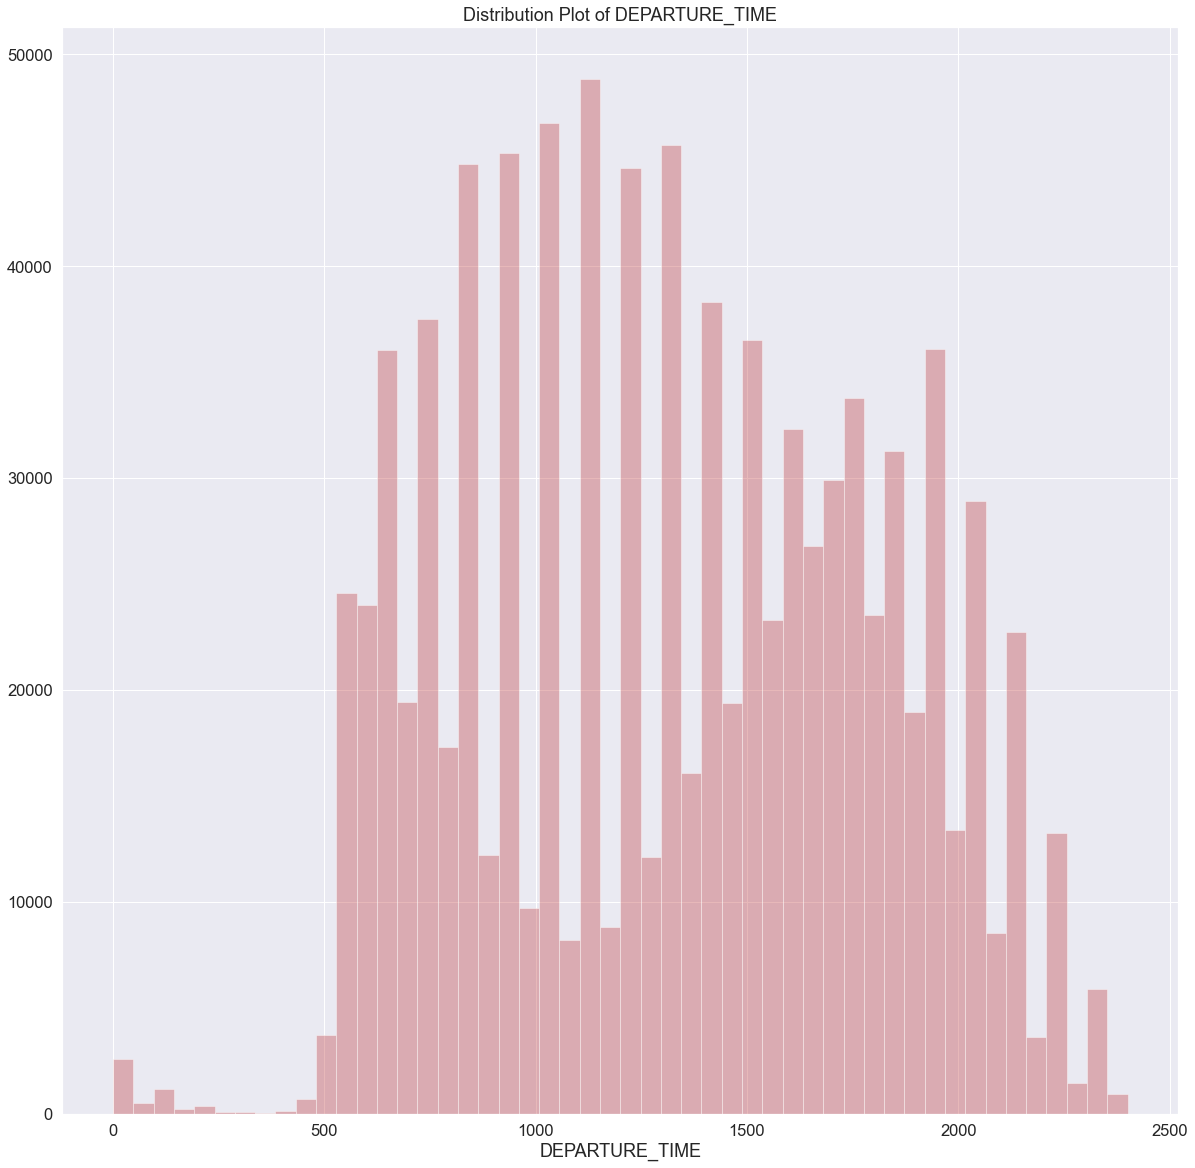

In [86]:
sns.distplot(df["DEPARTURE_TIME"] , kde=False , color="r")
plt.title("Distribution Plot of DEPARTURE_TIME")

Text(0.5, 1.0, 'Kde Plot of DEPARTURE_TIME')

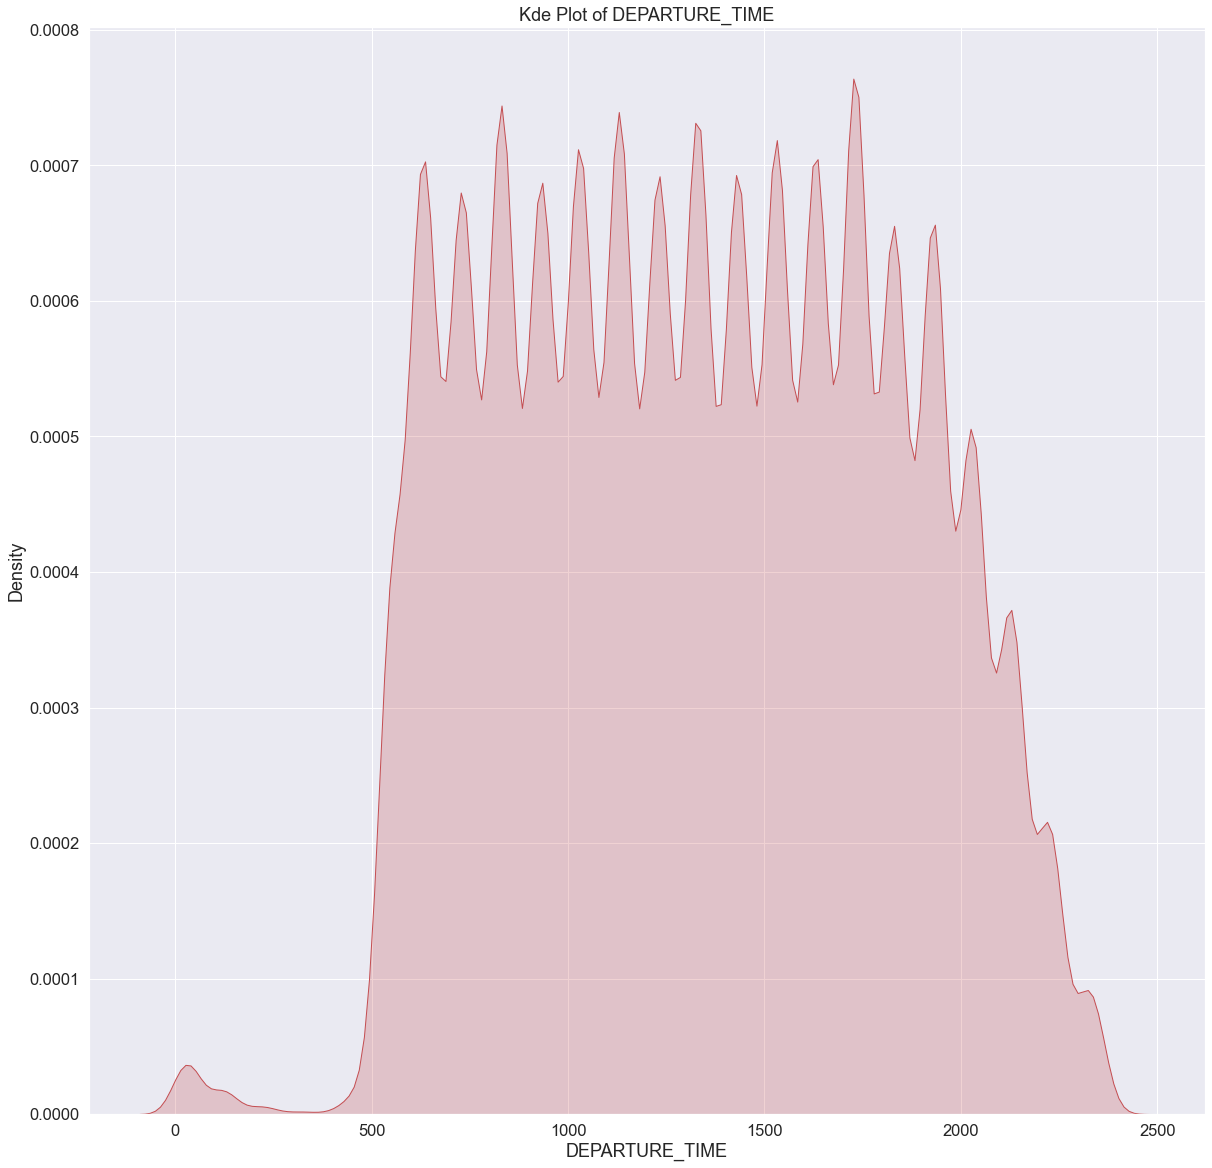

In [87]:
sns.kdeplot(df["DEPARTURE_TIME"] , shade=True , color="r")
plt.title("Kde Plot of DEPARTURE_TIME")

Text(0.5, 1.0, 'Distribution Plot of DEPARTURE_DELAY')

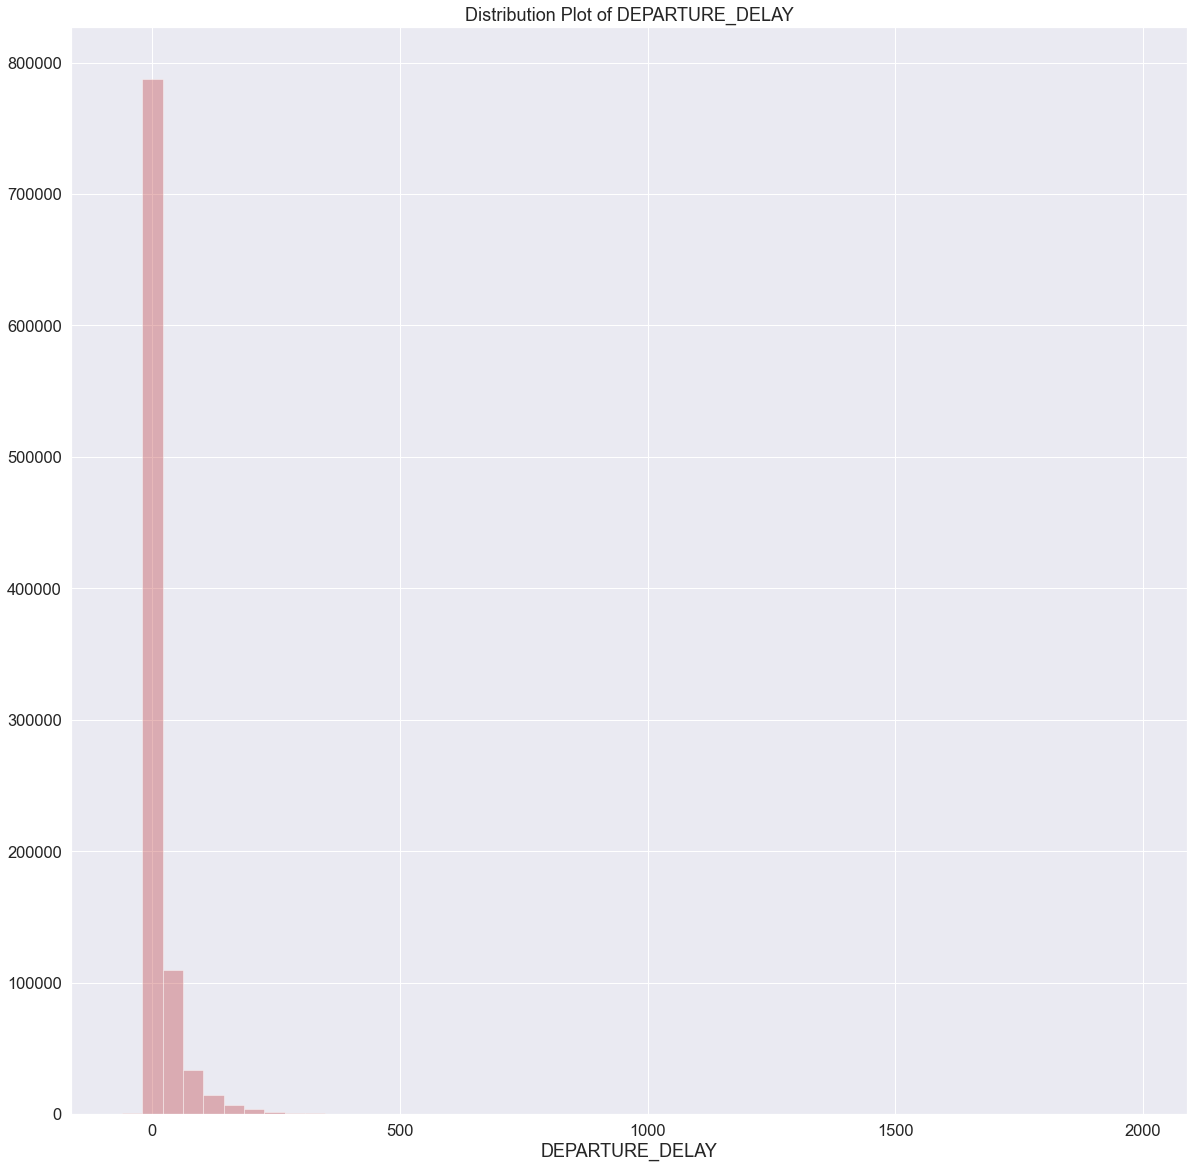

In [88]:
sns.distplot(df["DEPARTURE_DELAY"] , kde=False , color="r")
plt.title("Distribution Plot of DEPARTURE_DELAY")

Text(0.5, 1.0, 'Kde Plot of DEPARTURE_DELAY')

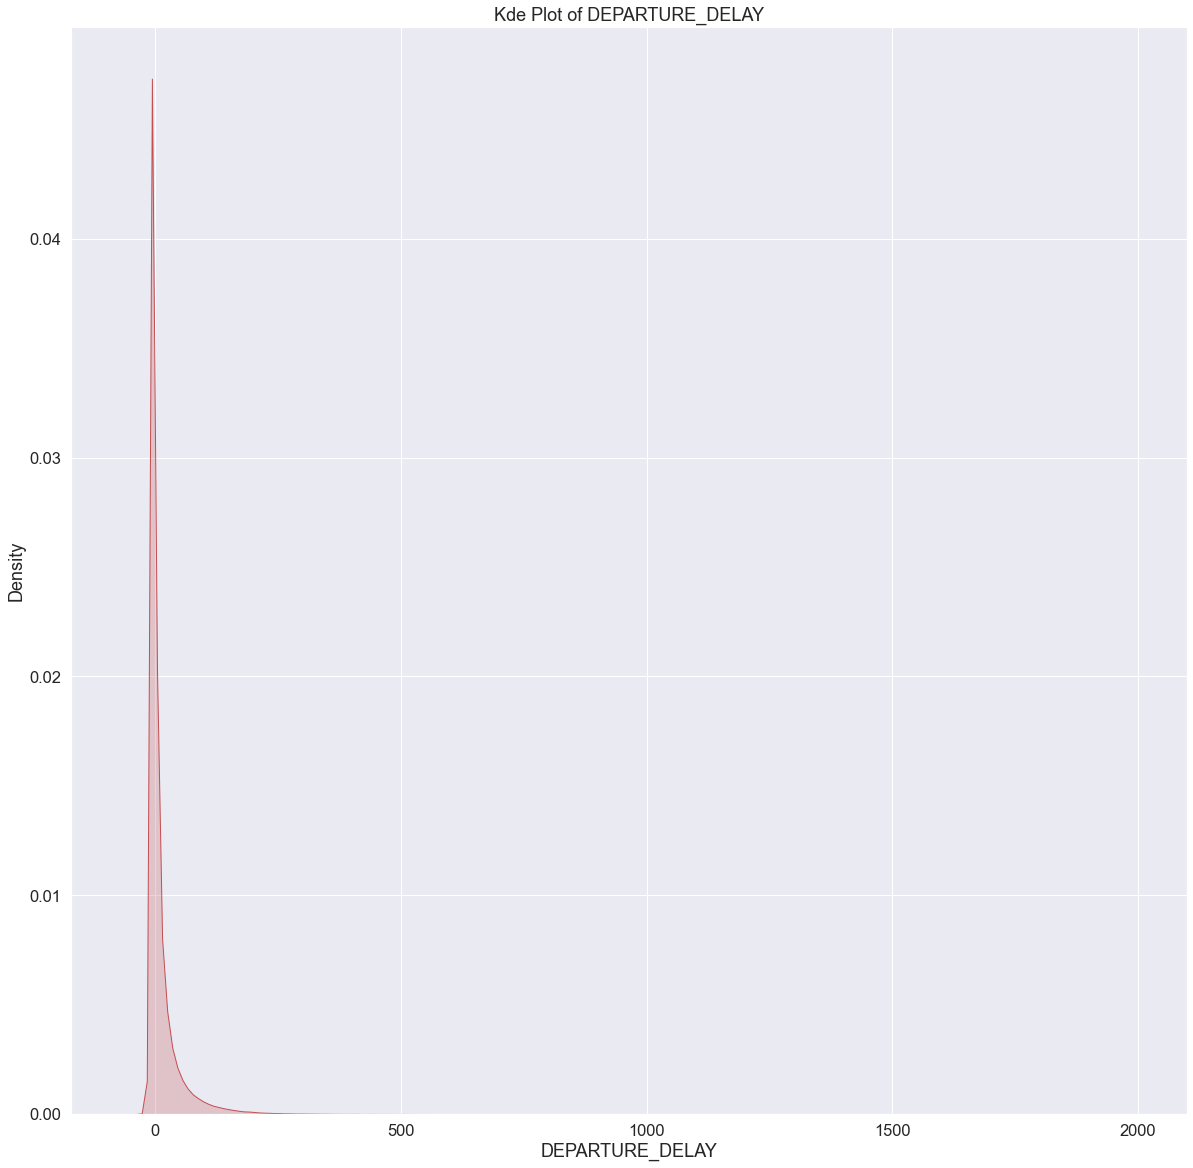

In [89]:
sns.kdeplot(df["DEPARTURE_DELAY"] , shade=True , color="r")
plt.title("Kde Plot of DEPARTURE_DELAY")

Text(0.5, 1.0, 'Distribution Plot of TAXI_OUT')

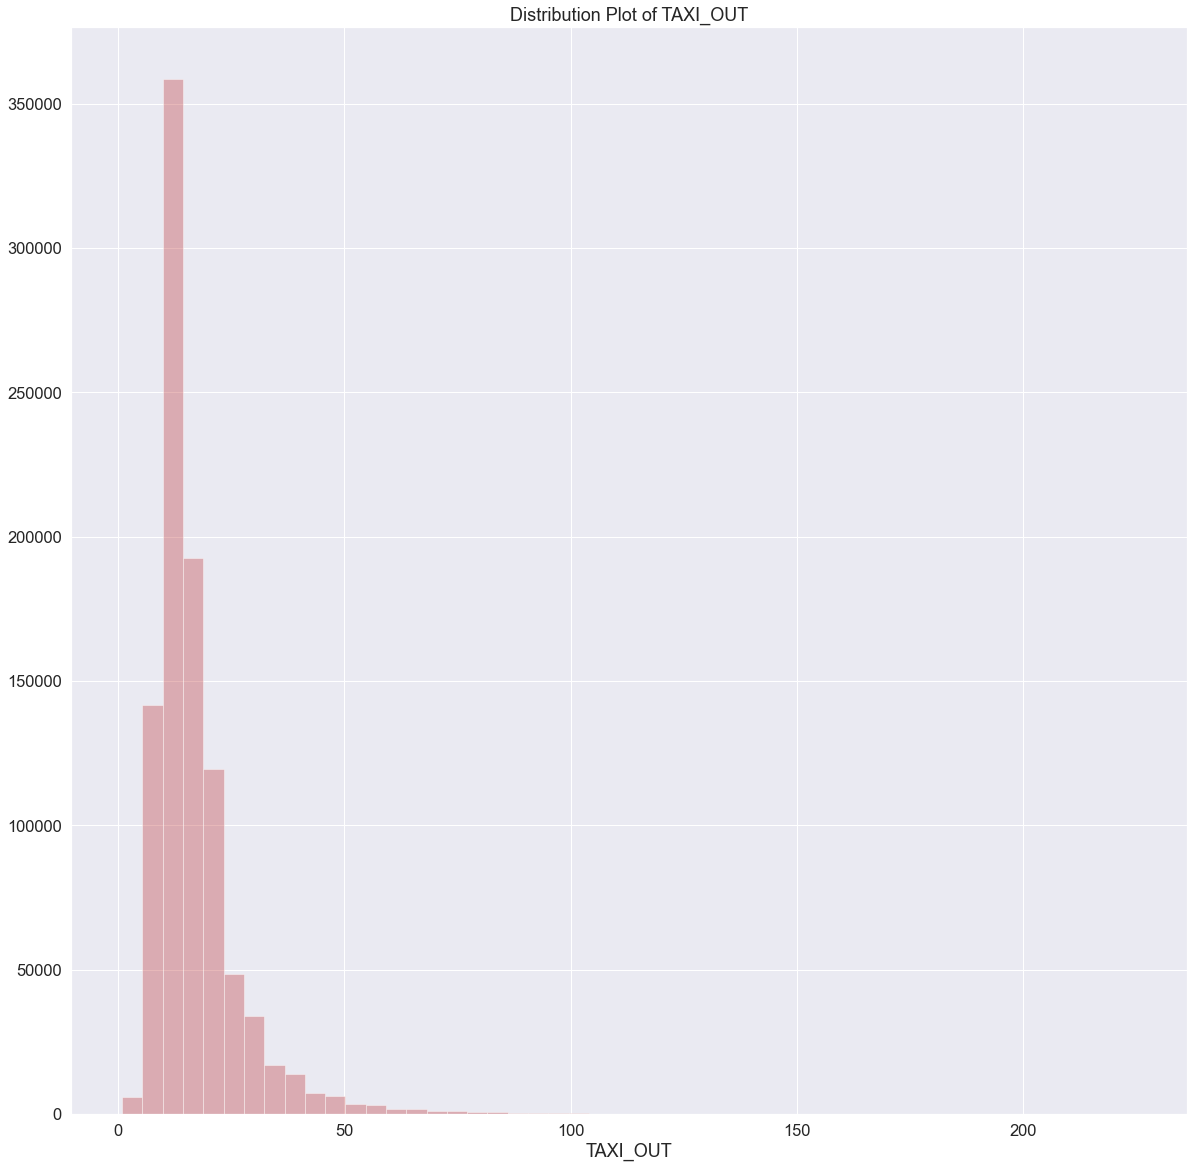

In [90]:
sns.distplot(df["TAXI_OUT"] , kde=False , color="r")
plt.title("Distribution Plot of TAXI_OUT")

Text(0.5, 1.0, 'Kde Plot of TAXI_OUT')

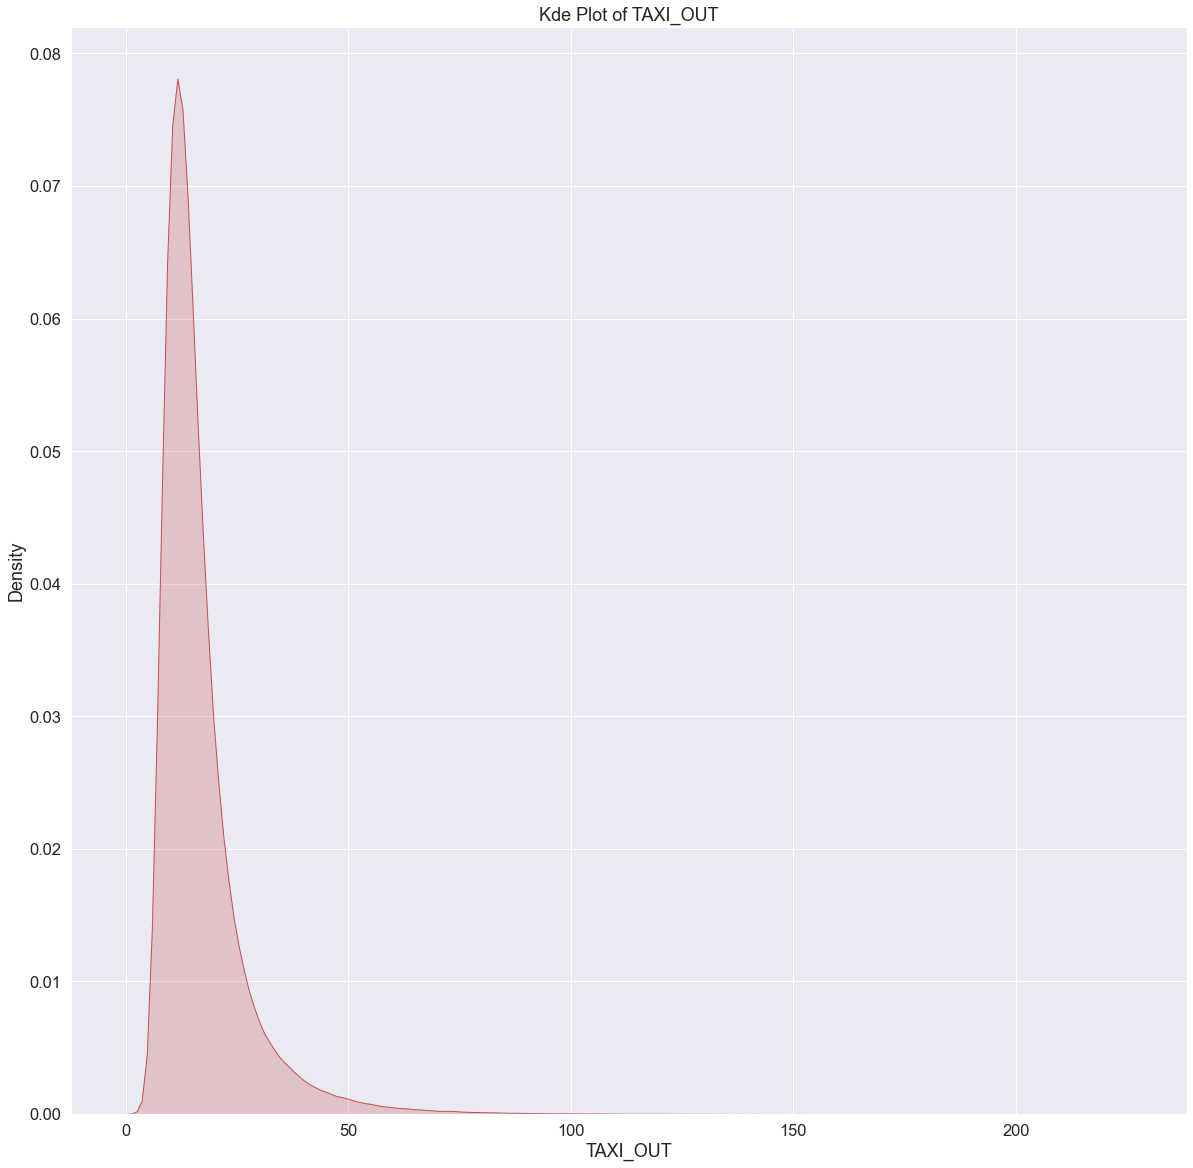

In [91]:
sns.kdeplot(df["TAXI_OUT"] , shade=True , color="r")
plt.title("Kde Plot of TAXI_OUT")

Text(0.5, 1.0, 'Distribution Plot of SCHEDULED_TIME')

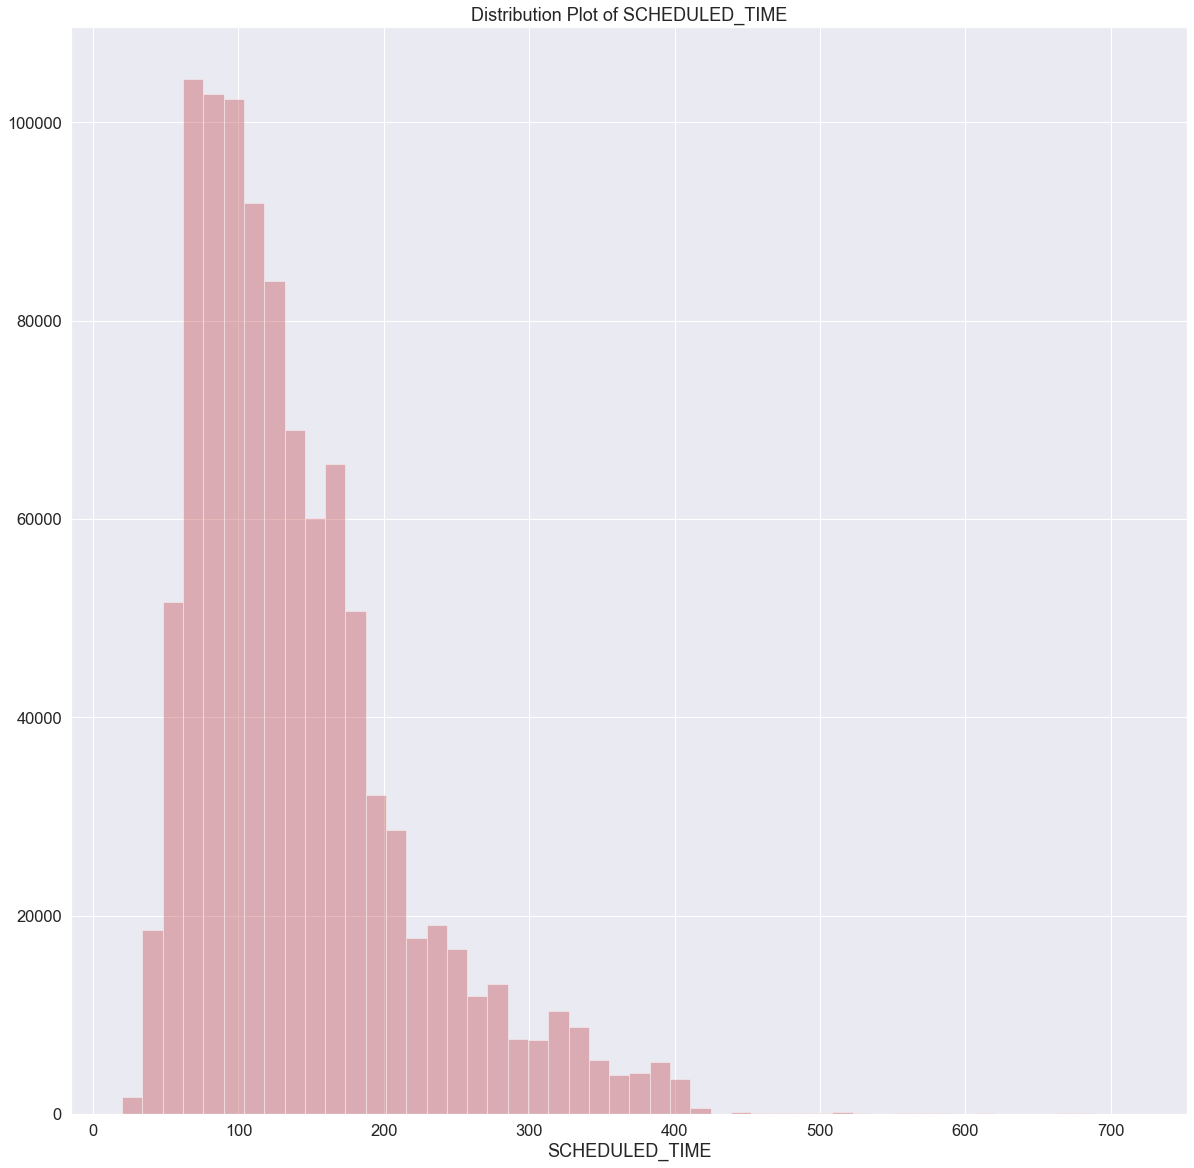

In [92]:
sns.distplot(df["SCHEDULED_TIME"] , kde=False , color="r")
plt.title("Distribution Plot of SCHEDULED_TIME")

Text(0.5, 1.0, 'Kde Plot of SCHEDULED_TIME')

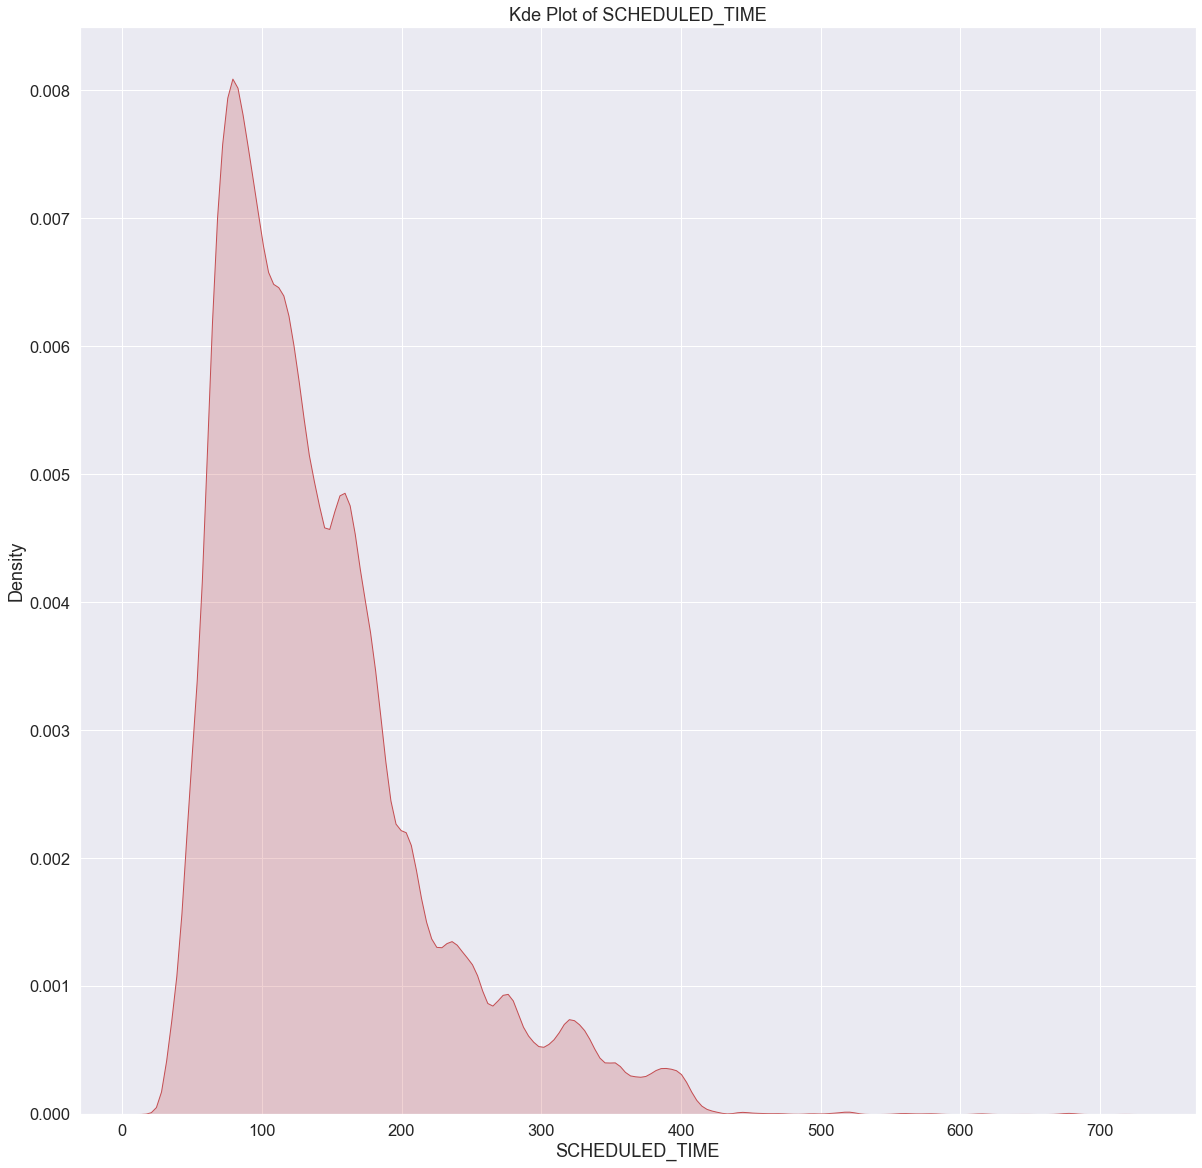

In [93]:
sns.kdeplot(df["SCHEDULED_TIME"] , shade=True , color="r")
plt.title("Kde Plot of SCHEDULED_TIME")

Text(0.5, 1.0, 'Distribution Plot of ELAPSED_TIME')

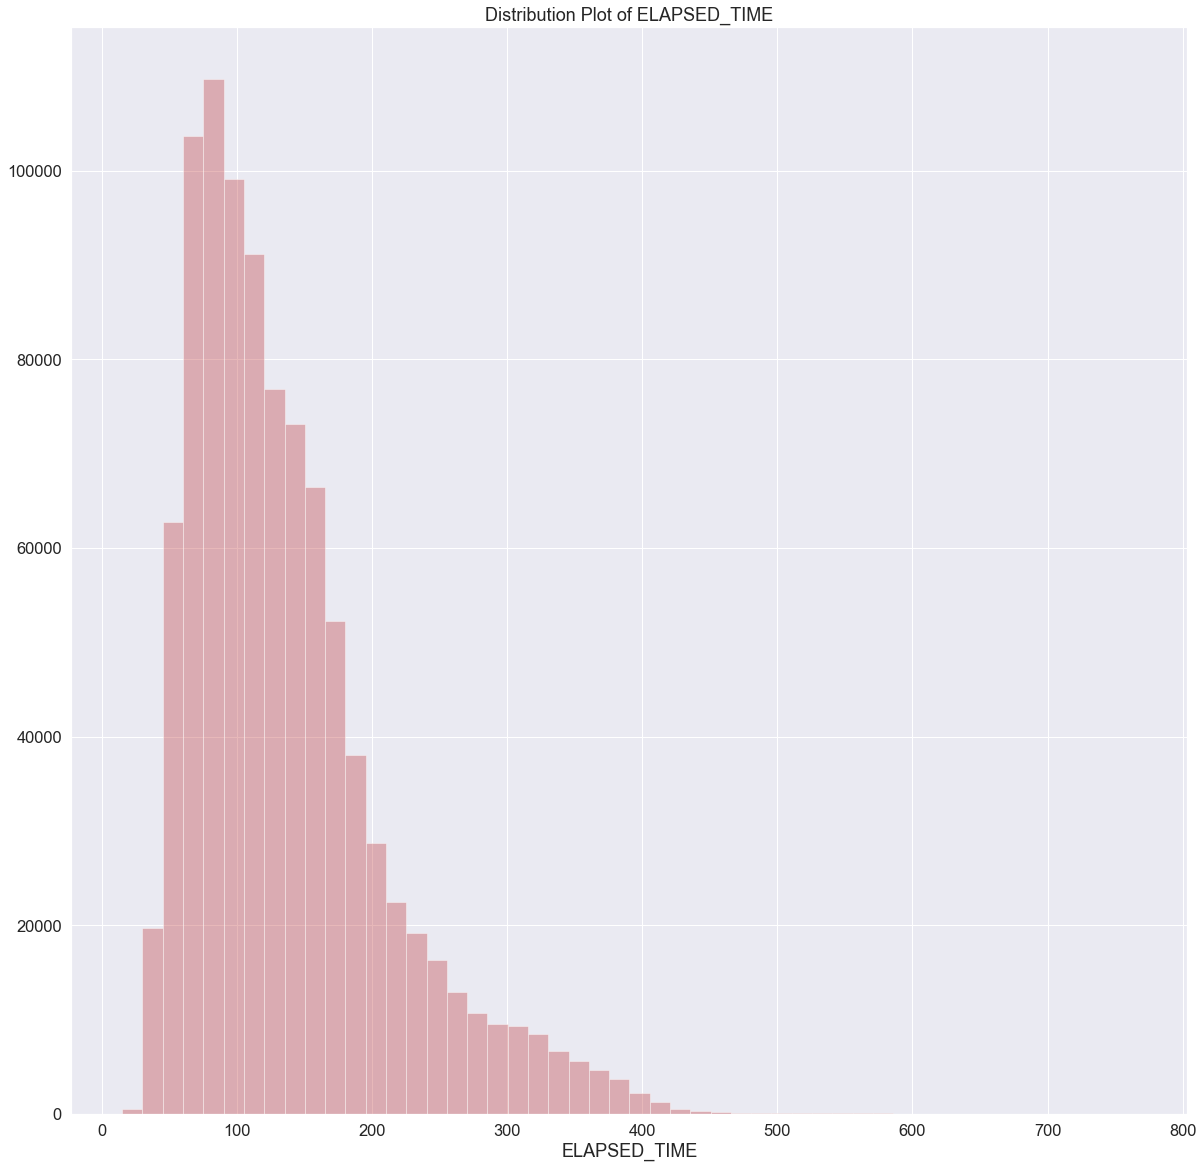

In [94]:
sns.distplot(df["ELAPSED_TIME"] , kde=False , color="r")
plt.title("Distribution Plot of ELAPSED_TIME")

Text(0.5, 1.0, 'Kde Plot of ELAPSED_TIME')

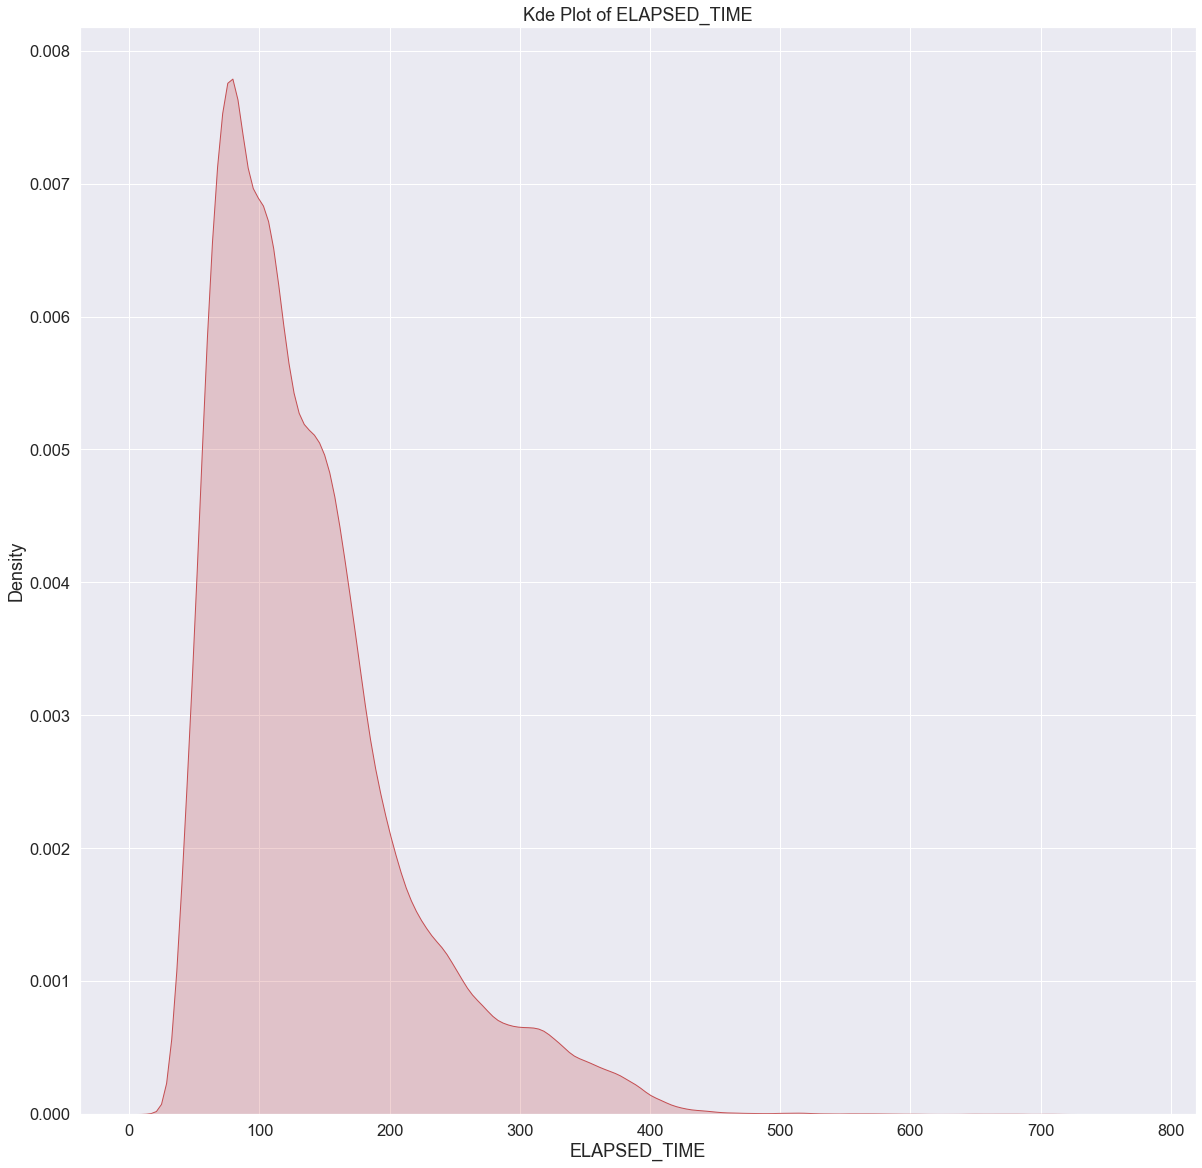

In [95]:
sns.kdeplot(df["ELAPSED_TIME"] , shade=True , color="r")
plt.title("Kde Plot of ELAPSED_TIME")

Text(0.5, 1.0, 'Distribution Plot of AIR_TIME')

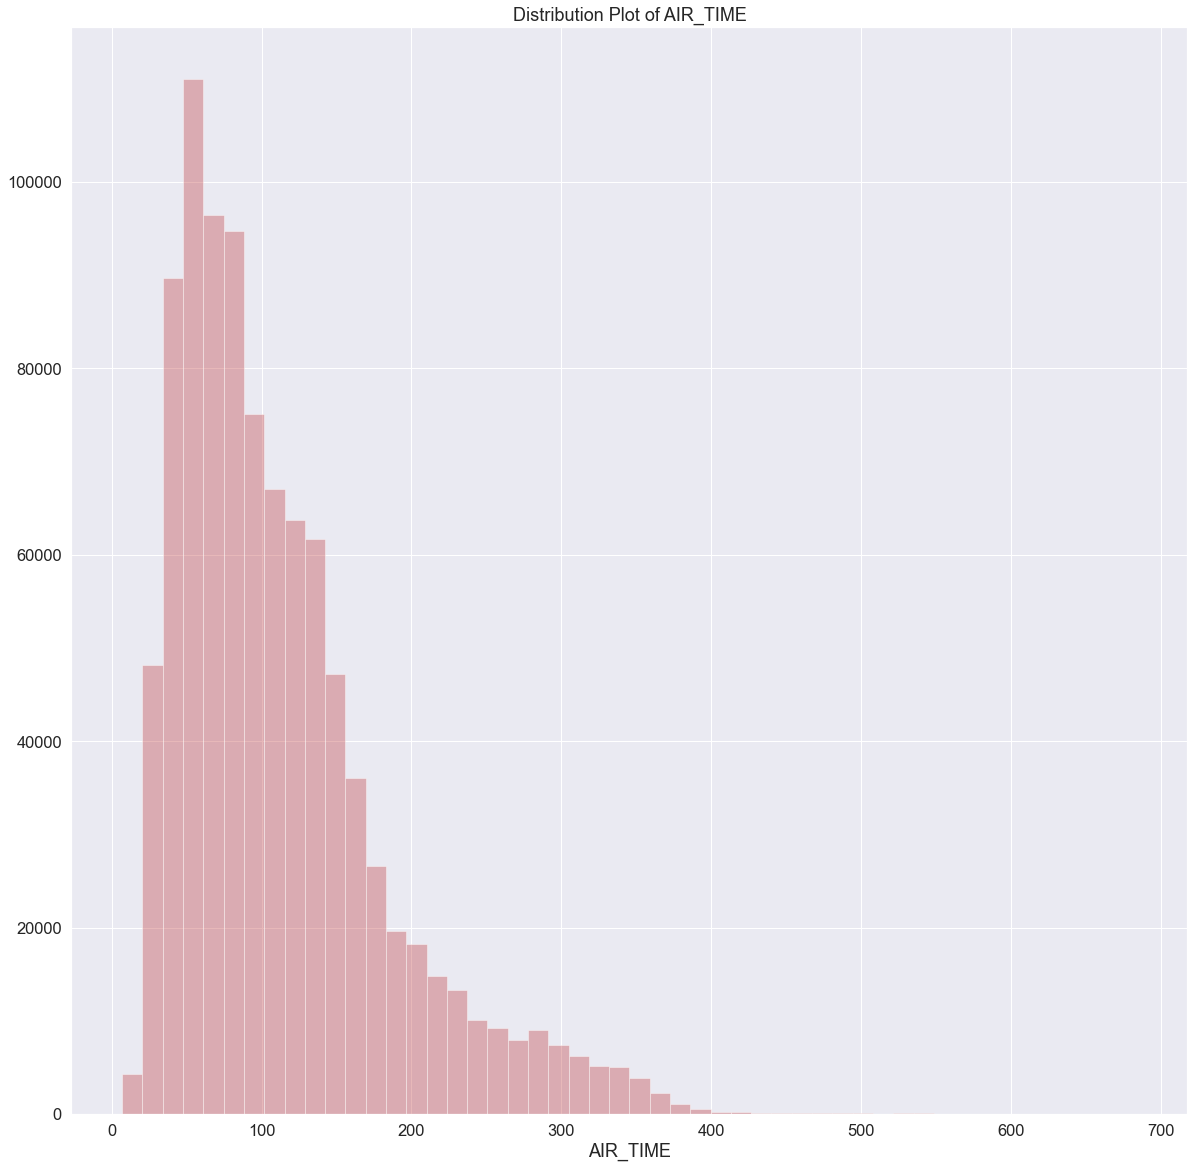

In [96]:
sns.distplot(df["AIR_TIME"] , kde=False , color="r")
plt.title("Distribution Plot of AIR_TIME")

Text(0.5, 1.0, 'Kde Plot of AIR_TIME')

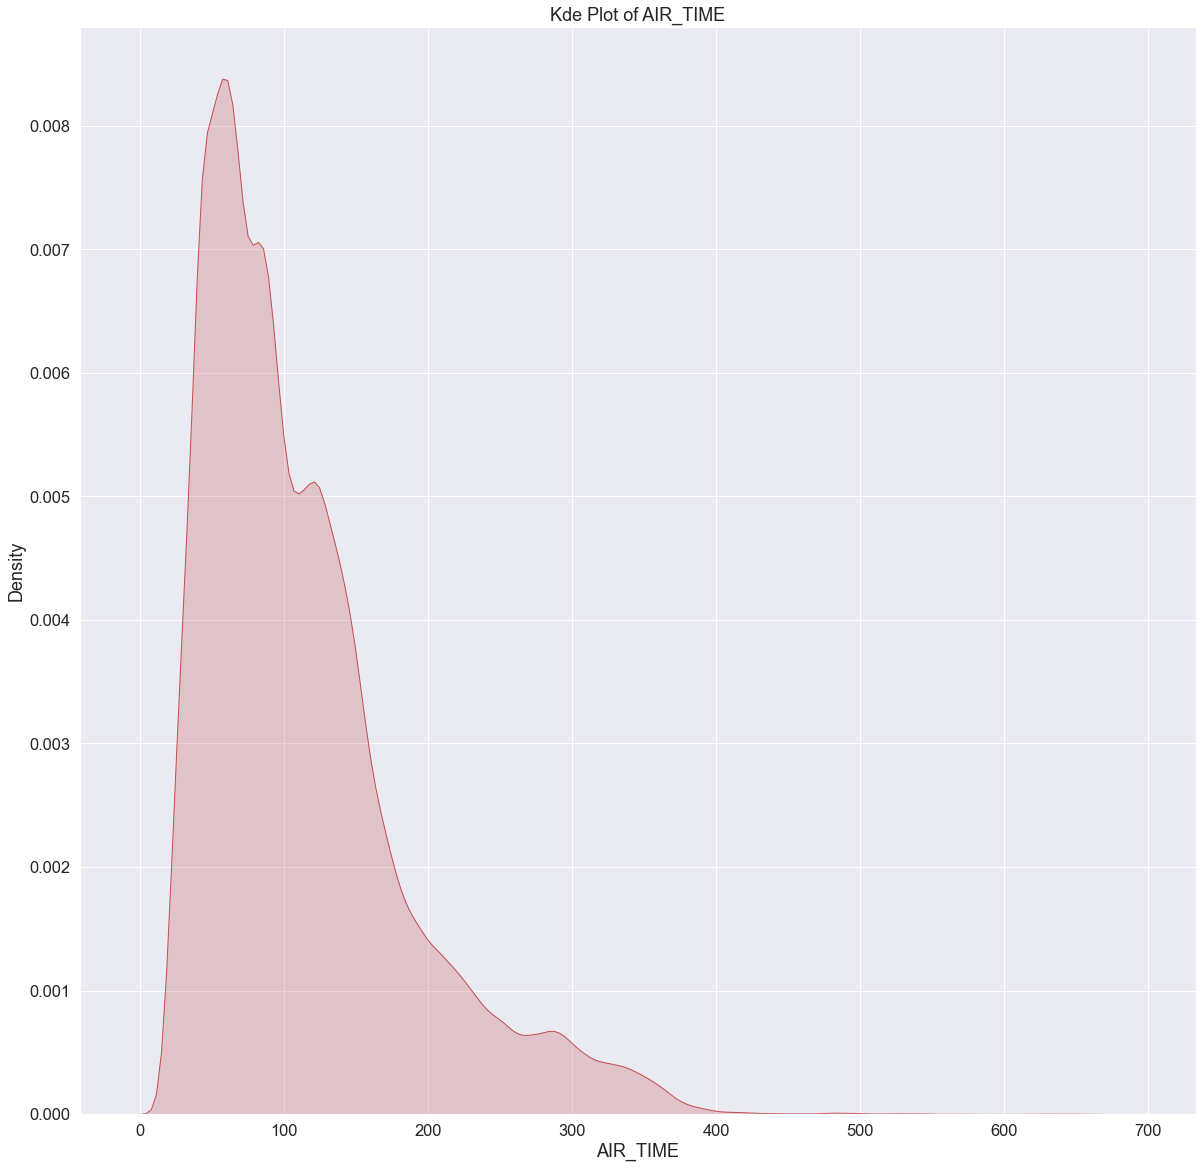

In [97]:
sns.kdeplot(df["AIR_TIME"] , shade=True , color="r")
plt.title("Kde Plot of AIR_TIME")

Text(0.5, 1.0, 'Distribution Plot of ARRIVAL_TIME')

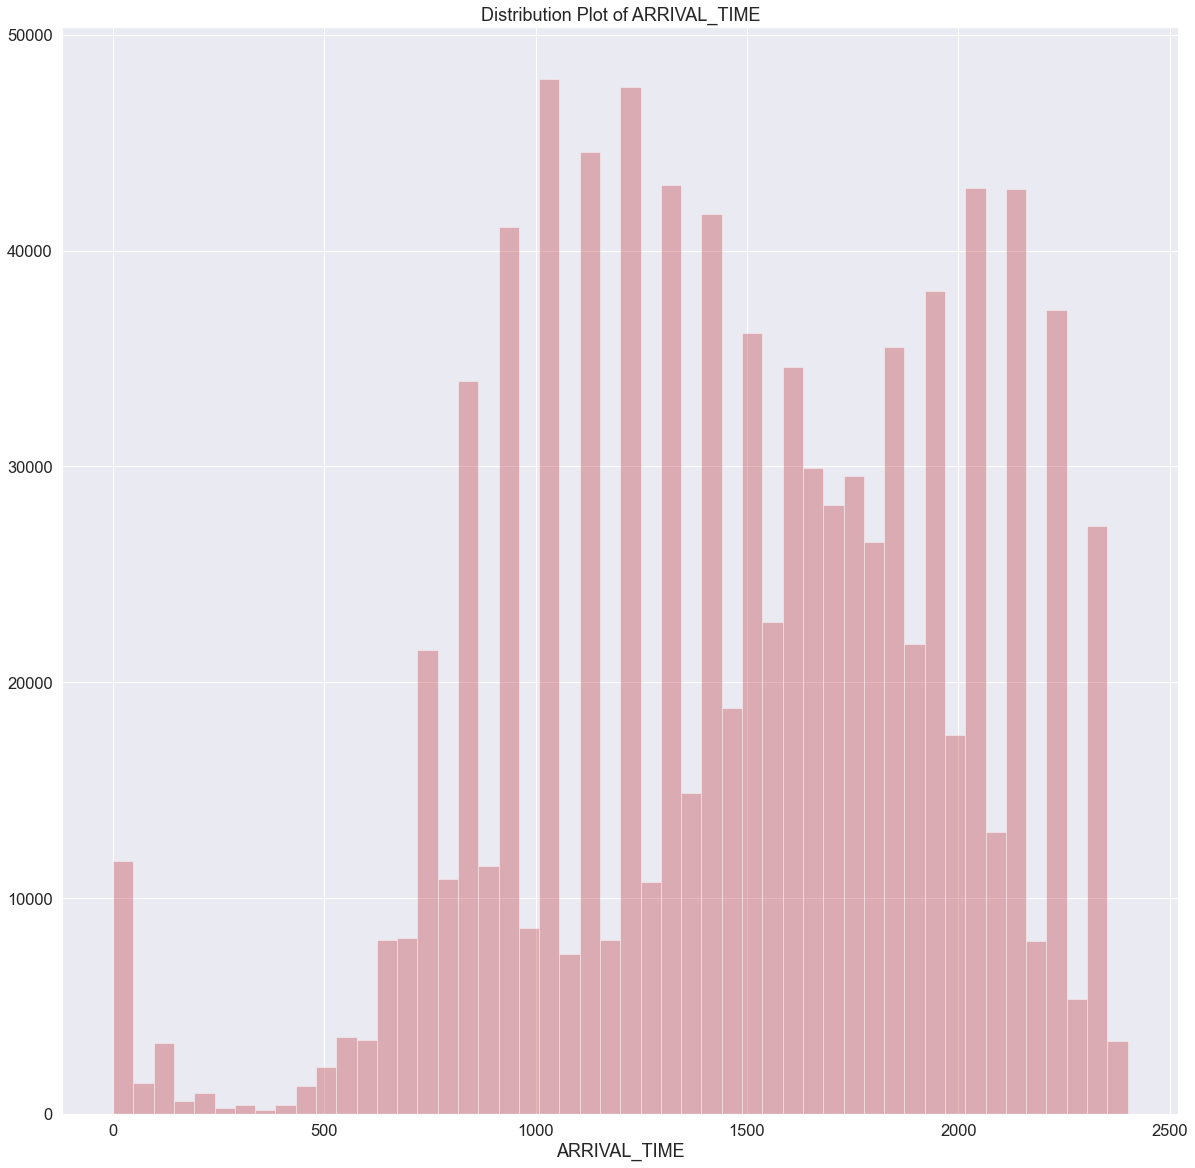

In [98]:
sns.distplot(df["ARRIVAL_TIME"] , kde=False , color="r")
plt.title("Distribution Plot of ARRIVAL_TIME")

Text(0.5, 1.0, 'Kde Plot of ARRIVAL_TIME')

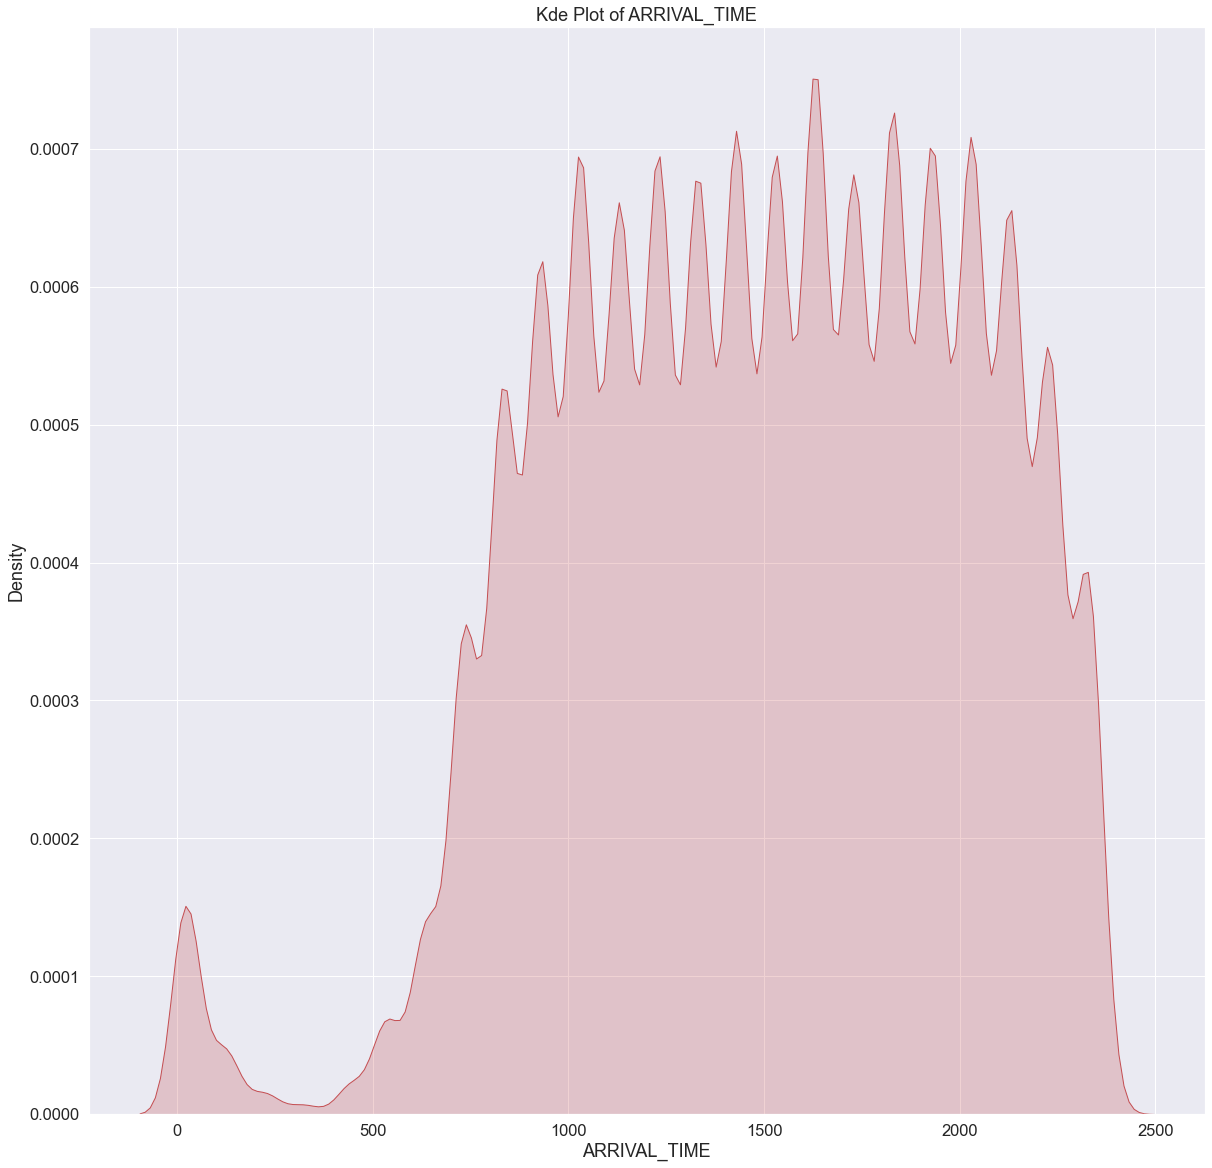

In [99]:
sns.kdeplot(df["ARRIVAL_TIME"] , shade=True , color="r")
plt.title("Kde Plot of ARRIVAL_TIME")

Text(0.5, 1.0, 'Distribution Plot of ARRIVAL_DELAY')

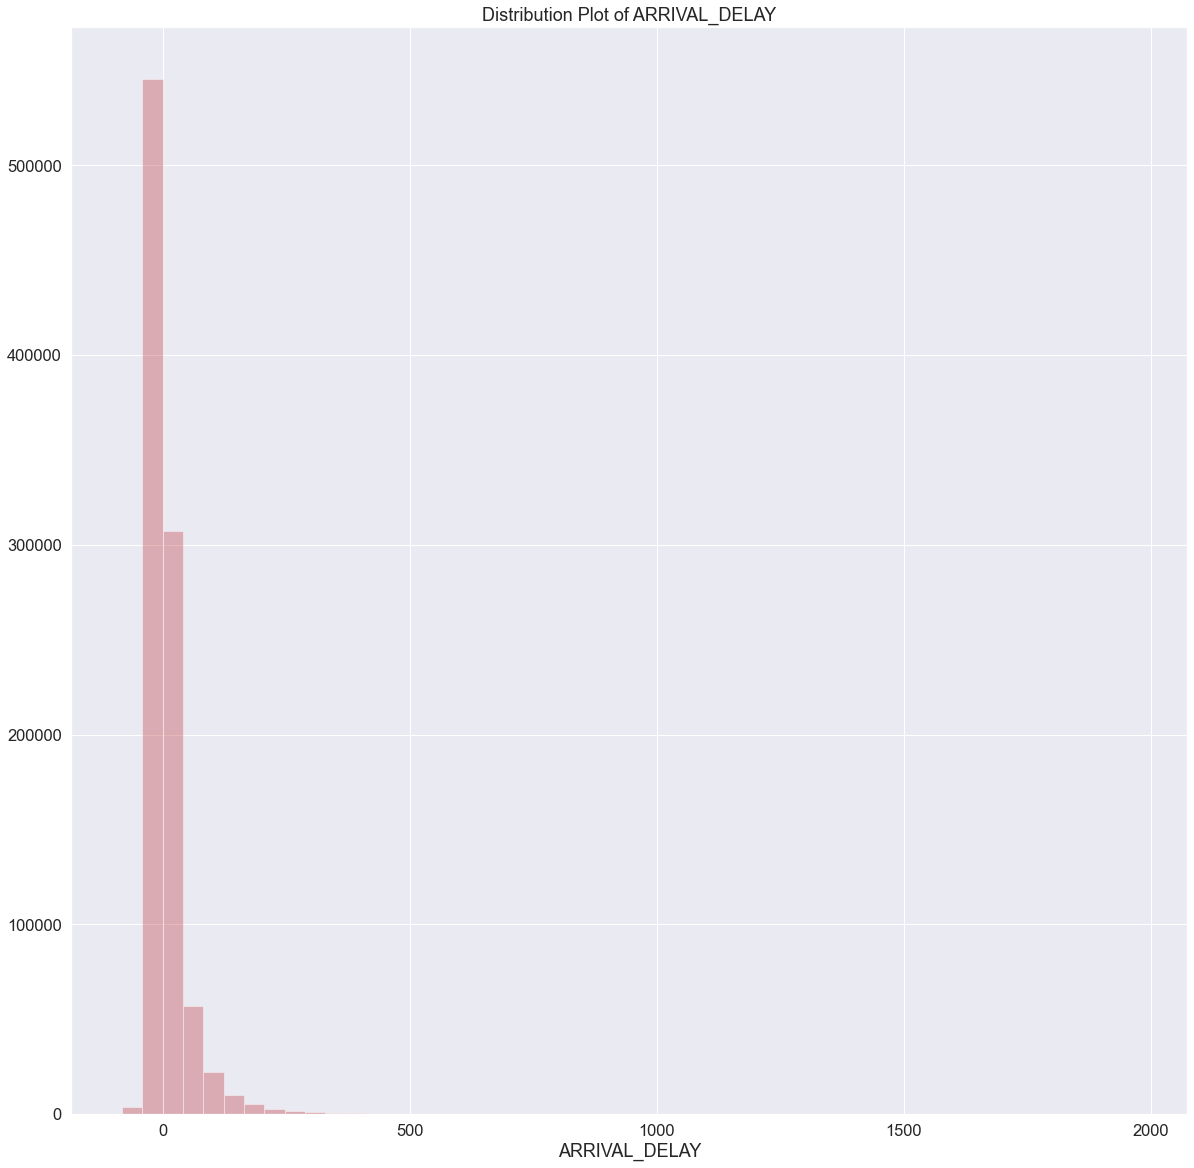

In [100]:
sns.distplot(df["ARRIVAL_DELAY"] , kde=False , color="r")
plt.title("Distribution Plot of ARRIVAL_DELAY")

Text(0.5, 1.0, 'Kde Plot of ARRIVAL_DELAY')

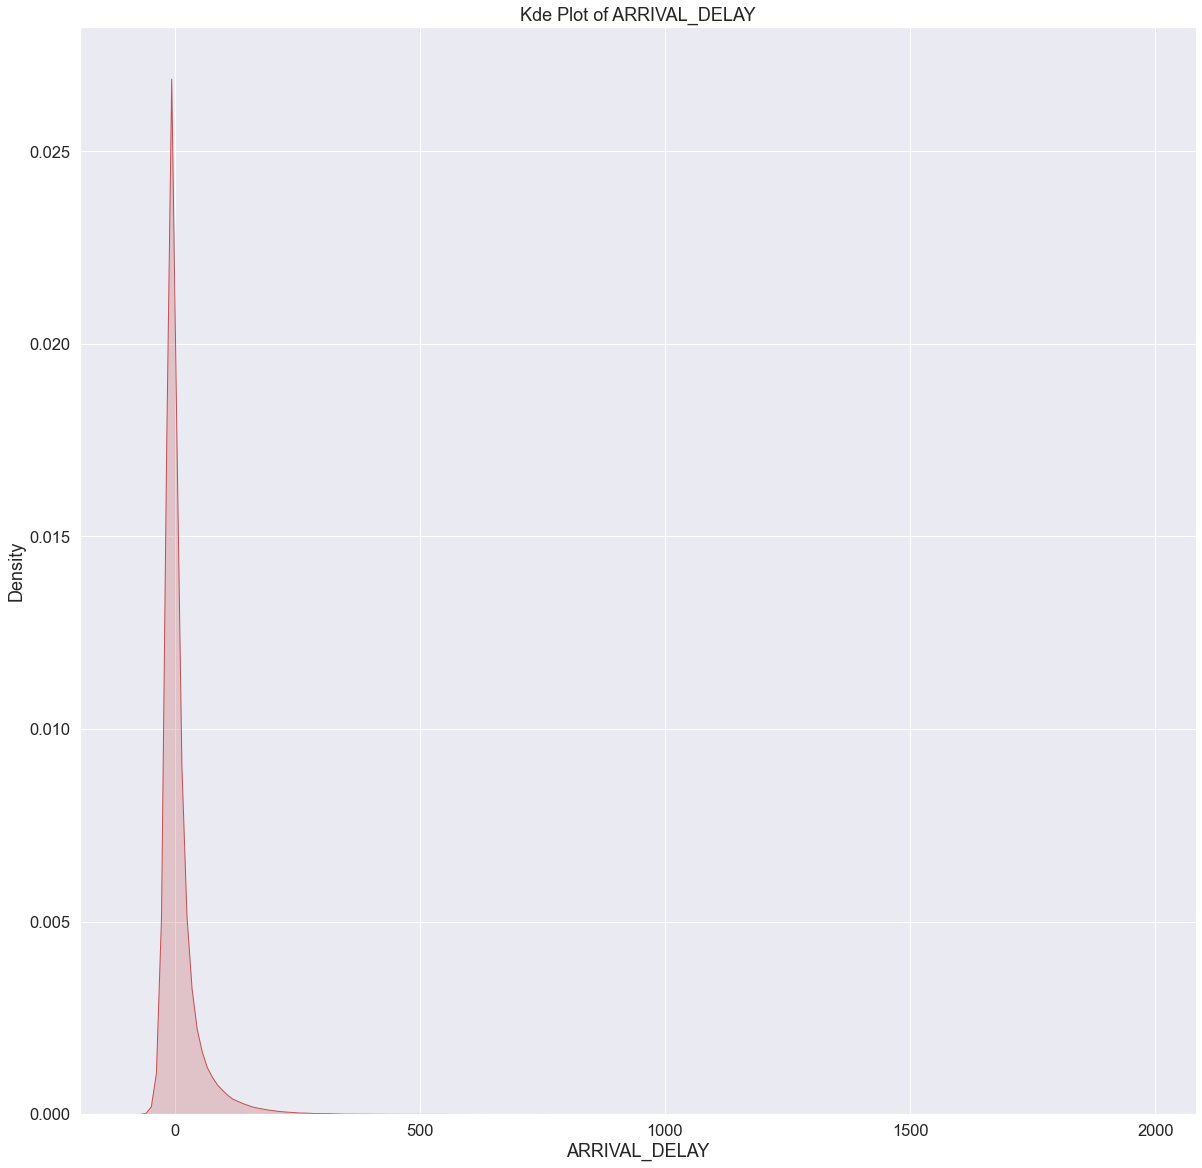

In [101]:
sns.kdeplot(df["ARRIVAL_DELAY"] , shade=True , color="r")
plt.title("Kde Plot of ARRIVAL_DELAY")

Text(0.5, 1.0, 'Distribution Plot of AIR_SYSTEM_DELAY')

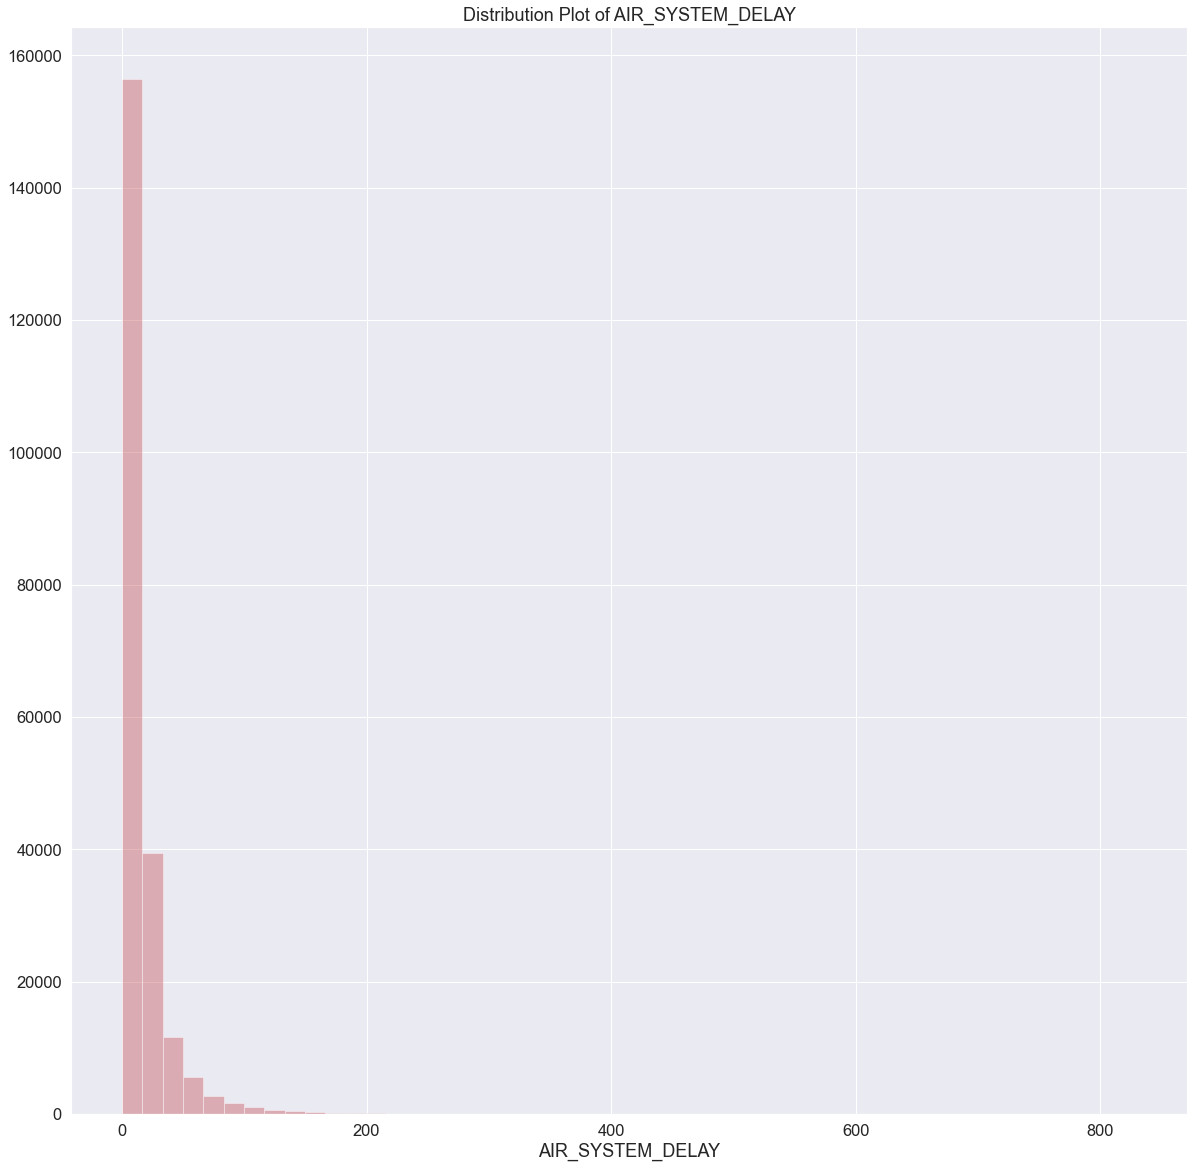

In [102]:
sns.distplot(df["AIR_SYSTEM_DELAY"] , kde=False , color="r")
plt.title("Distribution Plot of AIR_SYSTEM_DELAY")

Text(0.5, 1.0, 'Kde Plot of AIR_SYSTEM_DELAY')

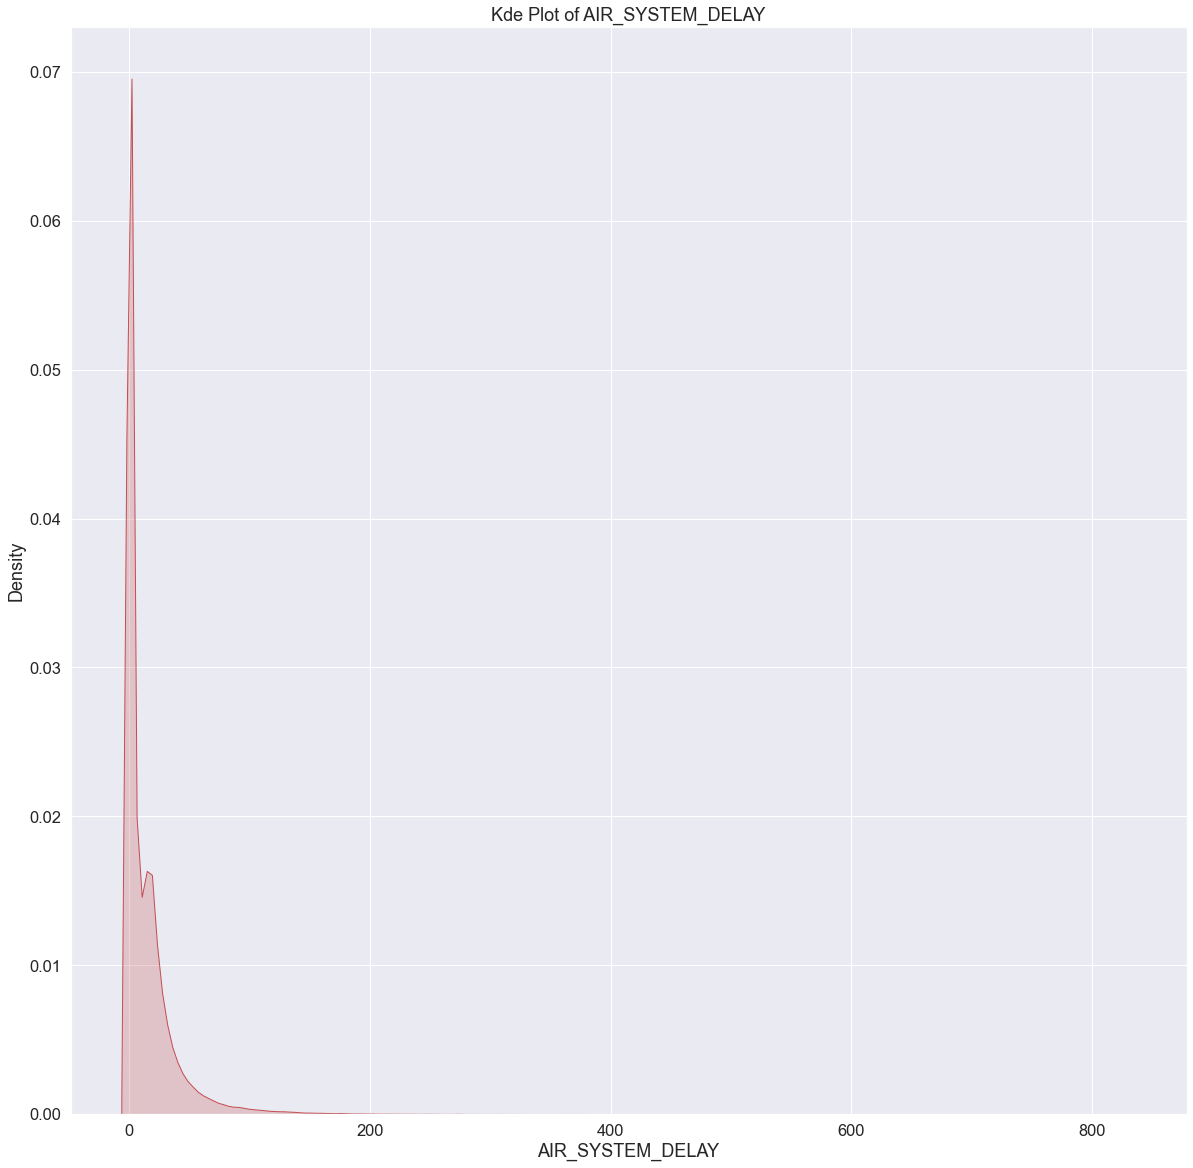

In [103]:
sns.kdeplot(df["AIR_SYSTEM_DELAY"] , shade=True , color="r")
plt.title("Kde Plot of AIR_SYSTEM_DELAY")

Text(0.5, 1.0, 'Distribution Plot of SECURITY_DELAY')

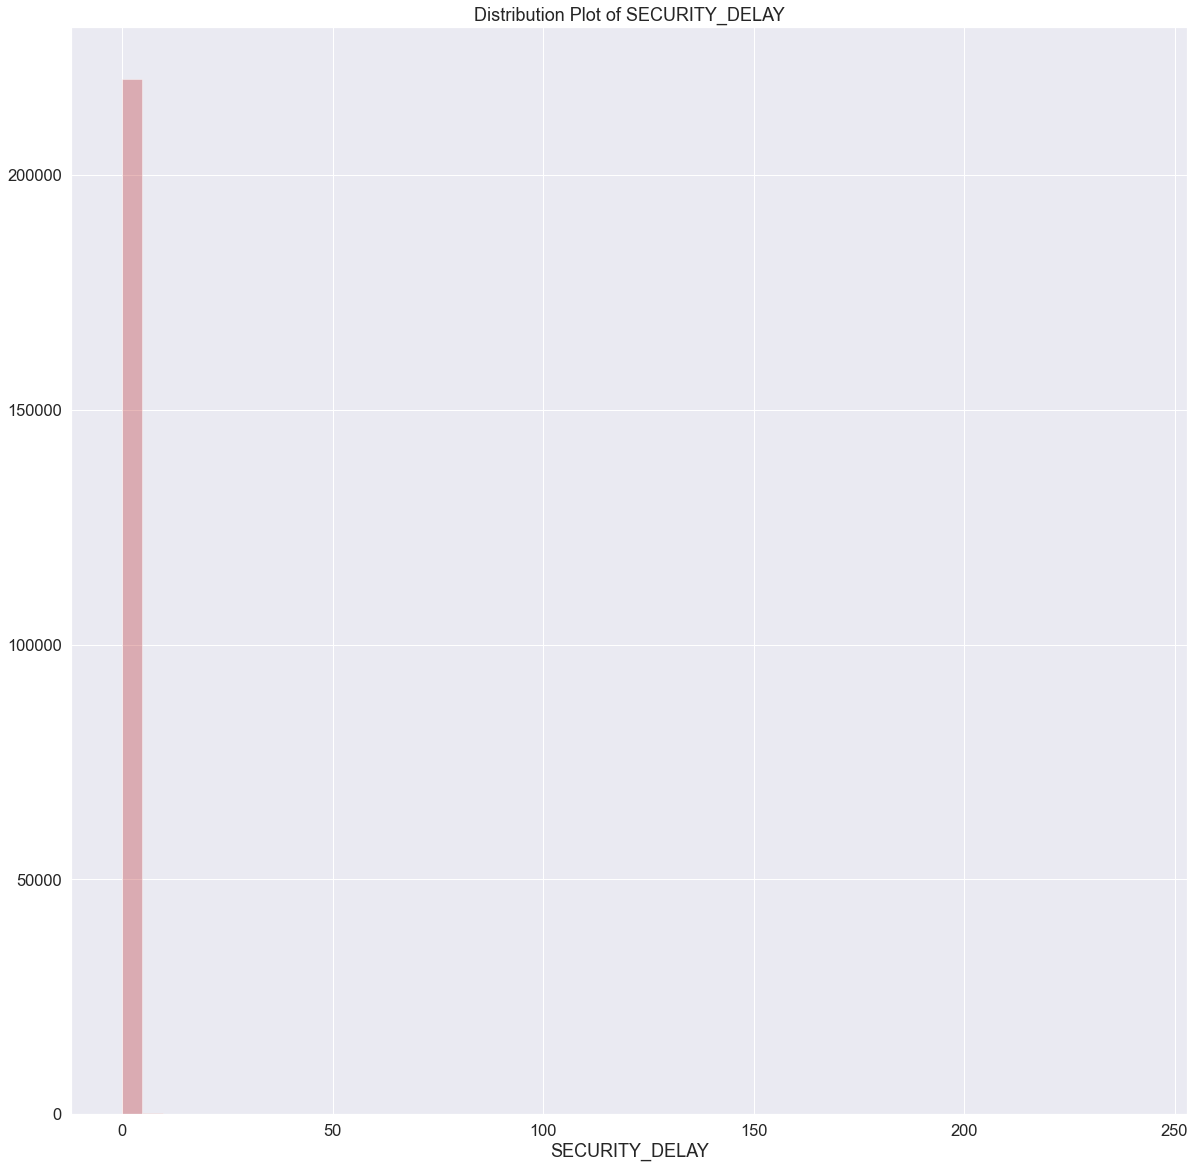

In [104]:
sns.distplot(df["SECURITY_DELAY"] , kde=False , color="r")
plt.title("Distribution Plot of SECURITY_DELAY")

Text(0.5, 1.0, 'Kde Plot of SECURITY_DELAY')

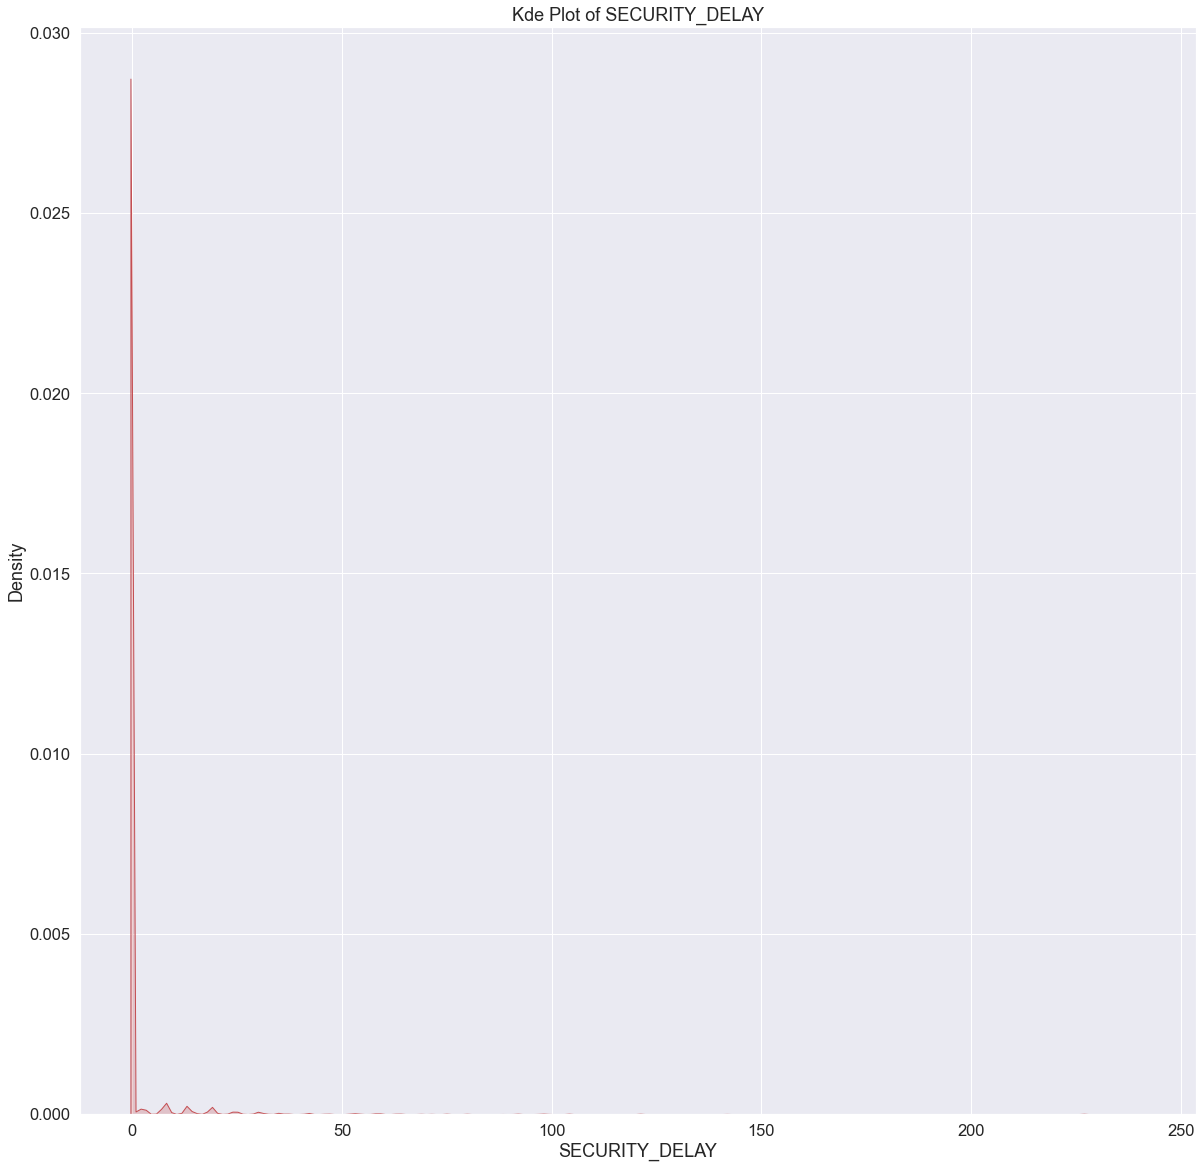

In [105]:
sns.kdeplot(df["SECURITY_DELAY"] , shade=True , color="r")
plt.title("Kde Plot of SECURITY_DELAY")

Text(0.5, 1.0, 'Distribution Plot of AIRLINE_DELAY')

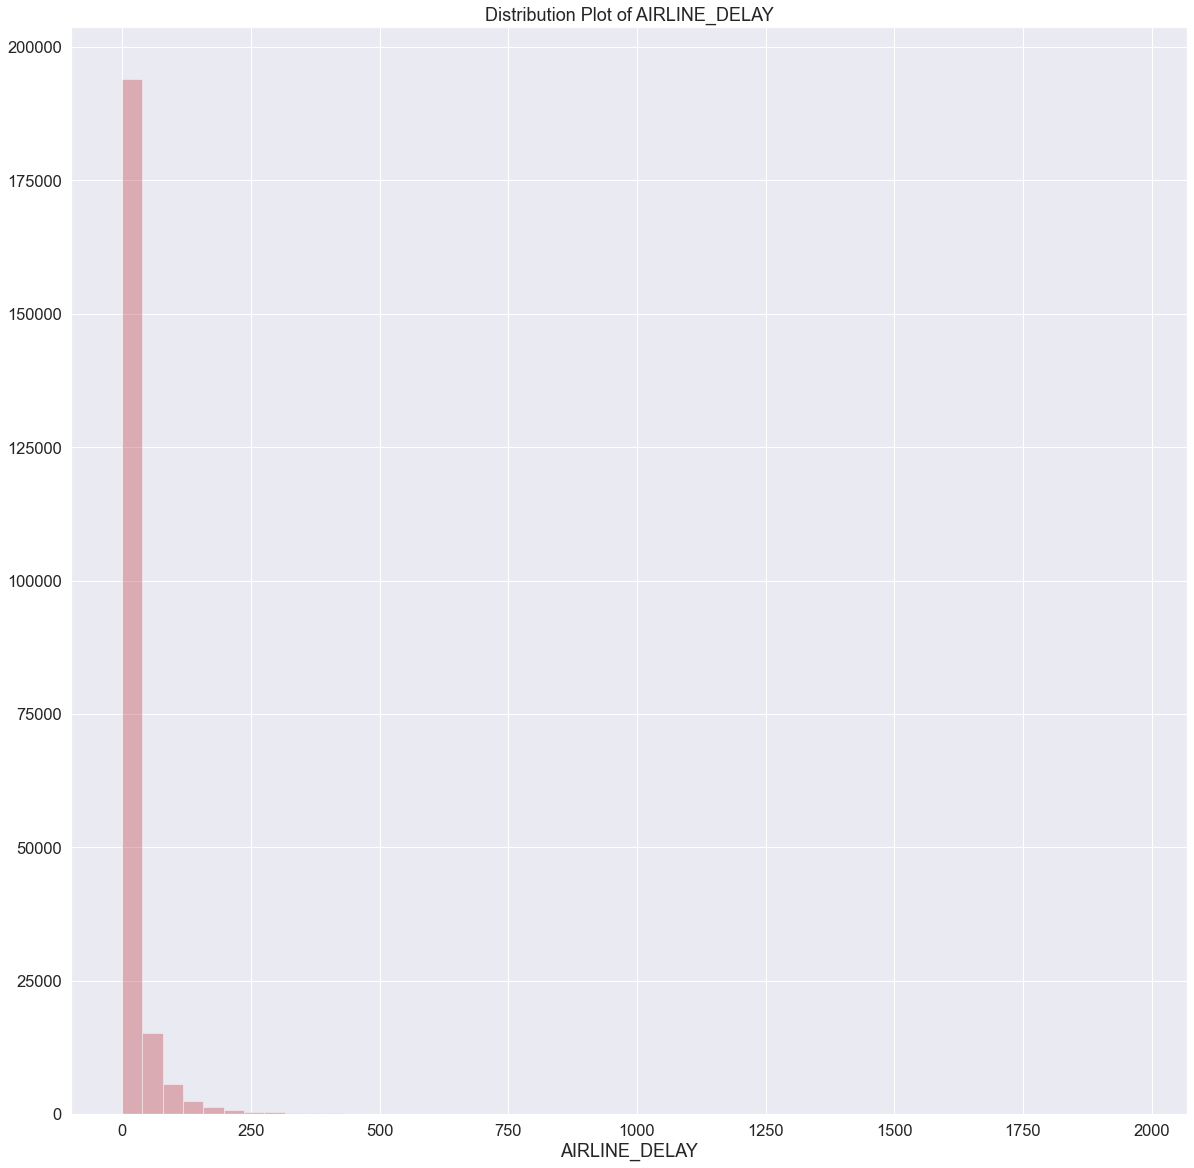

In [106]:
sns.distplot(df["AIRLINE_DELAY"] , kde=False , color="r")
plt.title("Distribution Plot of AIRLINE_DELAY")

Text(0.5, 1.0, 'Kde Plot of AIRLINE_DELAY')

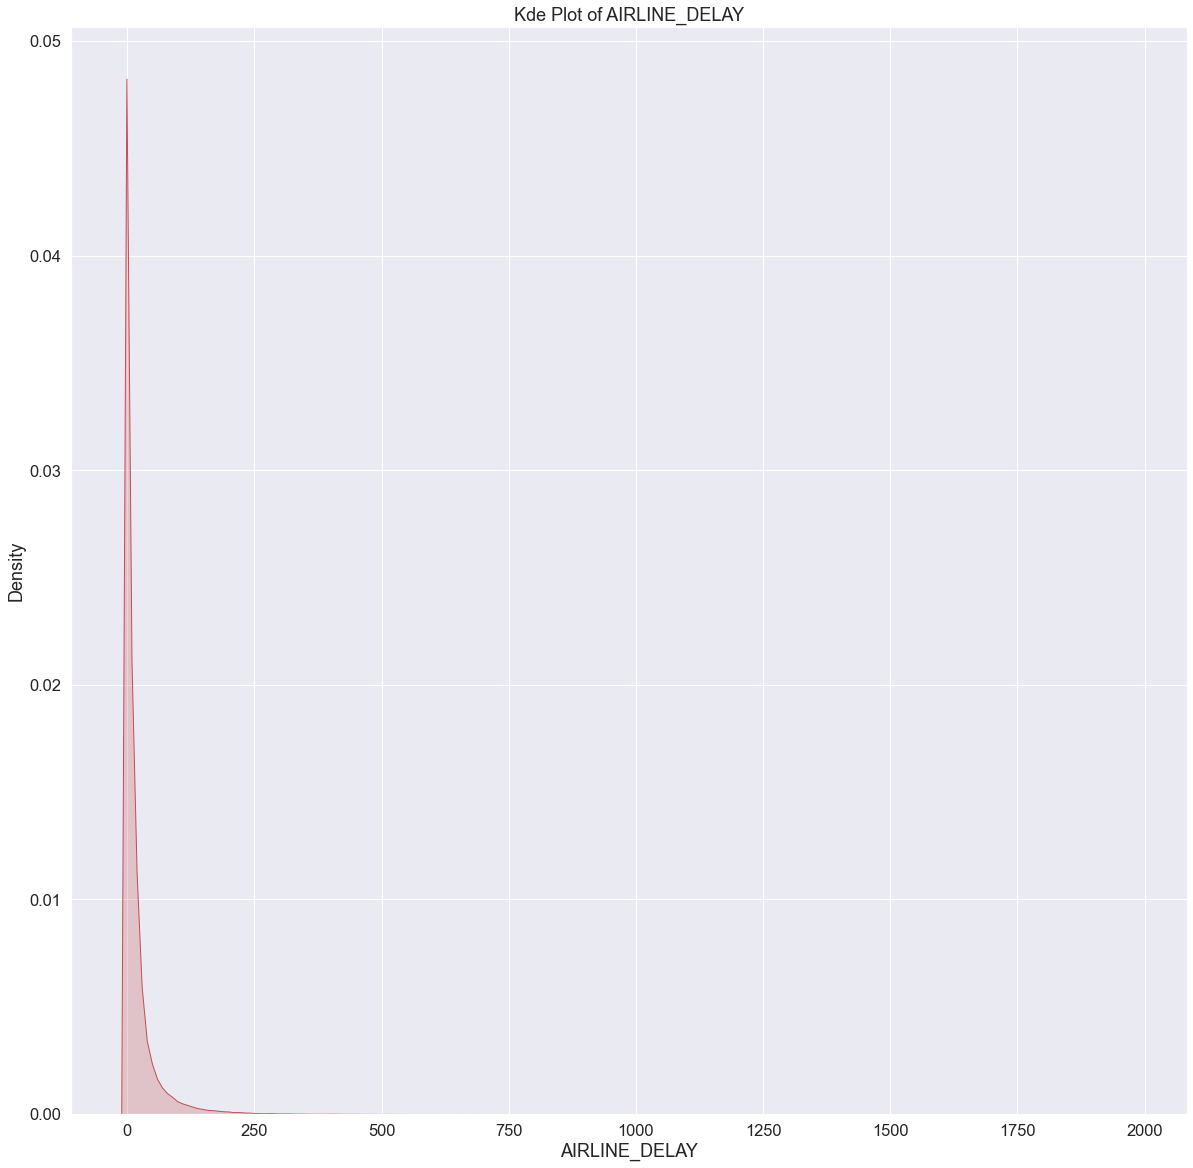

In [107]:
sns.kdeplot(df["AIRLINE_DELAY"] , shade=True , color="r")
plt.title("Kde Plot of AIRLINE_DELAY")

Text(0.5, 1.0, 'Distribution Plot of LATE_AIRCRAFT_DELAY')

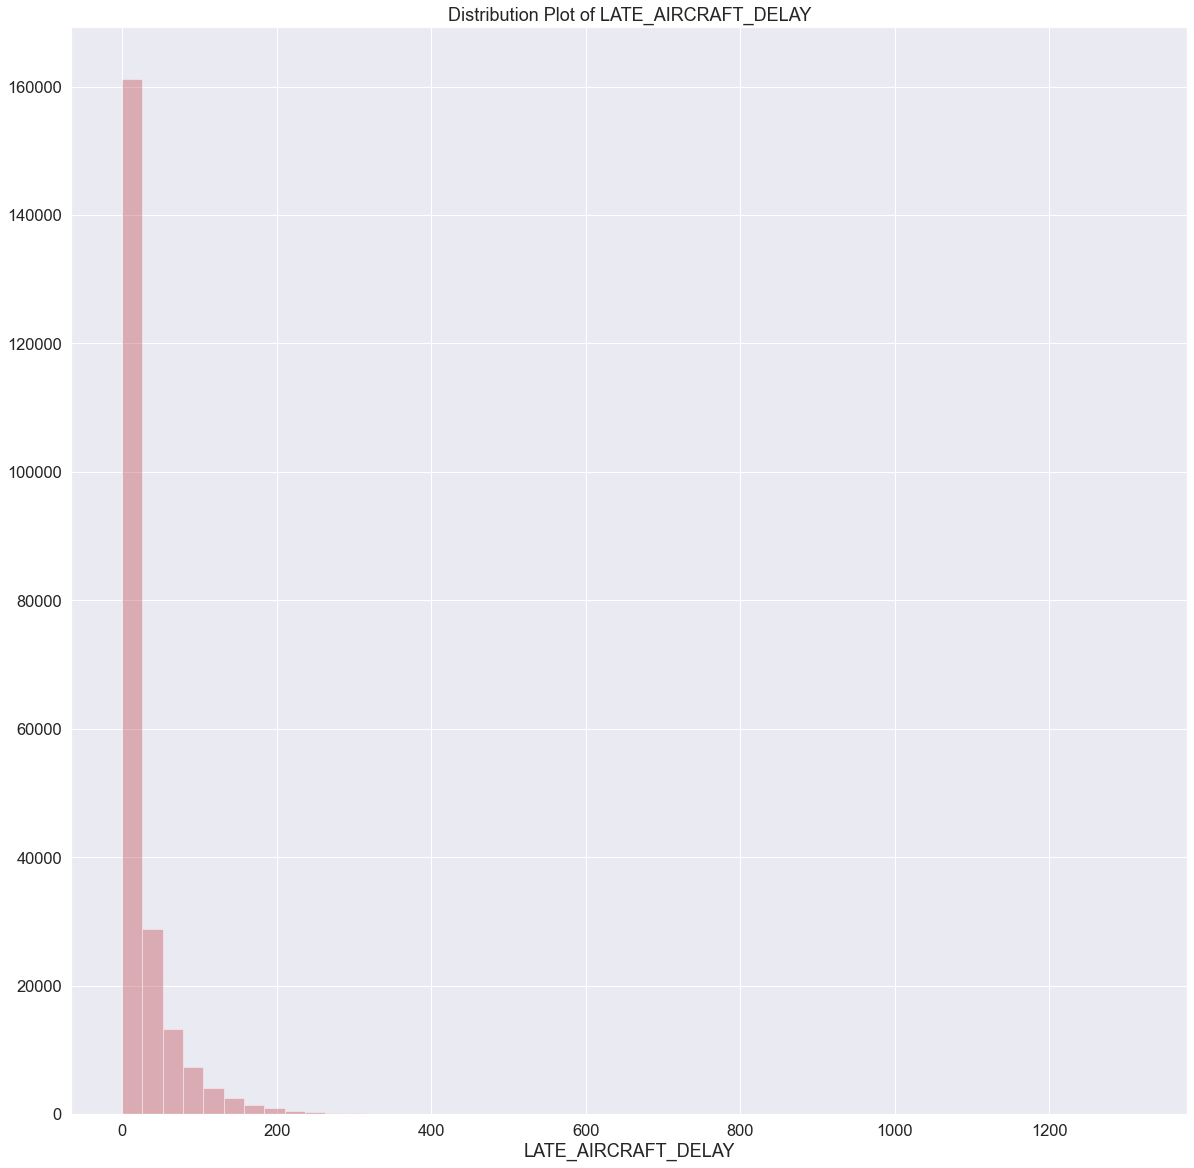

In [108]:
sns.distplot(df["LATE_AIRCRAFT_DELAY"] , kde=False , color="r")
plt.title("Distribution Plot of LATE_AIRCRAFT_DELAY")

Text(0.5, 1.0, 'Kde Plot of LATE_AIRCRAFT_DELAY')

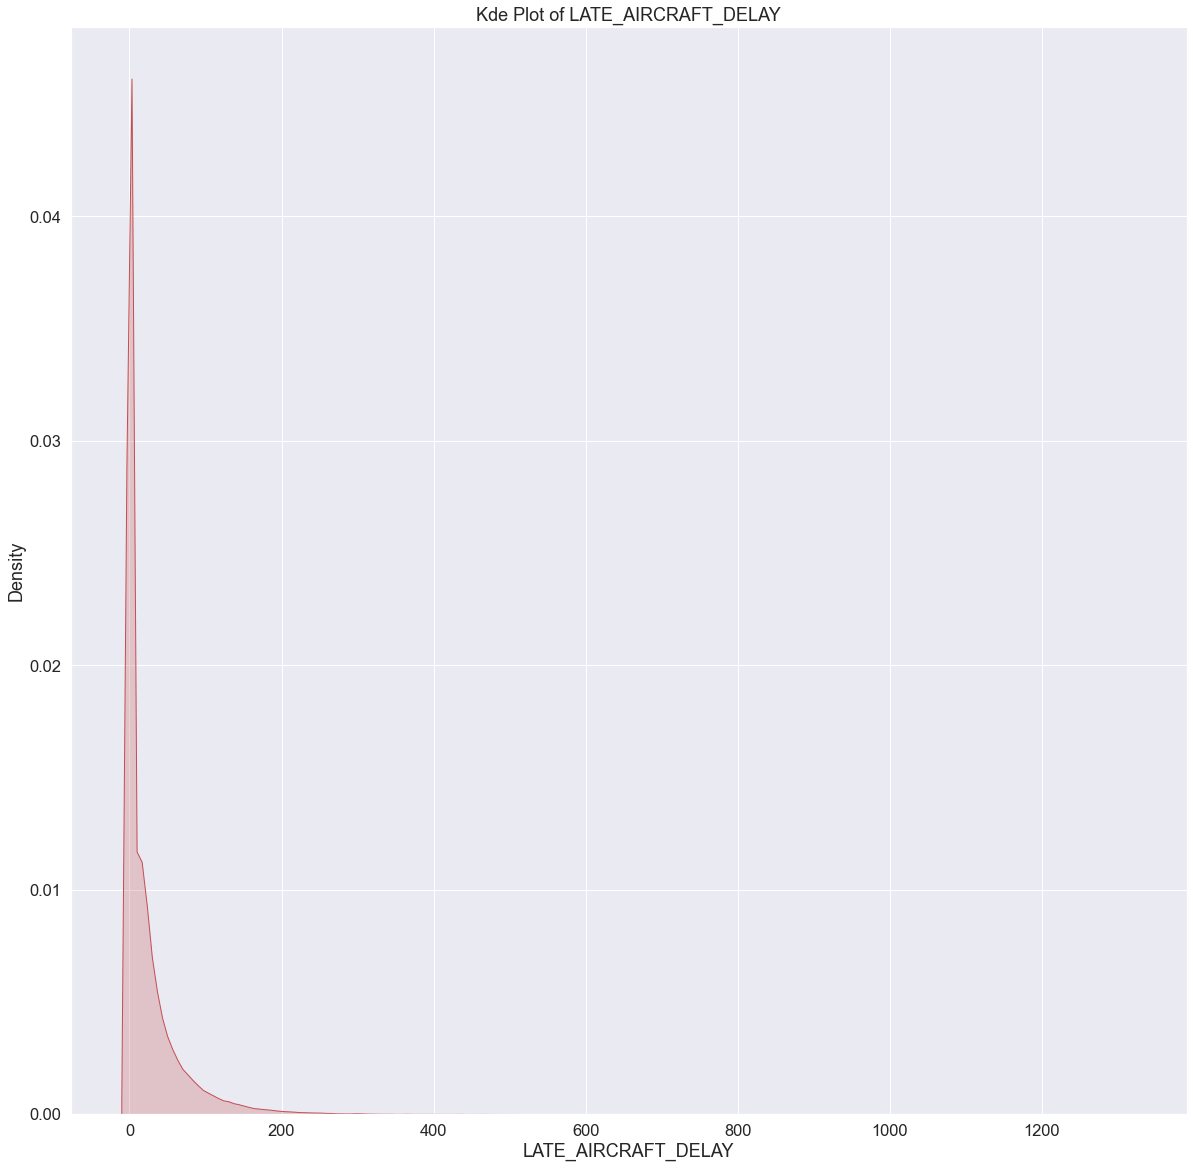

In [109]:
sns.kdeplot(df["LATE_AIRCRAFT_DELAY"] , shade=True , color="r")
plt.title("Kde Plot of LATE_AIRCRAFT_DELAY")

Text(0.5, 1.0, 'Distribution Plot of WEATHER_DELAY')

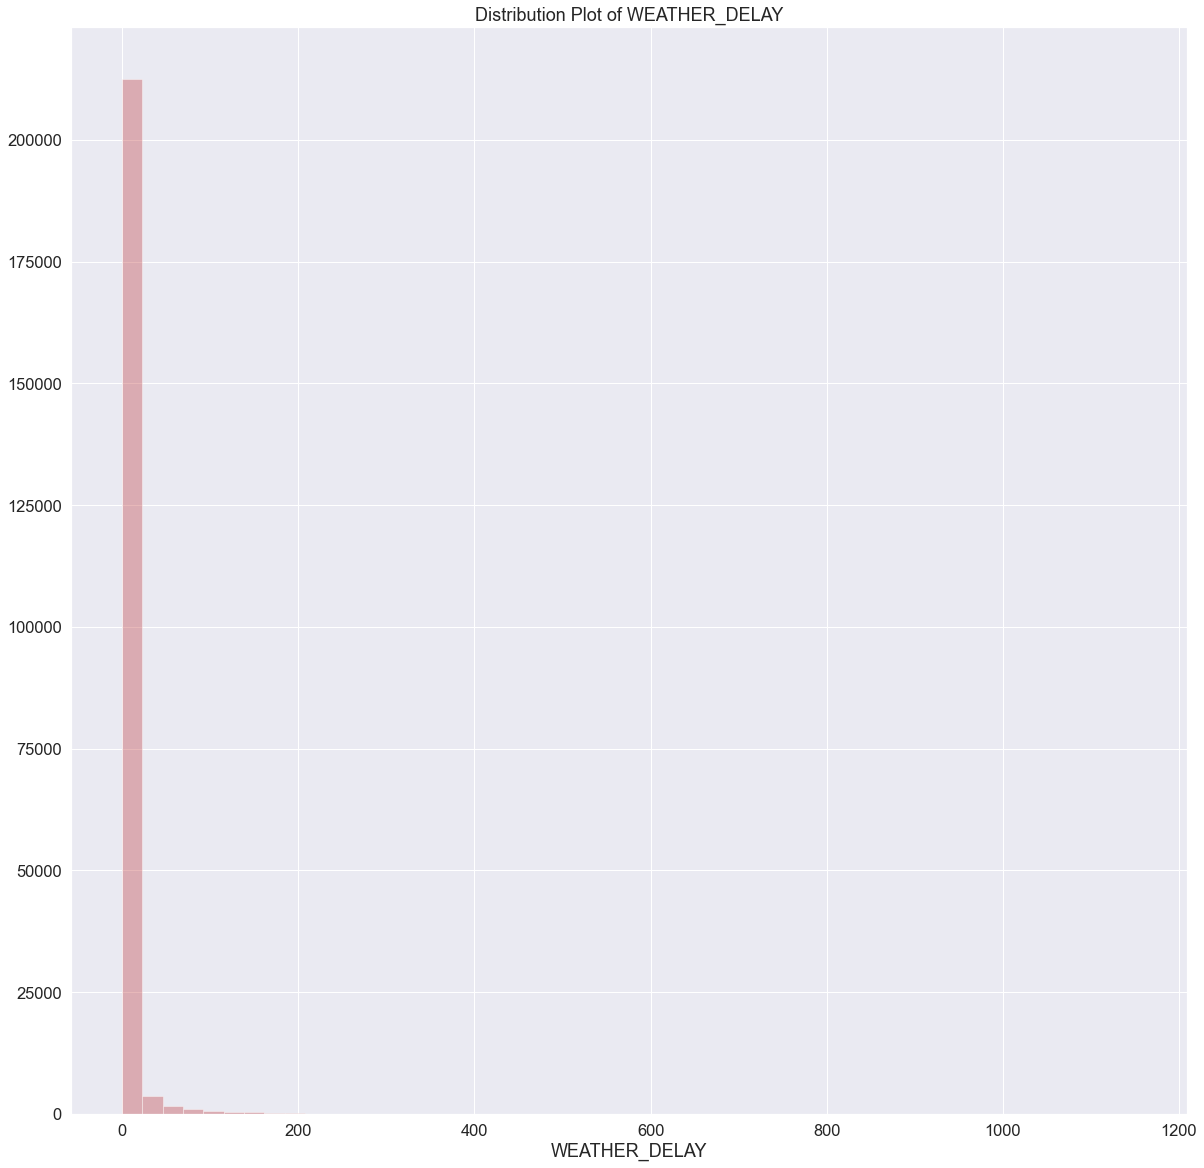

In [110]:
sns.distplot(df["WEATHER_DELAY"] , kde=False , color="r")
plt.title("Distribution Plot of WEATHER_DELAY")

Text(0.5, 1.0, 'Kde Plot of WEATHER_DELAY')

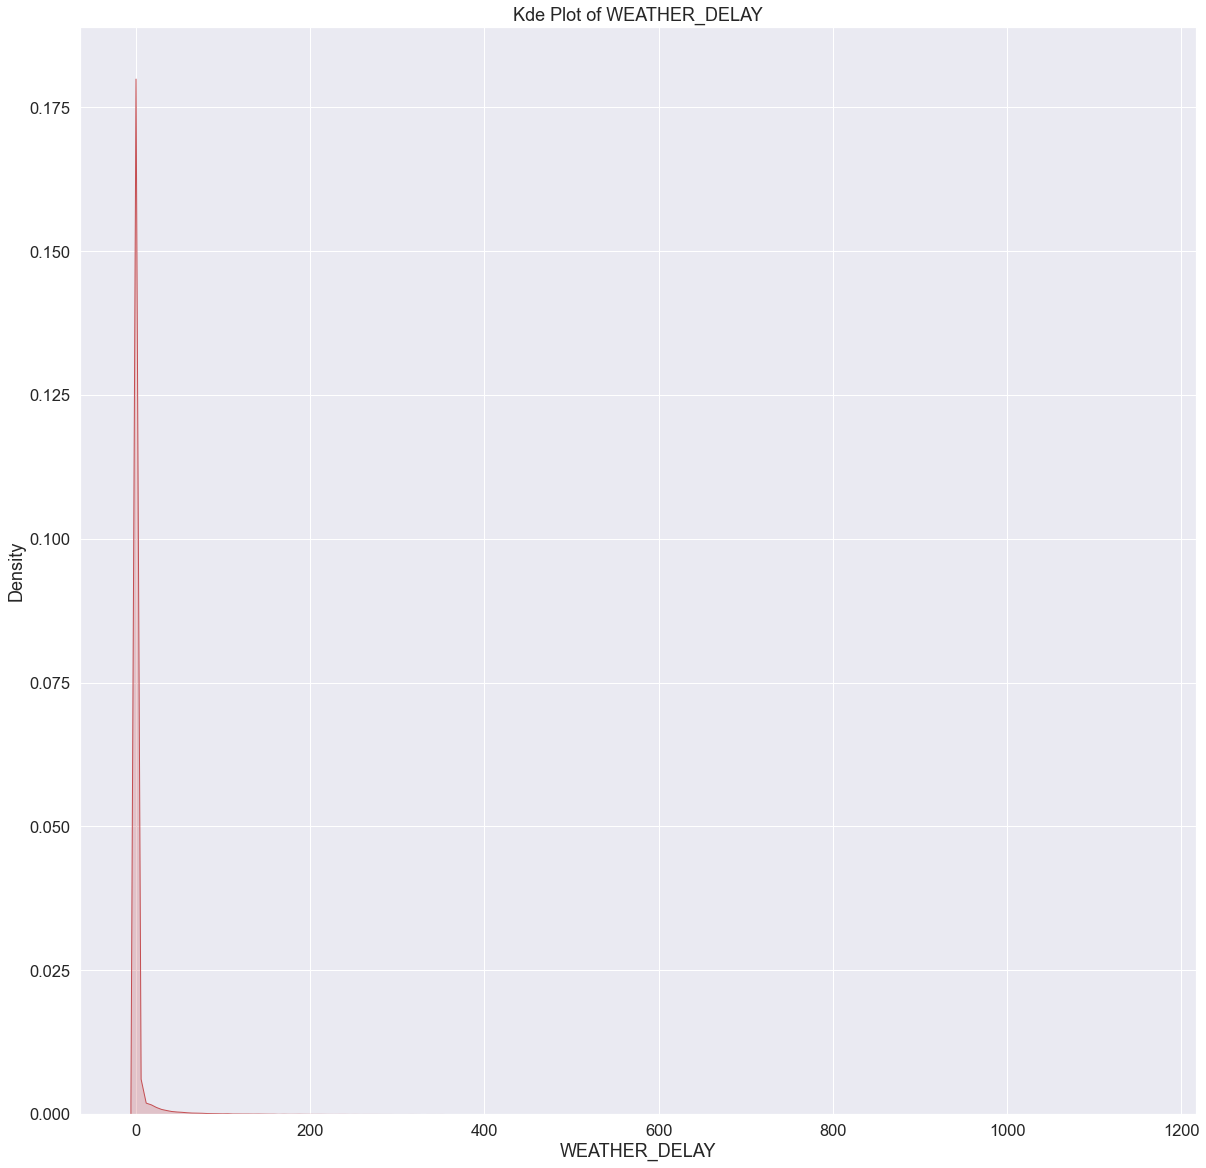

In [111]:
sns.kdeplot(df["WEATHER_DELAY"] , shade=True , color="r")
plt.title("Kde Plot of WEATHER_DELAY")

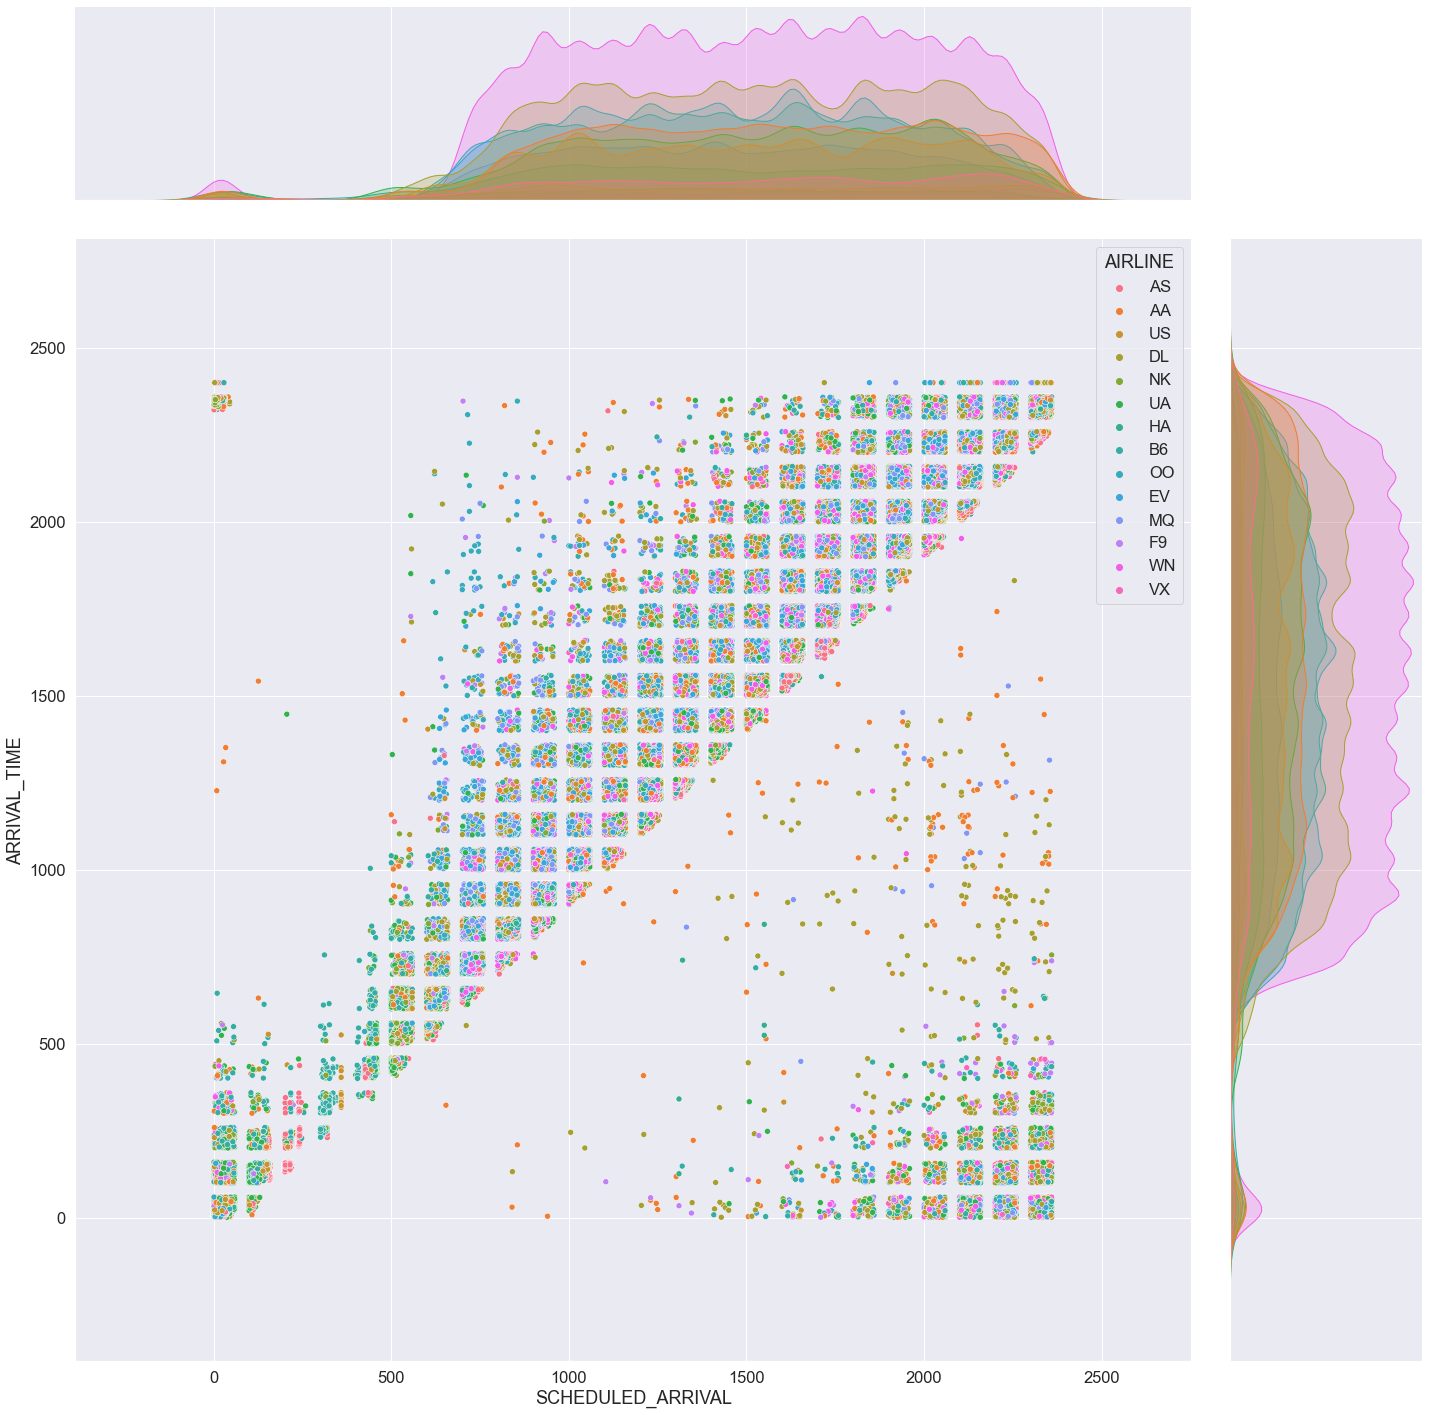

In [112]:
#Jointplot of 'SCHEDULED_ARRIVAL' and 'ARRIVAL_TIME'
sns.jointplot(data=df, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME" , height=20 , hue="AIRLINE")

In [113]:
df.head(2)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                  NaN               NaN   
1           -9.0         0          0                  NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             NaN            NaN                  NaN            NaN  
1             NaN            NaN                  NaN            NaN  

[2 rows x 31 columns]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

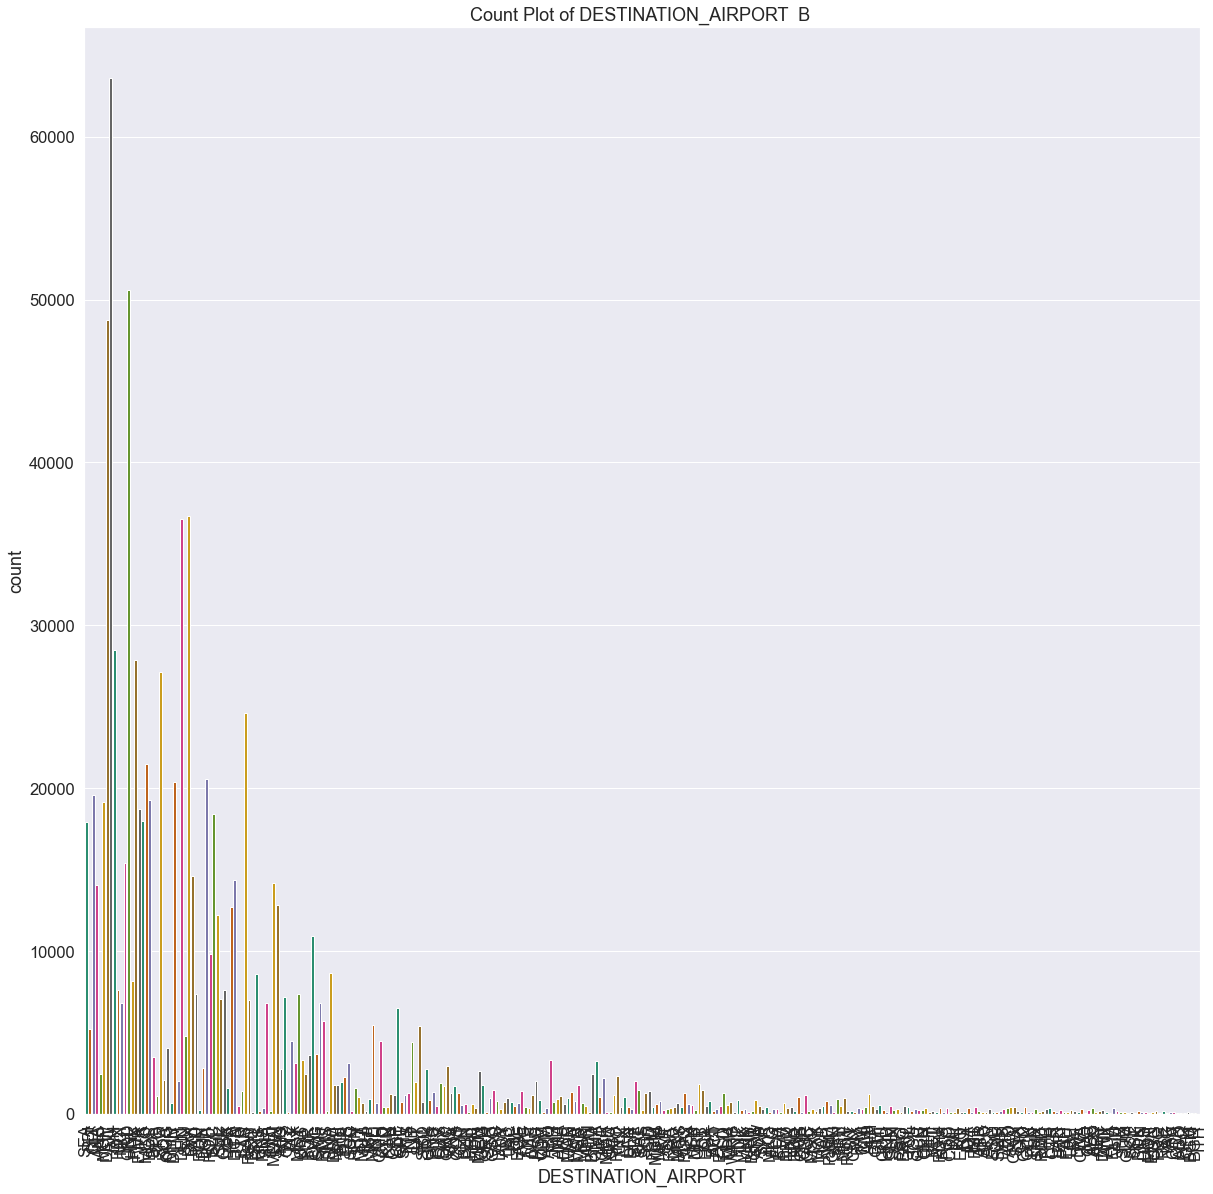

In [114]:
sns.countplot( x = "DESTINATION_AIRPORT"  , data = df  , palette="Dark2")
plt.title("Count Plot of DESTINATION_AIRPORT  B ")
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Count Plot of AIRLINE')

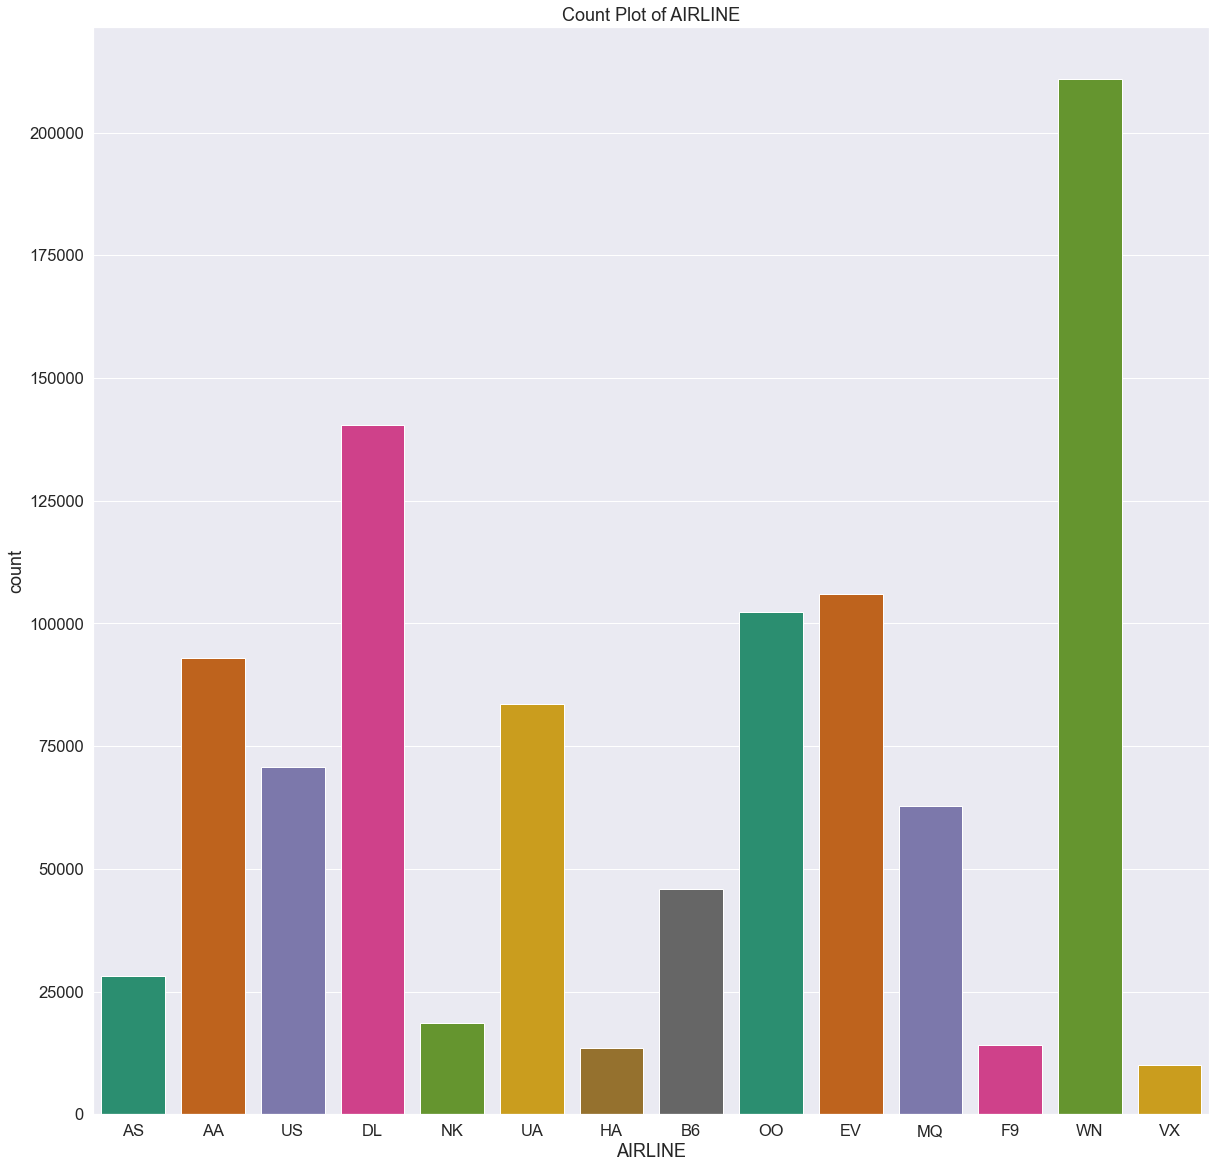

In [115]:
sns.countplot( x = "AIRLINE"  , data = df  , palette="Dark2")
plt.title("Count Plot of AIRLINE")


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

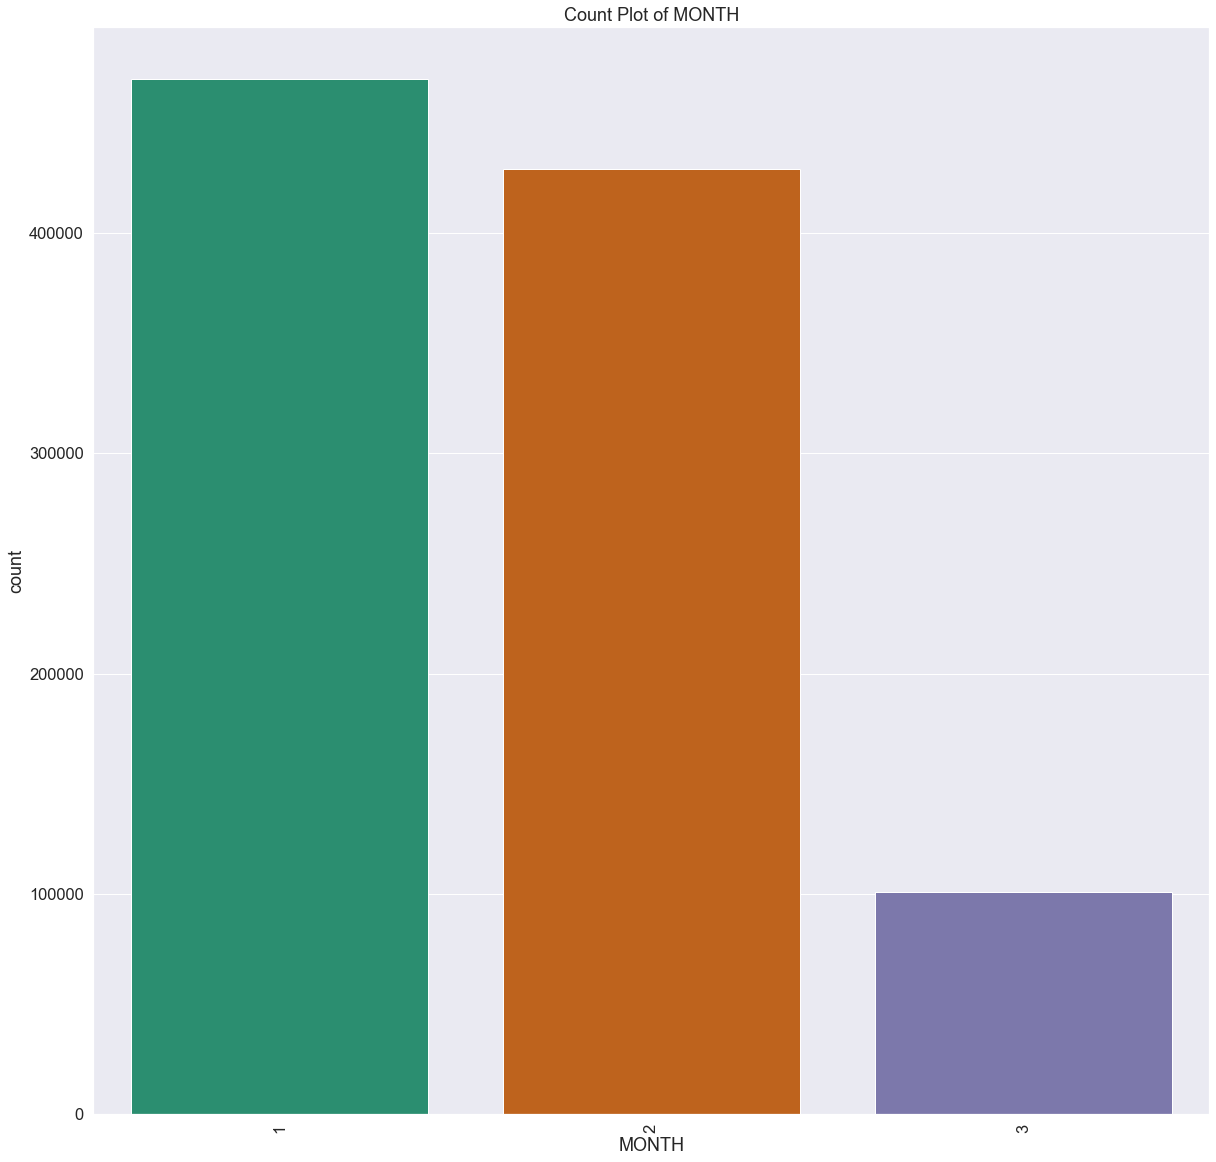

In [116]:
sns.countplot( x = "MONTH"  , data = df  , palette="Dark2")
plt.title("Count Plot of MONTH")
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31')])

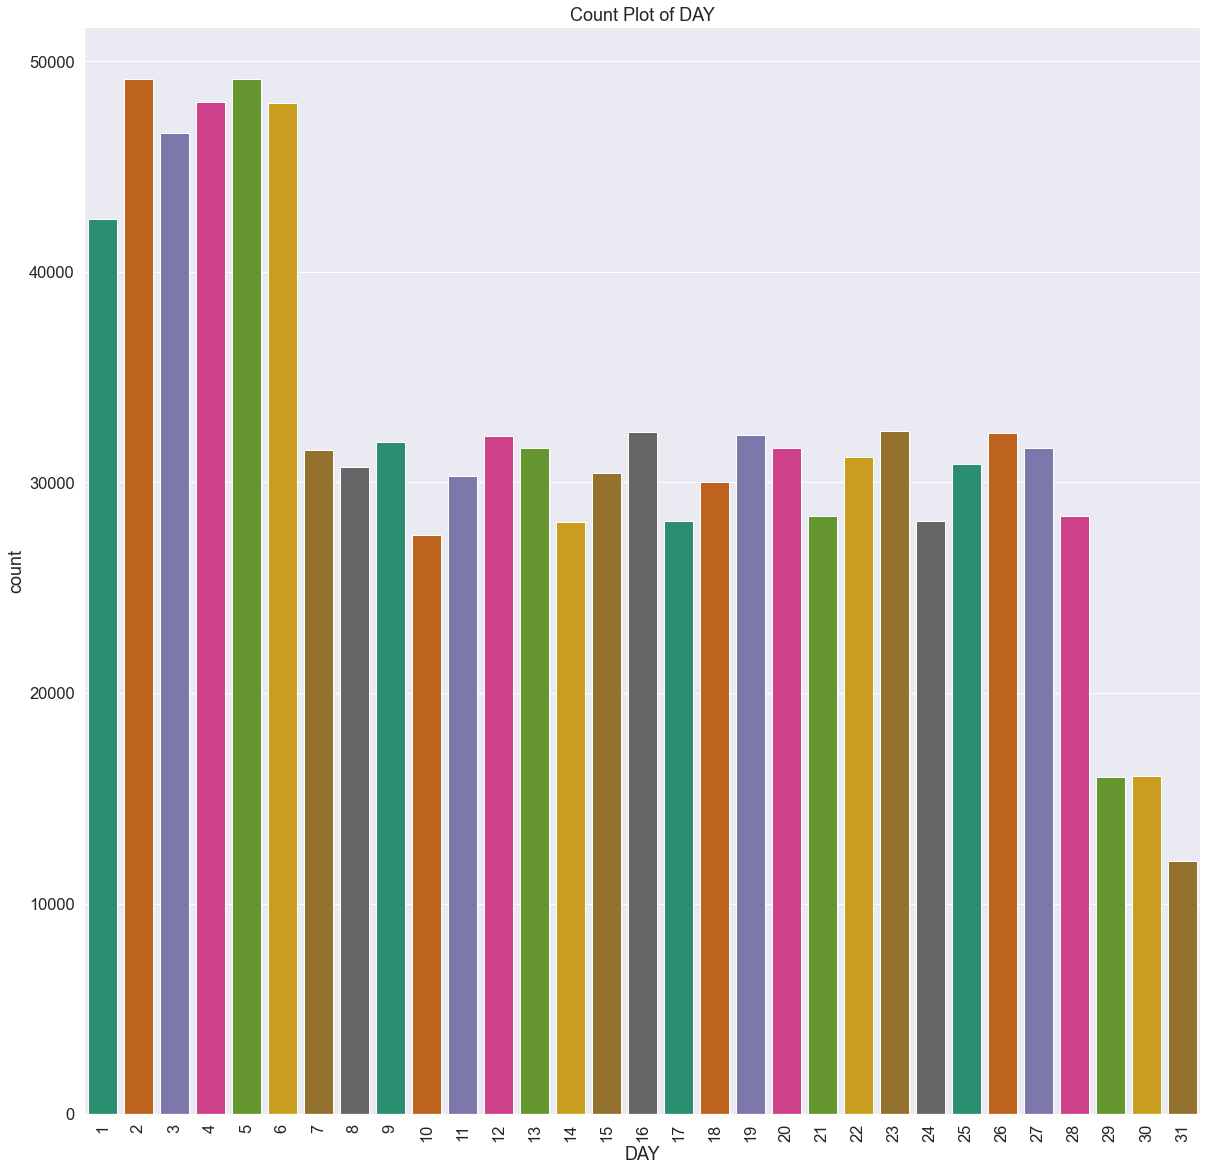

In [117]:
sns.countplot( x = "DAY"  , data = df  , palette="Dark2")
plt.title("Count Plot of DAY")
plt.xticks(rotation = 90)

In [118]:
df=df.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER',
            'TAXI_OUT', 'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME', 
            'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'], axis=1)


In [119]:
df.columns

Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [120]:
df.shape

(1000000, 16)

In [121]:
#

* Here we notice that there are no dependent variable yet which serves as our result wheather flight is delayed or not.
So here I'm creating new feature called 'result' which takes the value 0 and 1. O for the resulting flight is not delayed and 1 for flight delayed.
Here I'm Imputing these values by using the condition if 'ARRIVAL_DELAY' is greater than 15 then imputing 1 else o.

In [122]:
result=[]
for row in df['ARRIVAL_DELAY']:
    if row > 15:
        result.append(1)
    else:
        result.append(0)  
df['Delay'] = result

In [123]:
df['Delay'].value_counts()

0    786767
1    213233
Name: Delay, dtype: int64

In [124]:
df.head()

MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0      1    1            ANC                 SEA                    5   
1      1    1            LAX                 PBI                   10   
2      1    1            SFO                 CLT                   20   
3      1    1            LAX                 MIA                   20   
4      1    1            SEA                 ANC                   25   

   DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  \
0            -11.0                430         408.0          -22.0         0   
1             -8.0                750         741.0           -9.0         0   
2             -2.0                806         811.0            5.0         0   
3             -5.0                805         756.0           -9.0         0   
4             -1.0                320         259.0          -21.0         0   

   CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0          0               NaN             NaN            NaN   
1          0               NaN             NaN            NaN   
2          0               NaN             NaN            NaN   
3          0               NaN             NaN            NaN   
4          0               NaN             NaN            NaN   

   LATE_AIRCRAFT_DELAY  WEATHER_DELAY  Delay  
0                  NaN            NaN      0  
1                  NaN            NaN      0  
2                  NaN            NaN      0  
3                  NaN            NaN      0  
4                  NaN            NaN      0

<AxesSubplot:xlabel='Delay', ylabel='count'>

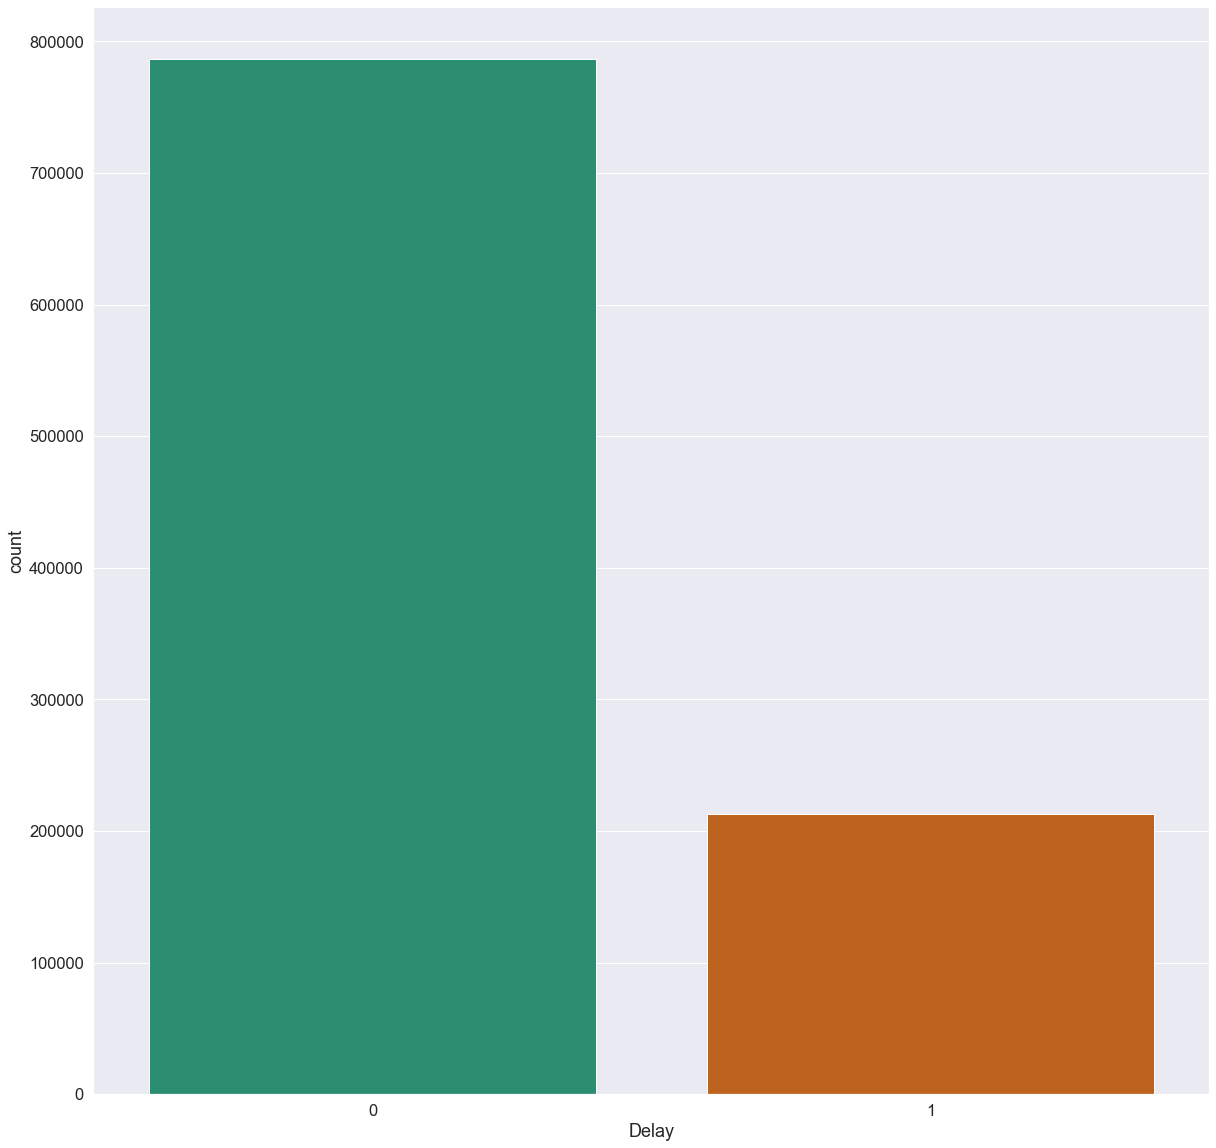

In [125]:
sns.countplot(x='Delay', data=df,palette="Dark2") 

In [126]:
df

MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0           1    1            ANC                 SEA                    5   
1           1    1            LAX                 PBI                   10   
2           1    1            SFO                 CLT                   20   
3           1    1            LAX                 MIA                   20   
4           1    1            SEA                 ANC                   25   
...       ...  ...            ...                 ...                  ...   
999995      3    7            BOI                 SFO                  915   
999996      3    7            DFW                 MFE                  916   
999997      3    7            DSM                 DFW                  916   
999998      3    7            LAX                 ASE                  916   
999999      3    7            MSP                 LAX                  917   

        DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  \
0                 -11.0                430         408.0          -22.0   
1                  -8.0                750         741.0           -9.0   
2                  -2.0                806         811.0            5.0   
3                  -5.0                805         756.0           -9.0   
4                  -1.0                320         259.0          -21.0   
...                 ...                ...           ...            ...   
999995             -3.0               1013         957.0          -16.0   
999996              3.0               1050        1042.0           -8.0   
999997             23.0               1120        1131.0           11.0   
999998             -1.0               1216        1242.0           26.0   
999999             -2.0               1128        1052.0          -36.0   

        DIVERTED  CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0              0          0               NaN             NaN            NaN   
1              0          0               NaN             NaN            NaN   
2              0          0               NaN             NaN            NaN   
3              0          0               NaN             NaN            NaN   
4              0          0               NaN             NaN            NaN   
...          ...        ...               ...             ...            ...   
999995         0          0               NaN             NaN            NaN   
999996         0          0               NaN             NaN            NaN   
999997         0          0               NaN             NaN            NaN   
999998         0          0              26.0             0.0            0.0   
999999         0          0               NaN             NaN            NaN   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  Delay  
0                       NaN            NaN      0  
1                       NaN            NaN      0  
2                       NaN            NaN      0  
3                       NaN            NaN      0  
4                       NaN            NaN      0  
...                     ...            ...    ...  
999995                  NaN            NaN      0  
999996                  NaN            NaN      0  
999997                  NaN            NaN      0  
999998                  0.0            0.0      1  
999999                  NaN            NaN      0  

[1000000 rows x 17 columns]

<p id = "ETl">ETL-Process</p>

# 1 - Feature_Engineering Technice ::
*********************************************************************
* Its one of the most important phase in data scientist life cycle which use to generate new usefull features from the old  features which not enough for train model.

In [127]:
df

MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0           1    1            ANC                 SEA                    5   
1           1    1            LAX                 PBI                   10   
2           1    1            SFO                 CLT                   20   
3           1    1            LAX                 MIA                   20   
4           1    1            SEA                 ANC                   25   
...       ...  ...            ...                 ...                  ...   
999995      3    7            BOI                 SFO                  915   
999996      3    7            DFW                 MFE                  916   
999997      3    7            DSM                 DFW                  916   
999998      3    7            LAX                 ASE                  916   
999999      3    7            MSP                 LAX                  917   

        DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  \
0                 -11.0                430         408.0          -22.0   
1                  -8.0                750         741.0           -9.0   
2                  -2.0                806         811.0            5.0   
3                  -5.0                805         756.0           -9.0   
4                  -1.0                320         259.0          -21.0   
...                 ...                ...           ...            ...   
999995             -3.0               1013         957.0          -16.0   
999996              3.0               1050        1042.0           -8.0   
999997             23.0               1120        1131.0           11.0   
999998             -1.0               1216        1242.0           26.0   
999999             -2.0               1128        1052.0          -36.0   

        DIVERTED  CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0              0          0               NaN             NaN            NaN   
1              0          0               NaN             NaN            NaN   
2              0          0               NaN             NaN            NaN   
3              0          0               NaN             NaN            NaN   
4              0          0               NaN             NaN            NaN   
...          ...        ...               ...             ...            ...   
999995         0          0               NaN             NaN            NaN   
999996         0          0               NaN             NaN            NaN   
999997         0          0               NaN             NaN            NaN   
999998         0          0              26.0             0.0            0.0   
999999         0          0               NaN             NaN            NaN   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  Delay  
0                       NaN            NaN      0  
1                       NaN            NaN      0  
2                       NaN            NaN      0  
3                       NaN            NaN      0  
4                       NaN            NaN      0  
...                     ...            ...    ...  
999995                  NaN            NaN      0  
999996                  NaN            NaN      0  
999997                  NaN            NaN      0  
999998                  0.0            0.0      1  
999999                  NaN            NaN      0  

[1000000 rows x 17 columns]

# 2 - Transform_data ::
*************************************************
* 2 :: *Cleancing data* ::
     * Data in the real state dont comes cleaned is come dirty may include ::
         * non_logic_data_values.
         * Noisy and Errors.
         * Duplicaties data.
         * Missing_data_Values.

# non_logic_Values ::
***********************************
* Its one of the common issuse which consider us on data which data may include errors , noisy data such as :
    * Negaive values and that not logic.
    * Fraction Values and that not logic also.

In [128]:
# Check data include Non_logic data_Values ::

for col in df.columns :
    print(f"The Col ({col})\n")
    print(f"The Unique Values of ({col}) :: {df[col].unique()}\n\n")
    print(f"The Value_Counts of ({col}) :: \n{df[col].value_counts()}")
    print("-" * 80)

The Col (MONTH)

The Unique Values of (MONTH) :: [1 2 3]


The Value_Counts of (MONTH) :: 
1    469968
2    429191
3    100841
Name: MONTH, dtype: int64
--------------------------------------------------------------------------------
The Col (DAY)

The Unique Values of (DAY) :: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


The Value_Counts of (DAY) :: 
5     49180
2     49165
4     48089
6     48024
3     46586
1     42527
23    32431
16    32372
26    32331
19    32243
12    32191
9     31899
20    31657
13    31656
27    31615
7     31517
22    31190
25    30879
8     30735
15    30428
11    30295
18    30030
21    28422
28    28407
24    28186
17    28147
14    28131
10    27520
30    16080
29    16030
31    12037
Name: DAY, dtype: int64
--------------------------------------------------------------------------------
The Col (ORIGIN_AIRPORT)

The Unique Values of (ORIGIN_AIRPORT) :: ['ANC' 'LAX' 'SFO' 'SEA' 'LAS' 'DEN' 'SLC' 'PDX' 

The Value_Counts of (SCHEDULED_ARRIVAL) :: 
1030    3775
2100    3713
1815    3419
1905    3417
1210    3386
        ... 
208        1
229        1
448        1
203        1
254        1
Name: SCHEDULED_ARRIVAL, Length: 1332, dtype: int64
--------------------------------------------------------------------------------
The Col (ARRIVAL_TIME)

The Unique Values of (ARRIVAL_TIME) :: [408. 741. 811. ... 328. 317. 357.]


The Value_Counts of (ARRIVAL_TIME) :: 
1645.0    1213
1652.0    1183
1642.0    1160
1644.0    1153
1639.0    1140
          ... 
407.0        4
352.0        3
329.0        3
355.0        2
357.0        1
Name: ARRIVAL_TIME, Length: 1440, dtype: int64
--------------------------------------------------------------------------------
The Col (ARRIVAL_DELAY)

The Unique Values of (ARRIVAL_DELAY) :: [-2.200e+01 -9.000e+00  5.000e+00 -2.100e+01  8.000e+00 -1.700e+01
 -1.000e+01 -1.300e+01 -1.500e+01 -3.000e+01 -4.000e+00 -1.400e+01
 -2.400e+01 -7.000e+00 -1.800e+01 -1.200e+01  6.

The Unique Values of (AIRLINE_DELAY) :: [      nan 0.000e+00 1.500e+01 8.500e+01 7.200e+01 6.000e+01 5.400e+01
 5.300e+01 1.900e+01 5.600e+01 5.500e+01 1.700e+01 3.900e+01 6.000e+00
 2.200e+01 7.000e+00 3.100e+01 5.000e+01 1.100e+01 1.000e+01 1.000e+00
 2.700e+01 1.600e+01 3.000e+01 8.000e+00 5.200e+01 1.400e+01 1.160e+02
 7.600e+01 3.640e+02 1.150e+02 1.640e+02 3.600e+01 2.000e+01 6.900e+01
 2.100e+01 3.000e+00 3.300e+01 7.000e+01 4.500e+01 8.300e+01 1.310e+02
 1.170e+02 5.800e+01 2.400e+01 2.900e+01 4.000e+00 5.100e+01 1.330e+02
 7.300e+01 2.050e+02 6.100e+01 3.500e+01 6.700e+01 1.250e+02 1.700e+02
 1.960e+02 2.300e+01 2.800e+01 5.700e+01 4.600e+01 2.240e+02 1.200e+01
 9.600e+01 1.800e+01 2.500e+01 6.300e+01 7.800e+01 6.600e+01 3.700e+01
 1.790e+02 4.100e+01 9.000e+00 3.400e+01 6.200e+01 2.000e+00 7.900e+01
 2.640e+02 7.500e+01 1.500e+02 5.000e+00 8.200e+01 1.120e+02 1.240e+02
 8.600e+01 1.380e+02 3.800e+01 1.930e+02 2.600e+01 4.200e+01 1.540e+02
 4.400e+01 1.710e+02 1.050e+02 6.500e

# Dublicates data ::
***************************
* Its also one of the most common issue which may found reapat or redendant data that generate from :
    * Miss understanding from data entry person.
    * There are two cols have diff names but present the same entity.

In [129]:
# detect duplicated data ::

df.duplicated().sum()

10

In [130]:
# To confirm that ::
df.drop_duplicates(inplace=True)

In [131]:
# Investigate data not include any duplicaties data ::

df.duplicated().sum()

0

# Missing Dtat Values ::
**********************************
* Its The Most common issue which consider us on data that generate from ::
    * Miss understanding from data entry person.
    * Falier the impute system.
* We must identify that missing data and impute it, we will solve that issue by ::
    * Fill Missing values use :
        * Mean value if data not include outliers.
        * Median value if data include outliers.
        * Mode value if that categorical data.
    * Or Impute data use :;
        * Simpleimputer ML Technice.
        * KNN ML Model.

In [132]:
# detect missing data values ::

df.isnull().sum()

MONTH                       0
DAY                         0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_DELAY         39148
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            40873
ARRIVAL_DELAY           42596
DIVERTED                    0
CANCELLED                   0
AIR_SYSTEM_DELAY       778949
SECURITY_DELAY         778949
AIRLINE_DELAY          778949
LATE_AIRCRAFT_DELAY    778949
WEATHER_DELAY          778949
Delay                       0
dtype: int64

In [133]:
Num_Missing     = df.isnull().sum().sort_values(ascending = False)
Precent_Missing = ( df.isnull().sum() / df.isnull().count() ).sort_values(ascending = False)
Missing_Data    = pd.concat( [ Num_Missing , Precent_Missing ] ,axis=1 , keys = ["Num_Missing" , "Prec_Missing"])
Missing_Data

Num_Missing  Prec_Missing
WEATHER_DELAY             778949      0.778957
LATE_AIRCRAFT_DELAY       778949      0.778957
AIRLINE_DELAY             778949      0.778957
SECURITY_DELAY            778949      0.778957
AIR_SYSTEM_DELAY          778949      0.778957
ARRIVAL_DELAY              42596      0.042596
ARRIVAL_TIME               40873      0.040873
DEPARTURE_DELAY            39148      0.039148
CANCELLED                      0      0.000000
MONTH                          0      0.000000
DIVERTED                       0      0.000000
DAY                            0      0.000000
SCHEDULED_ARRIVAL              0      0.000000
SCHEDULED_DEPARTURE            0      0.000000
DESTINATION_AIRPORT            0      0.000000
ORIGIN_AIRPORT                 0      0.000000
Delay                          0      0.000000

In [134]:
df.head(2)

MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0      1    1            ANC                 SEA                    5   
1      1    1            LAX                 PBI                   10   

   DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  \
0            -11.0                430         408.0          -22.0         0   
1             -8.0                750         741.0           -9.0         0   

   CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0          0               NaN             NaN            NaN   
1          0               NaN             NaN            NaN   

   LATE_AIRCRAFT_DELAY  WEATHER_DELAY  Delay  
0                  NaN            NaN      0  
1                  NaN            NaN      0

In [135]:
df = df.fillna(df.mean())

In [136]:
# investigate data not include Missing data

Num_Missing     = df.isnull().sum().sort_values(ascending = False)
Precent_Missing = ( df.isnull().sum() / df.isnull().count() ).sort_values(ascending = False)
Missing_Data    = pd.concat( [ Num_Missing , Precent_Missing ] ,axis=1 , keys = ["Num_Missing" , "Prec_Missing"])
Missing_Data

Num_Missing  Prec_Missing
MONTH                          0           0.0
DIVERTED                       0           0.0
WEATHER_DELAY                  0           0.0
LATE_AIRCRAFT_DELAY            0           0.0
AIRLINE_DELAY                  0           0.0
SECURITY_DELAY                 0           0.0
AIR_SYSTEM_DELAY               0           0.0
CANCELLED                      0           0.0
ARRIVAL_DELAY                  0           0.0
DAY                            0           0.0
ARRIVAL_TIME                   0           0.0
SCHEDULED_ARRIVAL              0           0.0
DEPARTURE_DELAY                0           0.0
SCHEDULED_DEPARTURE            0           0.0
DESTINATION_AIRPORT            0           0.0
ORIGIN_AIRPORT                 0           0.0
Delay                          0           0.0

* 3 :: *Data_Preprocessing* ::
    * Data may include ::
        * Outliers values.
        * Impalanced classes.
        * Text data.

# Outliers Values ::
**********************************
* Its one of the most common issuse which conseder us on data But we must investigate that value already outliers or anominal data values Based on ::
    * Understanding the domain of the Business well.
    * If num of ouliers values few that mean may that values outlier.
    * If num of outliers values hue that mean may that values not outliers.
* If that data outlier we will replace it by mean value or drop it.

In [137]:
df.columns

Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Delay'],
      dtype='object')

In [138]:
df.head(4)

MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0      1    1            ANC                 SEA                    5   
1      1    1            LAX                 PBI                   10   
2      1    1            SFO                 CLT                   20   
3      1    1            LAX                 MIA                   20   

   DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  \
0            -11.0                430         408.0          -22.0         0   
1             -8.0                750         741.0           -9.0         0   
2             -2.0                806         811.0            5.0         0   
3             -5.0                805         756.0           -9.0         0   

   CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0          0         13.879651        0.057921      18.040721   
1          0         13.879651        0.057921      18.040721   
2          0         13.879651        0.057921      18.040721   
3          0         13.879651        0.057921      18.040721   

   LATE_AIRCRAFT_DELAY  WEATHER_DELAY  Delay  
0            22.955108       3.631589      0  
1            22.955108       3.631589      0  
2            22.955108       3.631589      0  
3            22.955108       3.631589      0

In [139]:
# detect outliers values in culmen_length_mm feature ::

#sns.boxplot  (y = "age" , data = df , palette="viridis")
#sns.stripplot(y = "age" , data = df , color = "r")

In [140]:
# detect outliers values in culmen_length_mm feature ::

#sns.boxplot  (y = "age" , data = df , palette="viridis")
#sns.stripplot(y = "age" , data = df , color = "r")

In [141]:
# detect outliers values in culmen_length_mm feature ::

#sns.boxplot  (y = "age" , data = df , palette="viridis")
#sns.stripplot(y = "age" , data = df , color = "r")

In [142]:
# detect outliers values in culmen_length_mm feature ::

#sns.boxplot  (y = "age" , data = df , palette="viridis")
#sns.stripplot(y = "age" , data = df , color = "r")

In [143]:
# detect outliers values in culmen_length_mm feature ::

#sns.boxplot  (y = "age" , data = df , palette="viridis")
#sns.stripplot(y = "age" , data = df , color = "r")

In [144]:
df

MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0           1    1            ANC                 SEA                    5   
1           1    1            LAX                 PBI                   10   
2           1    1            SFO                 CLT                   20   
3           1    1            LAX                 MIA                   20   
4           1    1            SEA                 ANC                   25   
...       ...  ...            ...                 ...                  ...   
999995      3    7            BOI                 SFO                  915   
999996      3    7            DFW                 MFE                  916   
999997      3    7            DSM                 DFW                  916   
999998      3    7            LAX                 ASE                  916   
999999      3    7            MSP                 LAX                  917   

        DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  \
0                 -11.0                430         408.0          -22.0   
1                  -8.0                750         741.0           -9.0   
2                  -2.0                806         811.0            5.0   
3                  -5.0                805         756.0           -9.0   
4                  -1.0                320         259.0          -21.0   
...                 ...                ...           ...            ...   
999995             -3.0               1013         957.0          -16.0   
999996              3.0               1050        1042.0           -8.0   
999997             23.0               1120        1131.0           11.0   
999998             -1.0               1216        1242.0           26.0   
999999             -2.0               1128        1052.0          -36.0   

        DIVERTED  CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0              0          0         13.879651        0.057921      18.040721   
1              0          0         13.879651        0.057921      18.040721   
2              0          0         13.879651        0.057921      18.040721   
3              0          0         13.879651        0.057921      18.040721   
4              0          0         13.879651        0.057921      18.040721   
...          ...        ...               ...             ...            ...   
999995         0          0         13.879651        0.057921      18.040721   
999996         0          0         13.879651        0.057921      18.040721   
999997         0          0         13.879651        0.057921      18.040721   
999998         0          0         26.000000        0.000000       0.000000   
999999         0          0         13.879651        0.057921      18.040721   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  Delay  
0                 22.955108       3.631589      0  
1                 22.955108       3.631589      0  
2                 22.955108       3.631589      0  
3                 22.955108       3.631589      0  
4                 22.955108       3.631589      0  
...                     ...            ...    ...  
999995            22.955108       3.631589      0  
999996            22.955108       3.631589      0  
999997            22.955108       3.631589      0  
999998             0.000000       0.000000      1  
999999            22.955108       3.631589      0  

[999990 rows x 17 columns]

<AxesSubplot:>

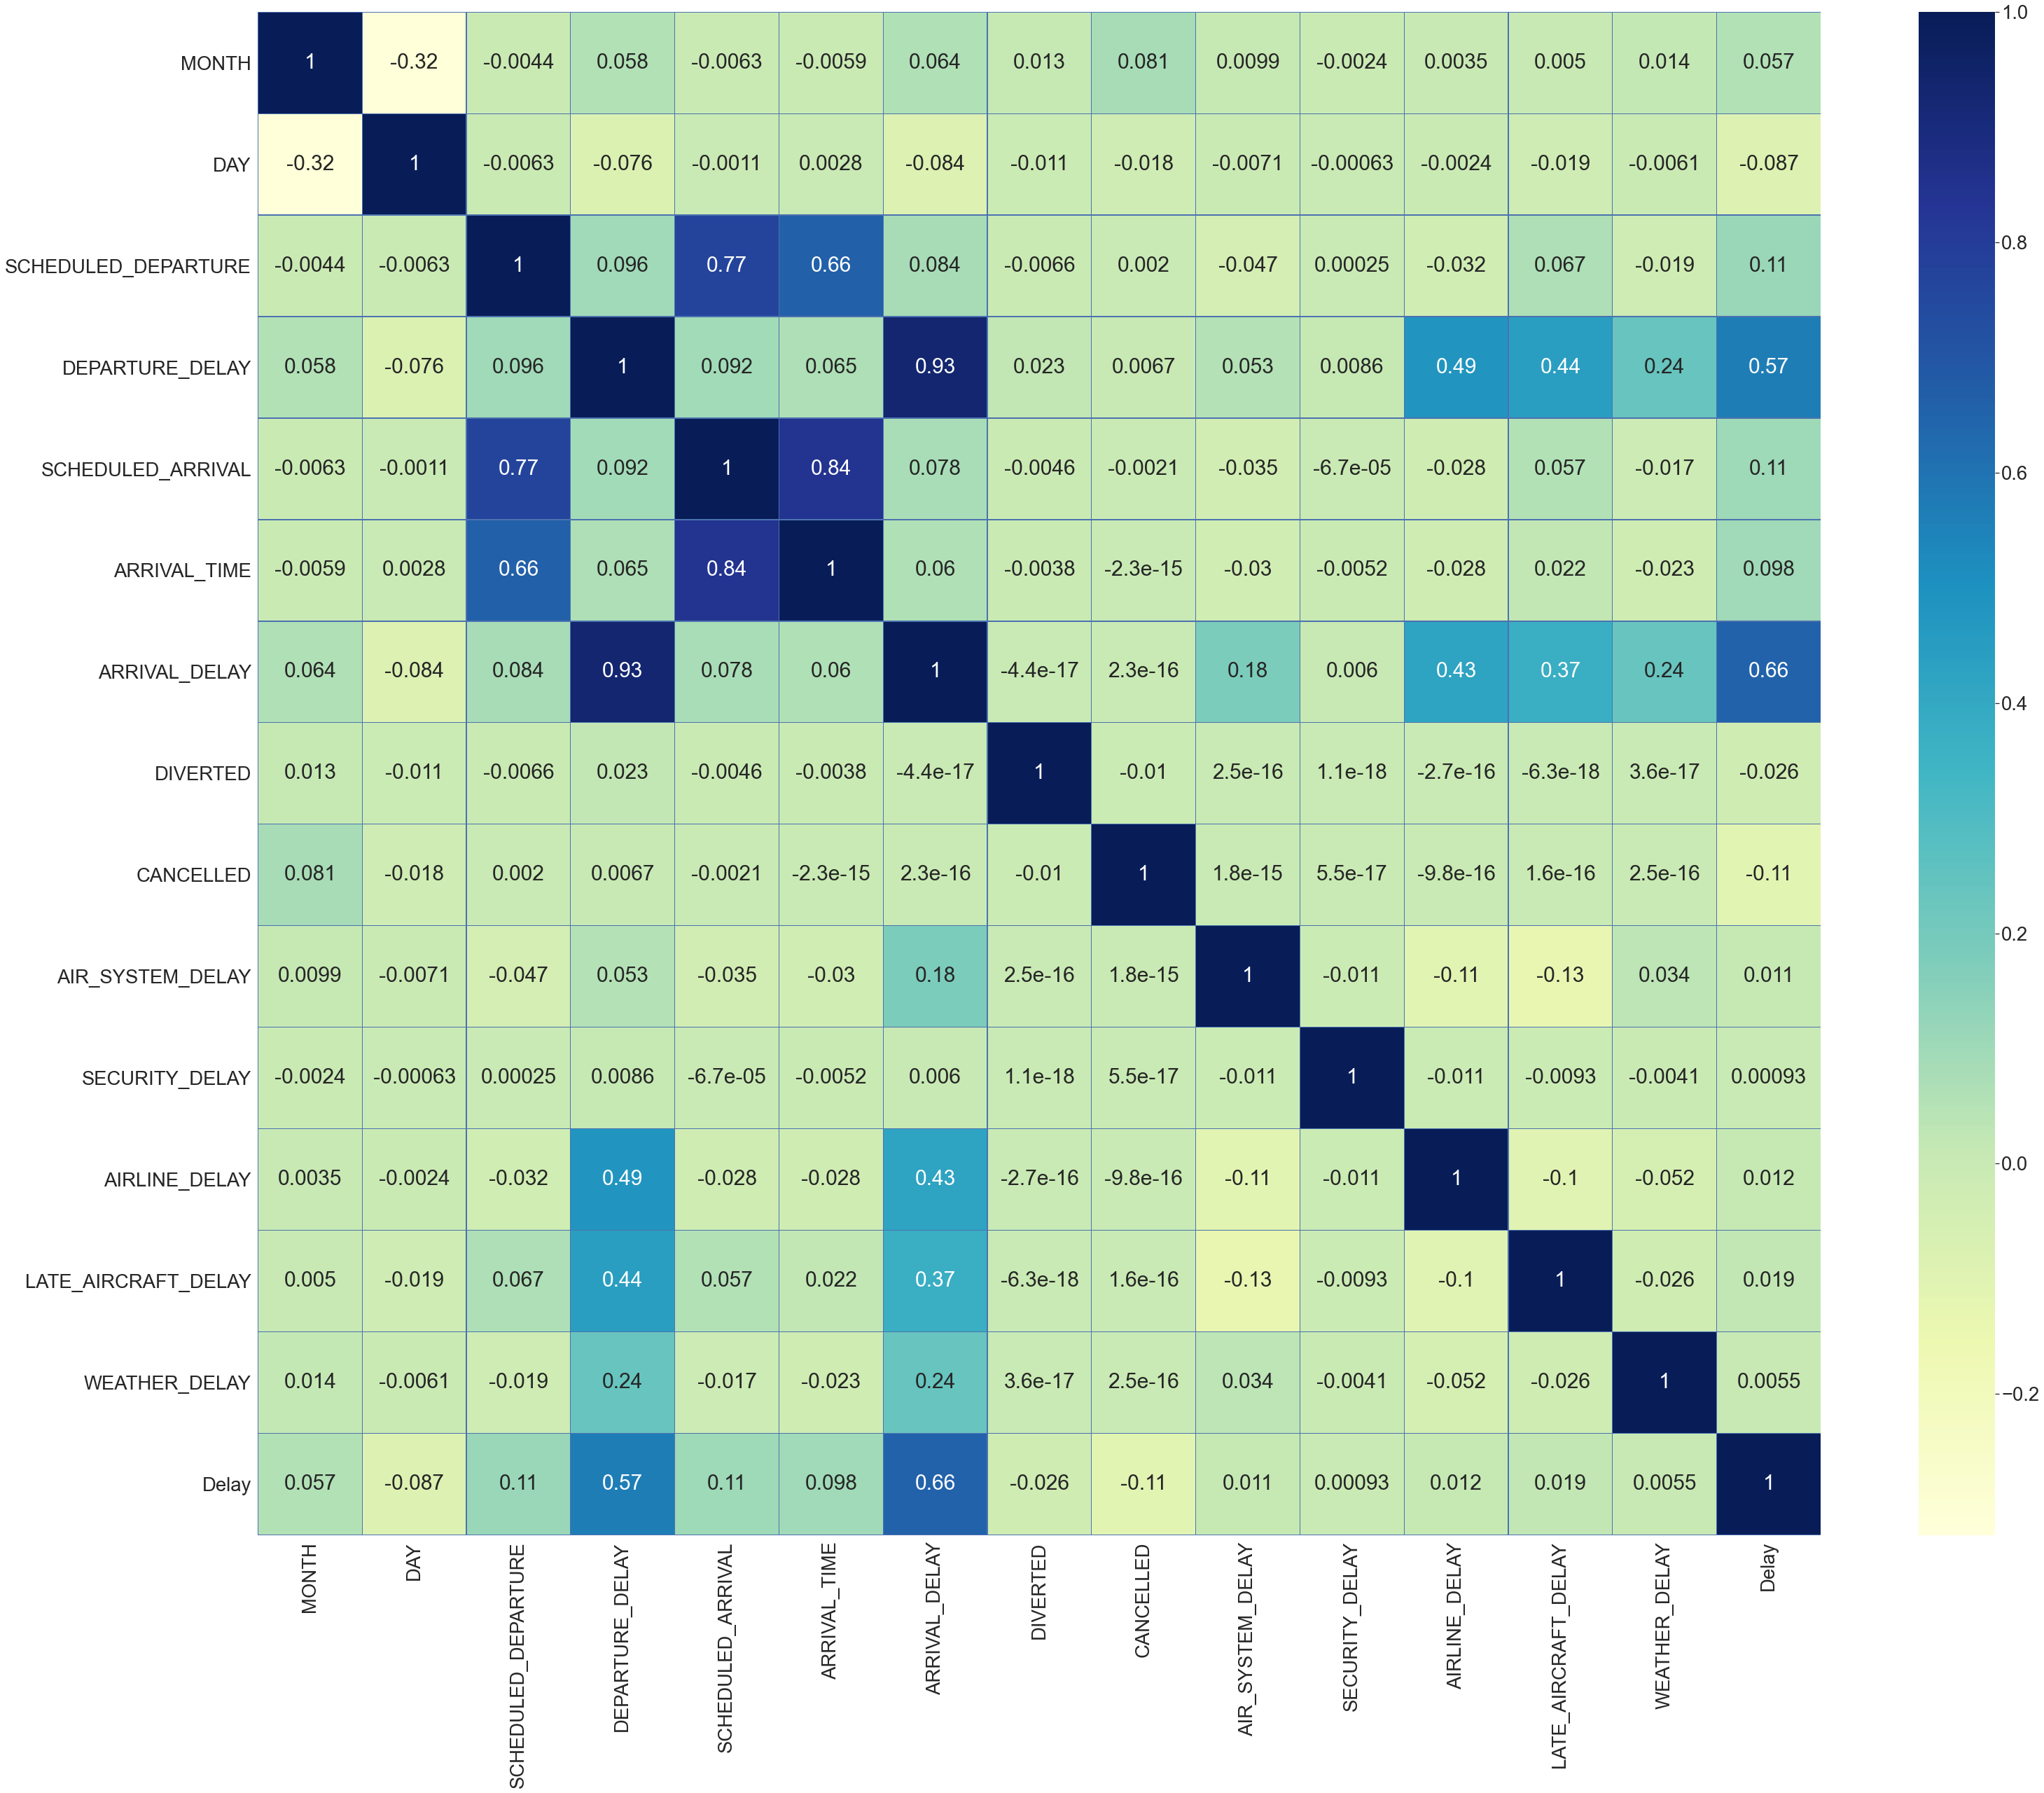

In [145]:

sns.set( rc = {"figure.figsize" : [50 , 40]} , font_scale=2.5)
sns.heatmap(df.corr(), annot=True, linewidths=.2, cmap="YlGnBu",  linecolor="b")


* Here we notice that there are no dependent variable yet which serves as our result wheather flight is delayed or not.
So here I'm creating new feature called 'result' which takes the value 0 and 1. O for the resulting flight is not delayed and 1 for flight delayed.
Here I'm Imputing these values by using the condition if 'ARRIVAL_DELAY' is greater than 15 then imputing 1 else o.

In [146]:
df.head()

MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0      1    1            ANC                 SEA                    5   
1      1    1            LAX                 PBI                   10   
2      1    1            SFO                 CLT                   20   
3      1    1            LAX                 MIA                   20   
4      1    1            SEA                 ANC                   25   

   DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  \
0            -11.0                430         408.0          -22.0         0   
1             -8.0                750         741.0           -9.0         0   
2             -2.0                806         811.0            5.0         0   
3             -5.0                805         756.0           -9.0         0   
4             -1.0                320         259.0          -21.0         0   

   CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0          0         13.879651        0.057921      18.040721   
1          0         13.879651        0.057921      18.040721   
2          0         13.879651        0.057921      18.040721   
3          0         13.879651        0.057921      18.040721   
4          0         13.879651        0.057921      18.040721   

   LATE_AIRCRAFT_DELAY  WEATHER_DELAY  Delay  
0            22.955108       3.631589      0  
1            22.955108       3.631589      0  
2            22.955108       3.631589      0  
3            22.955108       3.631589      0  
4            22.955108       3.631589      0

In [147]:
df.columns

Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'Delay'],
      dtype='object')

In [148]:
df=df.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
df.columns

Index(['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'Delay'],
      dtype='object')

In [149]:
df

MONTH  DAY  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_ARRIVAL  \
0           1    1                    5            -11.0                430   
1           1    1                   10             -8.0                750   
2           1    1                   20             -2.0                806   
3           1    1                   20             -5.0                805   
4           1    1                   25             -1.0                320   
...       ...  ...                  ...              ...                ...   
999995      3    7                  915             -3.0               1013   
999996      3    7                  916              3.0               1050   
999997      3    7                  916             23.0               1120   
999998      3    7                  916             -1.0               1216   
999999      3    7                  917             -2.0               1128   

        DIVERTED  CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0              0          0         13.879651        0.057921      18.040721   
1              0          0         13.879651        0.057921      18.040721   
2              0          0         13.879651        0.057921      18.040721   
3              0          0         13.879651        0.057921      18.040721   
4              0          0         13.879651        0.057921      18.040721   
...          ...        ...               ...             ...            ...   
999995         0          0         13.879651        0.057921      18.040721   
999996         0          0         13.879651        0.057921      18.040721   
999997         0          0         13.879651        0.057921      18.040721   
999998         0          0         26.000000        0.000000       0.000000   
999999         0          0         13.879651        0.057921      18.040721   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  Delay  
0                 22.955108       3.631589      0  
1                 22.955108       3.631589      0  
2                 22.955108       3.631589      0  
3                 22.955108       3.631589      0  
4                 22.955108       3.631589      0  
...                     ...            ...    ...  
999995            22.955108       3.631589      0  
999996            22.955108       3.631589      0  
999997            22.955108       3.631589      0  
999998             0.000000       0.000000      1  
999999            22.955108       3.631589      0  

[999990 rows x 13 columns]

# Processing Text data ::
**********************************************
* We must handling test data into numerical numbers becouse ML Models not understanding that text data so that we use one_hot_encoding or one_variable_encoding technices.


In [150]:
df

MONTH  DAY  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_ARRIVAL  \
0           1    1                    5            -11.0                430   
1           1    1                   10             -8.0                750   
2           1    1                   20             -2.0                806   
3           1    1                   20             -5.0                805   
4           1    1                   25             -1.0                320   
...       ...  ...                  ...              ...                ...   
999995      3    7                  915             -3.0               1013   
999996      3    7                  916              3.0               1050   
999997      3    7                  916             23.0               1120   
999998      3    7                  916             -1.0               1216   
999999      3    7                  917             -2.0               1128   

        DIVERTED  CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0              0          0         13.879651        0.057921      18.040721   
1              0          0         13.879651        0.057921      18.040721   
2              0          0         13.879651        0.057921      18.040721   
3              0          0         13.879651        0.057921      18.040721   
4              0          0         13.879651        0.057921      18.040721   
...          ...        ...               ...             ...            ...   
999995         0          0         13.879651        0.057921      18.040721   
999996         0          0         13.879651        0.057921      18.040721   
999997         0          0         13.879651        0.057921      18.040721   
999998         0          0         26.000000        0.000000       0.000000   
999999         0          0         13.879651        0.057921      18.040721   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  Delay  
0                 22.955108       3.631589      0  
1                 22.955108       3.631589      0  
2                 22.955108       3.631589      0  
3                 22.955108       3.631589      0  
4                 22.955108       3.631589      0  
...                     ...            ...    ...  
999995            22.955108       3.631589      0  
999996            22.955108       3.631589      0  
999997            22.955108       3.631589      0  
999998             0.000000       0.000000      1  
999999            22.955108       3.631589      0  

[999990 rows x 13 columns]

In [151]:
# creating dummy variables for categorical features
df = pd.get_dummies(df,drop_first=True)
df

MONTH  DAY  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_ARRIVAL  \
0           1    1                    5            -11.0                430   
1           1    1                   10             -8.0                750   
2           1    1                   20             -2.0                806   
3           1    1                   20             -5.0                805   
4           1    1                   25             -1.0                320   
...       ...  ...                  ...              ...                ...   
999995      3    7                  915             -3.0               1013   
999996      3    7                  916              3.0               1050   
999997      3    7                  916             23.0               1120   
999998      3    7                  916             -1.0               1216   
999999      3    7                  917             -2.0               1128   

        DIVERTED  CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0              0          0         13.879651        0.057921      18.040721   
1              0          0         13.879651        0.057921      18.040721   
2              0          0         13.879651        0.057921      18.040721   
3              0          0         13.879651        0.057921      18.040721   
4              0          0         13.879651        0.057921      18.040721   
...          ...        ...               ...             ...            ...   
999995         0          0         13.879651        0.057921      18.040721   
999996         0          0         13.879651        0.057921      18.040721   
999997         0          0         13.879651        0.057921      18.040721   
999998         0          0         26.000000        0.000000       0.000000   
999999         0          0         13.879651        0.057921      18.040721   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  Delay  
0                 22.955108       3.631589      0  
1                 22.955108       3.631589      0  
2                 22.955108       3.631589      0  
3                 22.955108       3.631589      0  
4                 22.955108       3.631589      0  
...                     ...            ...    ...  
999995            22.955108       3.631589      0  
999996            22.955108       3.631589      0  
999997            22.955108       3.631589      0  
999998             0.000000       0.000000      1  
999999            22.955108       3.631589      0  

[999990 rows x 13 columns]

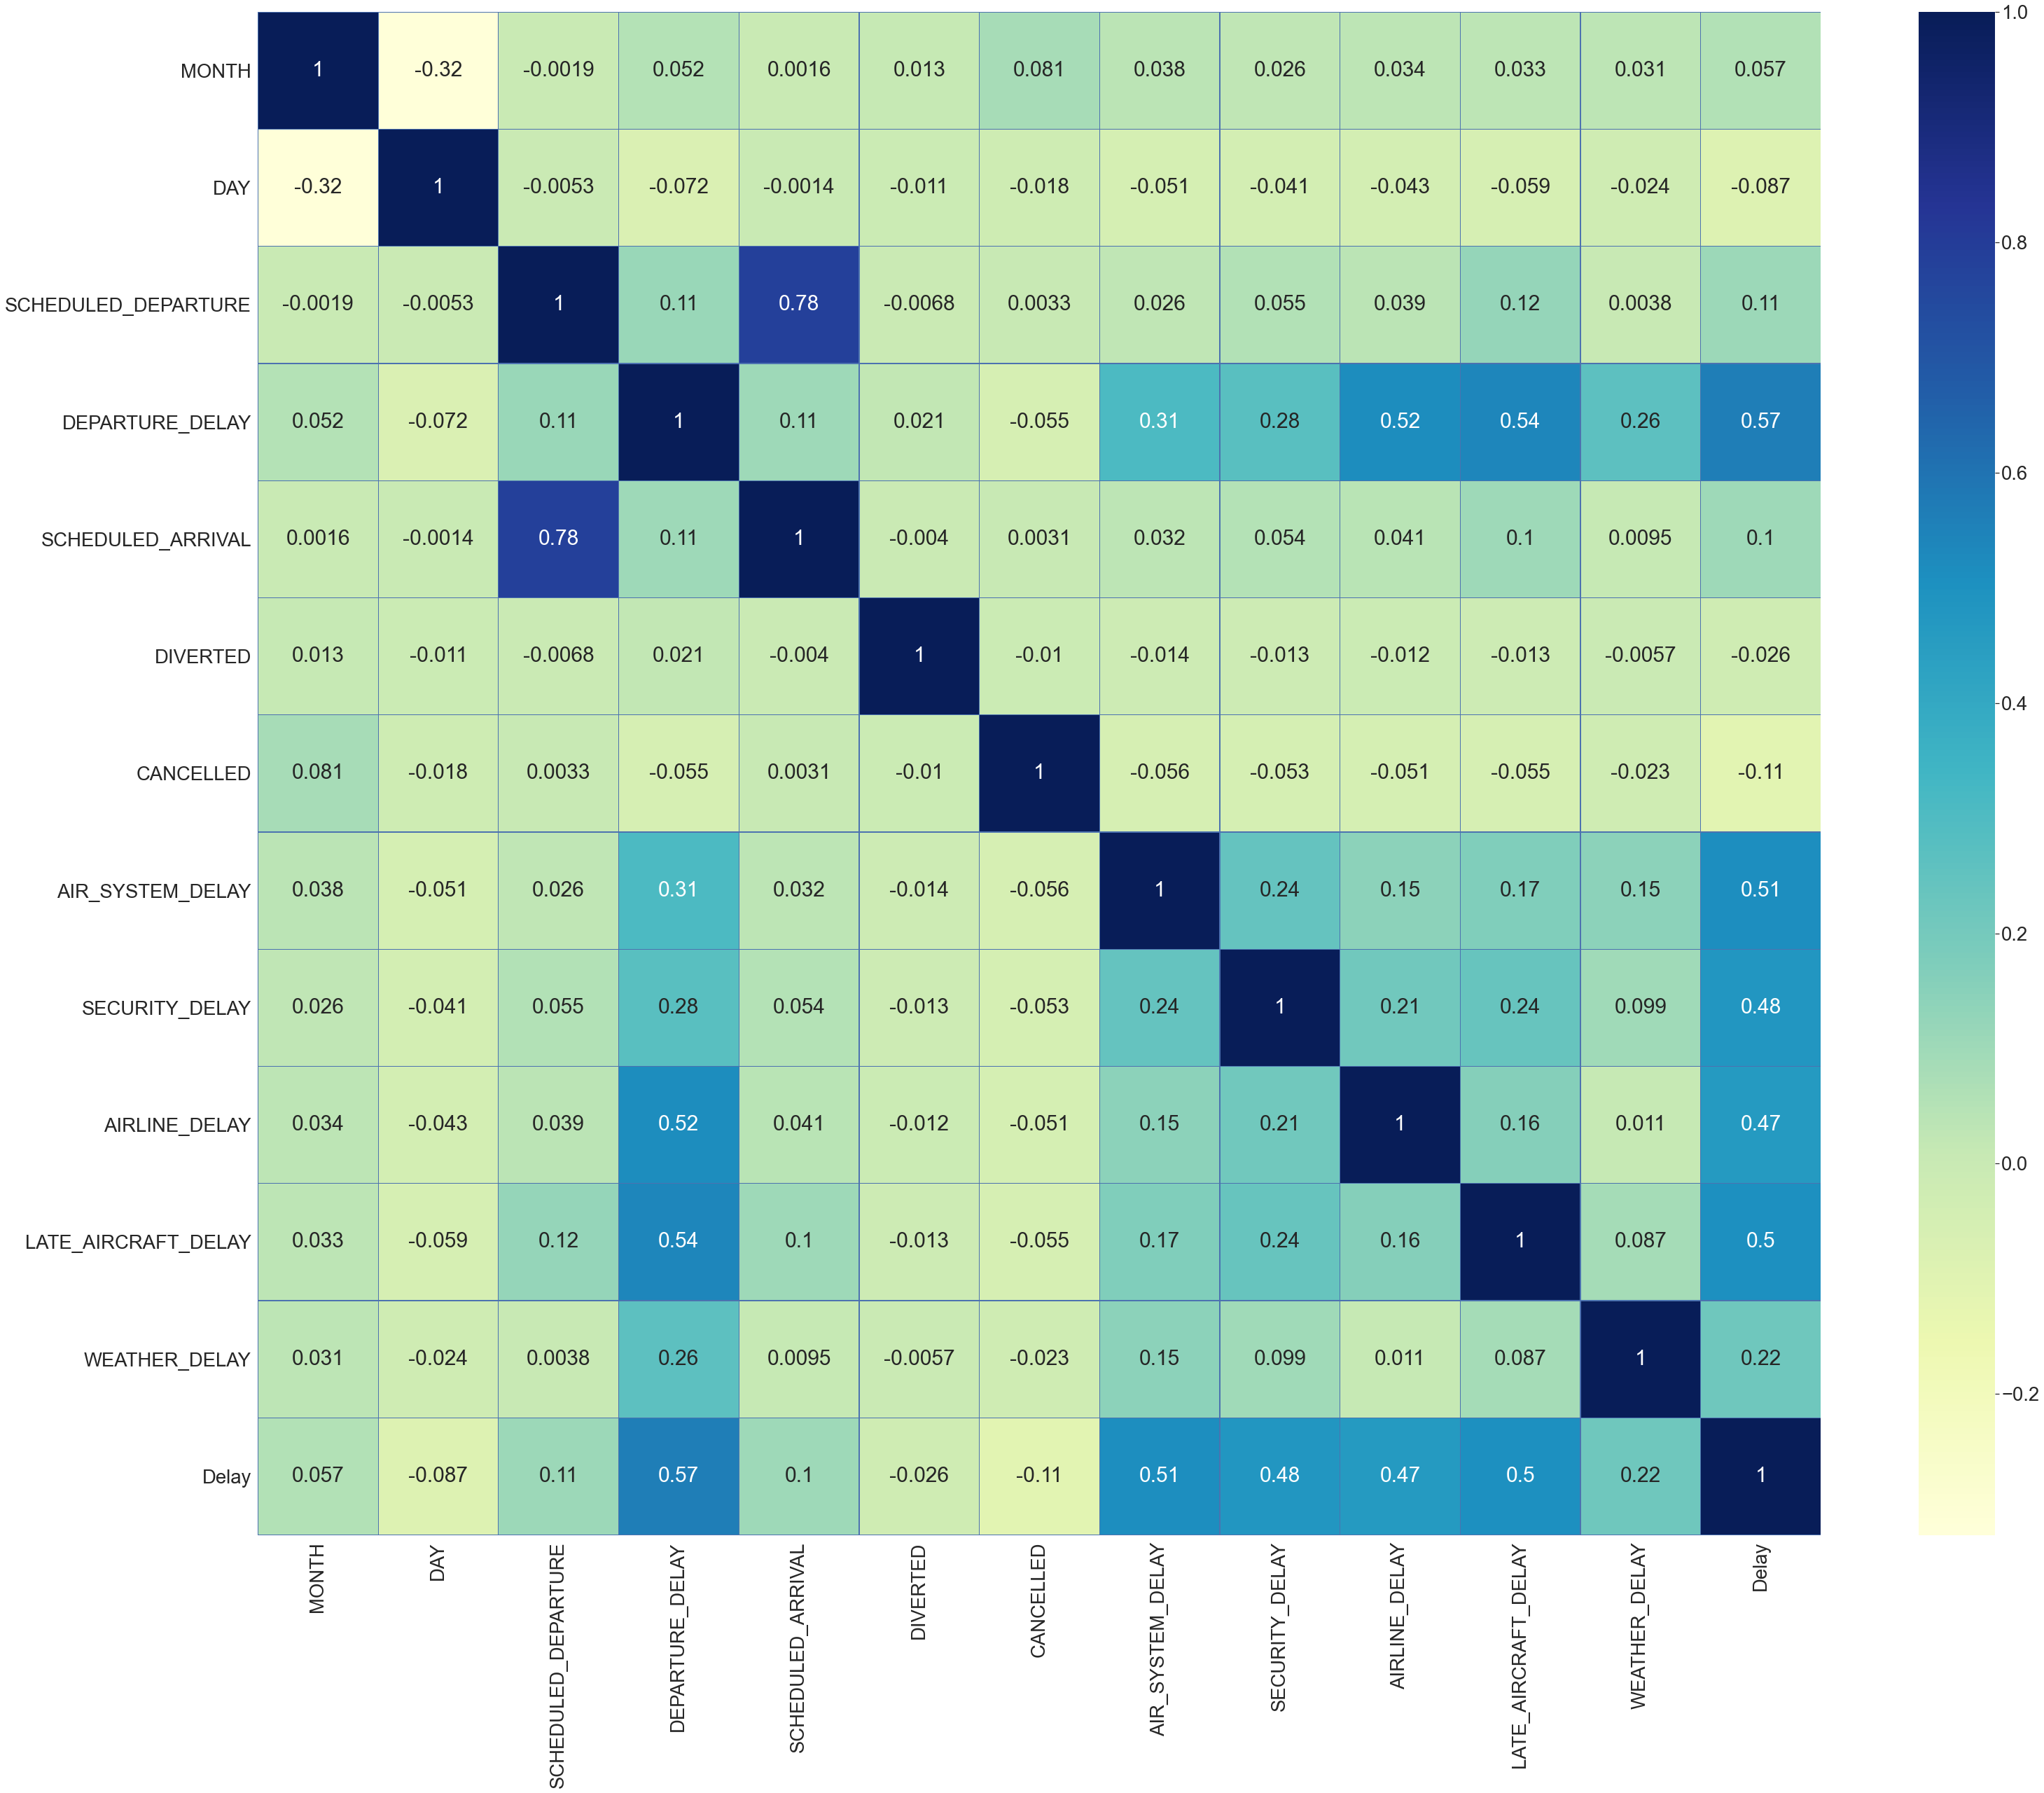

In [152]:
# get correlation between all features ::
sns.set( rc = {"figure.figsize" : [50 , 40]} , font_scale=2.5)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot=True , linecolor="b")

<AxesSubplot:>

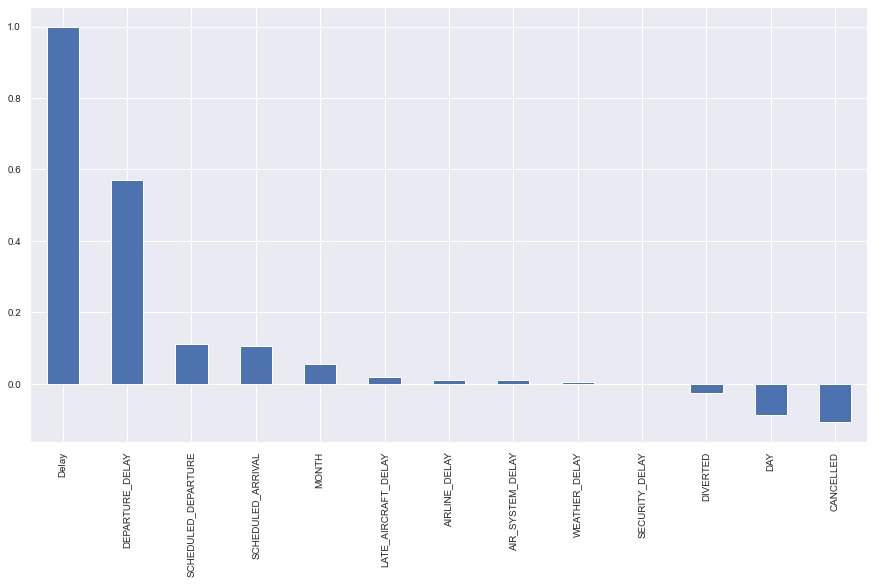

In [153]:
# Get Correlation of "Churn" with other features ::
sns.set( rc = {"figure.figsize" : [30 , 30]} , font_scale=0.9)

plt.figure(figsize=(15,8))
df.corr()['Delay'].sort_values(ascending = False).plot(kind='bar'  )

# 3 :: Feture selection ::
***************************************************
* There are multi technices to get the most Correlation Columns with our target.

<p id = "Prepration">Data-Prepration</p>

In [154]:
df.columns

Index(['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'Delay'],
      dtype='object')

In [156]:
# Split data into input and output data

x = df.drop("Delay" , axis=1)
y = df["Delay"]

In [157]:
x

MONTH  DAY  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_ARRIVAL  \
0           1    1                    5            -11.0                430   
1           1    1                   10             -8.0                750   
2           1    1                   20             -2.0                806   
3           1    1                   20             -5.0                805   
4           1    1                   25             -1.0                320   
...       ...  ...                  ...              ...                ...   
999995      3    7                  915             -3.0               1013   
999996      3    7                  916              3.0               1050   
999997      3    7                  916             23.0               1120   
999998      3    7                  916             -1.0               1216   
999999      3    7                  917             -2.0               1128   

        DIVERTED  CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0              0          0         13.879651        0.057921      18.040721   
1              0          0         13.879651        0.057921      18.040721   
2              0          0         13.879651        0.057921      18.040721   
3              0          0         13.879651        0.057921      18.040721   
4              0          0         13.879651        0.057921      18.040721   
...          ...        ...               ...             ...            ...   
999995         0          0         13.879651        0.057921      18.040721   
999996         0          0         13.879651        0.057921      18.040721   
999997         0          0         13.879651        0.057921      18.040721   
999998         0          0         26.000000        0.000000       0.000000   
999999         0          0         13.879651        0.057921      18.040721   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0                 22.955108       3.631589  
1                 22.955108       3.631589  
2                 22.955108       3.631589  
3                 22.955108       3.631589  
4                 22.955108       3.631589  
...                     ...            ...  
999995            22.955108       3.631589  
999996            22.955108       3.631589  
999997            22.955108       3.631589  
999998             0.000000       0.000000  
999999            22.955108       3.631589  

[999990 rows x 12 columns]

In [158]:
y

0         0
1         0
2         0
3         0
4         0
         ..
999995    0
999996    0
999997    0
999998    1
999999    0
Name: Delay, Length: 999990, dtype: int64

In [159]:
# Spliting data into Training and Testing data ::
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state = 20 , test_size=0.3)

In [160]:
#Scalling data ::
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test  = scaller.transform(x_test)

<p id = "Model">Bulid_ML_Model</p>

# Build Models ::
*************************************
* On that Process we will ::
    * Bulid multi models fror classification problem.
    * Evaluate all models.
    * Select the most efficient model for churn problem.

In [161]:
# Import All Classification Algos ::
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix 
from sklearn.metrics import classification_report , f1_score , precision_recall_curve

In [162]:
Models = {"Log_Classifer" : LogisticRegression() ,
          "DT_Classifer"  : DecisionTreeClassifier() ,
          "RF_Classifer"  : RandomForestClassifier() ,
          "XGB_Classifer" : XGBClassifier() ,
          "KNN_Classifier" : KNeighborsClassifier()
         }

In [163]:
for Name , Model in Models.items() :
    print(f"The Model :: {Name}\n----------")
    Model.fit(x_train , y_train)
    Train_score = Model.score(x_train , y_train)
    Test_score  = Model.score(x_test , y_test)
    y_pred = Model.predict(x_test)
    Acurace_Score = accuracy_score(y_test , y_pred)
    Con_Matrix = confusion_matrix(y_test , y_pred)
    print(f"The Traing_Score :: {Train_score}\nThe Testing_Score :: {Test_score}\nThe Accuracy_Scor :: {Acurace_Score}\nThe Con_Matrix ::\n {Con_Matrix}\n=================\n=================")

The Model :: Log_Classifer
----------
The Traing_Score :: 0.9883670265274082
The Testing_Score :: 0.988296549632163
The Accuracy_Scor :: 0.988296549632163
The Con_Matrix ::
 [[233012   3002]
 [   509  63474]]
The Model :: DT_Classifer
----------
The Traing_Score :: 1.0
The Testing_Score :: 0.999573329066624
The Accuracy_Scor :: 0.999573329066624
The Con_Matrix ::
 [[235957     57]
 [    71  63912]]
The Model :: RF_Classifer
----------
The Traing_Score :: 1.0
The Testing_Score :: 0.999013323466568
The Accuracy_Scor :: 0.999013323466568
The Con_Matrix ::
 [[235733    281]
 [    15  63968]]
The Model :: XGB_Classifer
----------
[11:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Traing_Score :: 0.9999771426285692
The Testing_Score 

* Select most efficient model with high Performance and accuracy

In [164]:
XGB_Model = XGBClassifier()
XGB_Model.fit(x_train , y_train)
print(XGB_Model.score(x_train , y_train))
print(XGB_Model.score(x_test , y_test))
print("-" * 80)

[16:54:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9999771426285692
0.999869998699987
--------------------------------------------------------------------------------


<p id = "Evaluation">Evaluate_Model</p>

# Evaluate Model ::
*********************************
* Its one off the most important phase in data scientist life cycle which estimate the performance and accuracy of the model in that problem.

In [165]:
XGB_Model.score(x_train , y_train)

0.9999771426285692

In [166]:
XGB_Model.score(x_test , y_test)

0.999869998699987

In [167]:
Ac_Sore_XGB = accuracy_score(y_test , y_pred)
Ac_Sore_XGB

0.992563258965923

In [168]:
con_Matrix = confusion_matrix(y_test , y_pred)
con_Matrix

array([[234252,   1762],
       [   469,  63514]], dtype=int64)

<AxesSubplot:>

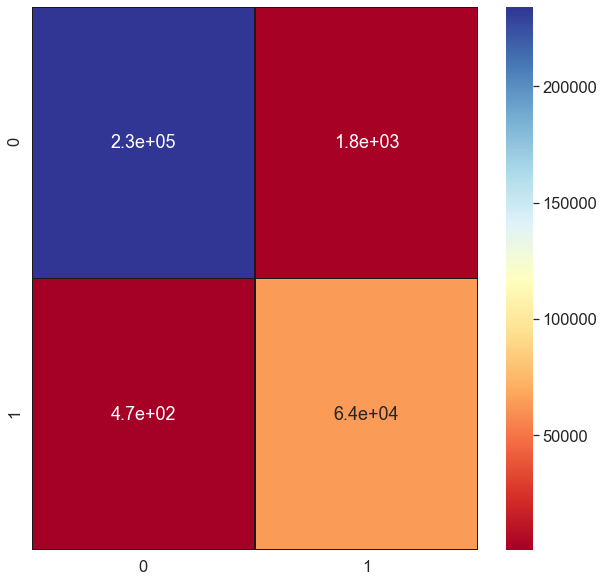

In [169]:
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)

sns.heatmap(con_Matrix , annot = True , cmap="RdYlBu" , linecolor = 'k' , linewidths= 1)

<p id = "Save">Save_Model</p>

# Save techinces ::
***************************************
* Save Scaler
* Save PCA
* Save Model

In [170]:
import joblib

In [171]:
scaler = joblib.dump(scaller , "scaler.h5")

In [172]:
Model = joblib.dump(XGB_Model , "Model.h5")

<p id = "conclusions">conclusions</p>

# Conclusion ::
*****************************
* On that Step We will ::
  * Input data features.
  * Scaling input data.
  * Predict income label.

In [176]:
df.head(3)

MONTH  DAY  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_ARRIVAL  \
0      1    1                    5            -11.0                430   
1      1    1                   10             -8.0                750   
2      1    1                   20             -2.0                806   

   DIVERTED  CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0         0          0         13.879651        0.057921      18.040721   
1         0          0         13.879651        0.057921      18.040721   
2         0          0         13.879651        0.057921      18.040721   

   LATE_AIRCRAFT_DELAY  WEATHER_DELAY  Delay  
0            22.955108       3.631589      0  
1            22.955108       3.631589      0  
2            22.955108       3.631589      0

In [174]:
x.columns

Index(['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')

In [177]:
len(x.columns)

12

In [183]:
custom_data = np.array([ 1 , 2 , 20 , -11 , 450 , 1 , 0 , 20.252 , 0.0542 , 30.258 , 22.955108 , 4.63157])

In [184]:
custom_data.shape

(12,)

In [185]:
len(custom_data)

12

In [186]:
custom_data = scaller.transform([custom_data])
custom_data

array([[-9.57816326e-01, -1.36658910e+00, -2.77065123e+00,
        -5.86882569e-01, -2.17421208e+00,  2.02433696e+01,
        -2.04542517e-01,  5.25883599e-01, -3.91210664e-03,
         5.74114858e-01,  4.92289124e-04,  8.89436115e-02]])

In [187]:
prediction = XGB_Model.predict(custom_data)
prediction

array([0], dtype=int64)